In [231]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from keras.models import Sequential
from keras.layers import Dense
from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint
from tensorflow.keras.layers import BatchNormalization
from keras.optimizers import Adam
from tensorflow.keras.layers import Activation
from keras.layers import Dropout,Dense

In [232]:
data = pd.read_csv("WineQT.csv")
data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,1
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,2
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,3
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1138,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,1592
1139,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6,1593
1140,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,1594
1141,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,1595


In [233]:
df = data.drop(["Id"], axis = 1)

In [234]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1143 non-null   float64
 1   volatile acidity      1143 non-null   float64
 2   citric acid           1143 non-null   float64
 3   residual sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free sulfur dioxide   1143 non-null   float64
 6   total sulfur dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   pH                    1143 non-null   float64
 9   sulphates             1143 non-null   float64
 10  alcohol               1143 non-null   float64
 11  quality               1143 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 107.3 KB


In [235]:
df.quality.value_counts()

5    483
6    462
7    143
4     33
8     16
3      6
Name: quality, dtype: int64

In [236]:
df.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [237]:
df.duplicated().sum()

125

In [238]:
df.drop_duplicates(inplace = True)
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
5,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1138,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1139,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6
1140,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1141,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6


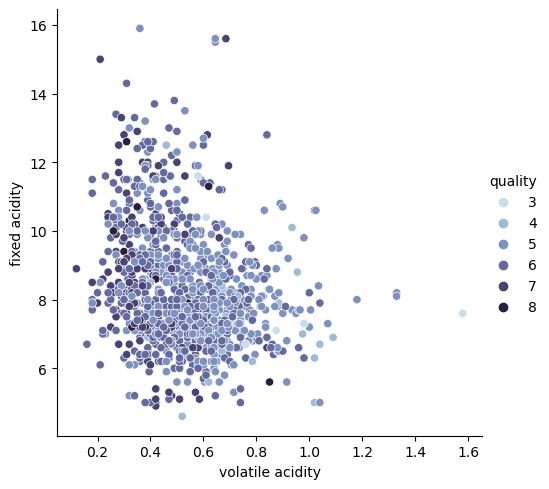

In [239]:
sns.relplot(y ="fixed acidity", x = "volatile acidity", data = df, hue= "quality", palette= "ch:s=.25,rot=-.25")
plt.show()

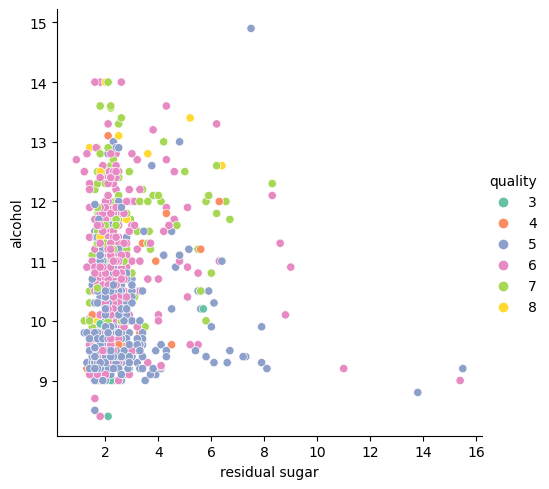

In [240]:
sns.relplot(y ="alcohol", x = "residual sugar", data = df, hue= "quality", palette= "Set2")
plt.show()

In [241]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5


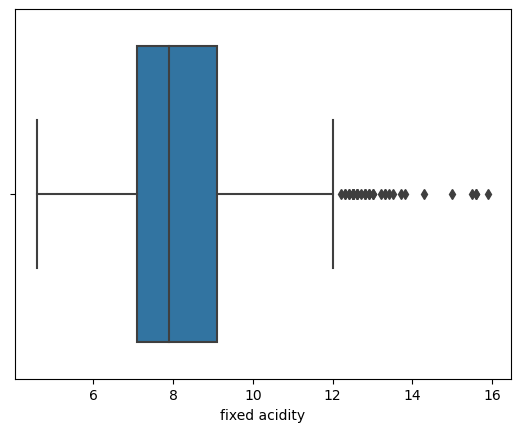

In [242]:
sns.boxplot(x= "fixed acidity", data = df)
plt.show()

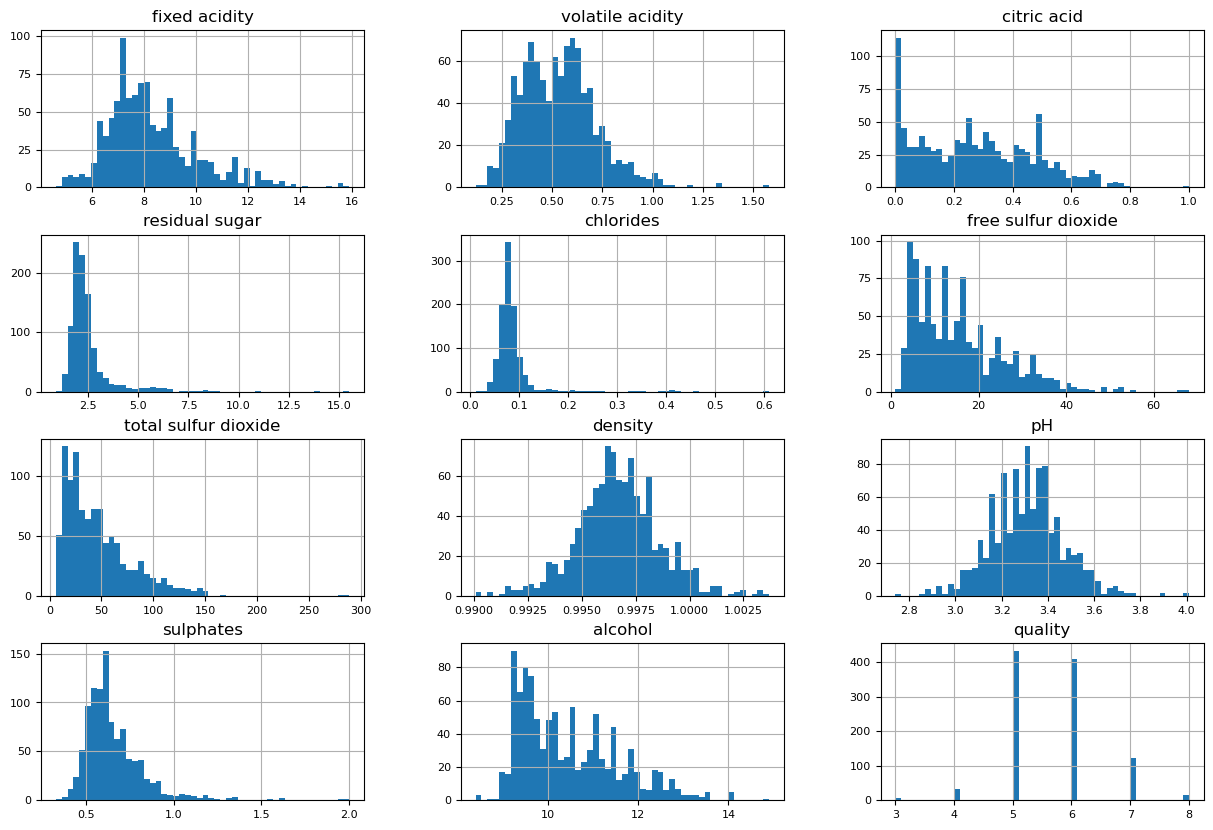

In [243]:
df.hist(figsize=(15, 10), bins=50, xlabelsize=8, ylabelsize=8)
plt.show()

In [244]:
df[['sulphates', 'volatile acidity','alcohol', 'total sulfur dioxide',"free sulfur dioxide","residual sugar"]] = df[['sulphates', 'volatile acidity','alcohol', 'total sulfur dioxide',"free sulfur dioxide","residual sugar"]].apply(np.log10)

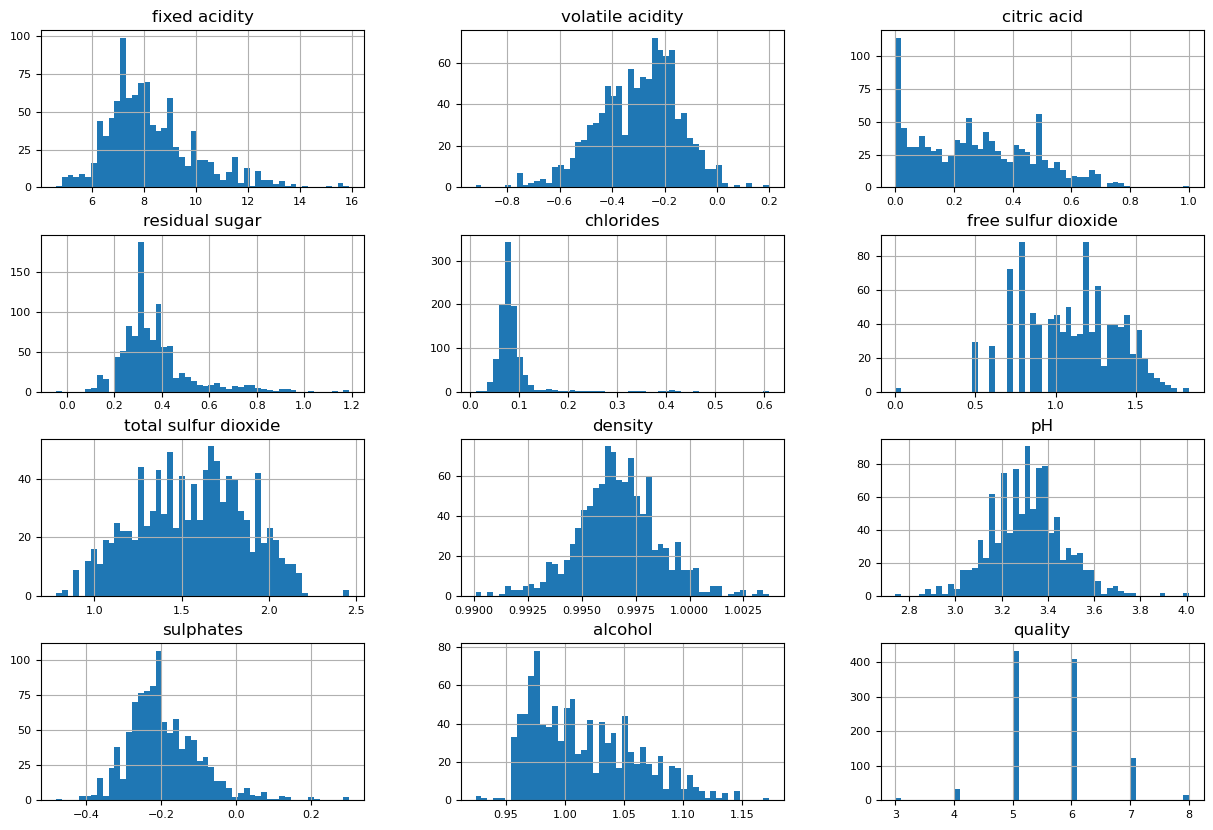

In [245]:
df.hist(figsize=(15, 10), bins=50, xlabelsize=8, ylabelsize=8)
plt.show()

# Keras ile öğrenme

In [246]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,-0.154902,0.00,0.278754,0.076,1.041393,1.531479,0.9978,3.51,-0.251812,0.973128,5
1,7.8,-0.055517,0.00,0.414973,0.098,1.397940,1.826075,0.9968,3.20,-0.167491,0.991226,5
2,7.8,-0.119186,0.04,0.361728,0.092,1.176091,1.732394,0.9970,3.26,-0.187087,0.991226,5
3,11.2,-0.552842,0.56,0.278754,0.075,1.230449,1.778151,0.9980,3.16,-0.236572,0.991226,6
5,7.4,-0.180456,0.00,0.255273,0.075,1.113943,1.602060,0.9978,3.51,-0.251812,0.973128,5


In [247]:
df.quality.value_counts()

5    433
6    409
7    122
4     33
8     15
3      6
Name: quality, dtype: int64

In [248]:
df['quality_yes_no'] = df['quality'].apply(lambda x: 0 if x <= 5 else 1)

In [249]:
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,quality_yes_no
0,7.4,-0.154902,0.00,0.278754,0.076,1.041393,1.531479,0.99780,3.51,-0.251812,0.973128,5,0
1,7.8,-0.055517,0.00,0.414973,0.098,1.397940,1.826075,0.99680,3.20,-0.167491,0.991226,5,0
2,7.8,-0.119186,0.04,0.361728,0.092,1.176091,1.732394,0.99700,3.26,-0.187087,0.991226,5,0
3,11.2,-0.552842,0.56,0.278754,0.075,1.230449,1.778151,0.99800,3.16,-0.236572,0.991226,6,1
5,7.4,-0.180456,0.00,0.255273,0.075,1.113943,1.602060,0.99780,3.51,-0.251812,0.973128,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1138,6.3,-0.292430,0.13,0.361728,0.076,1.462398,1.602060,0.99574,3.42,-0.124939,1.041393,6,1
1139,6.8,-0.207608,0.08,0.278754,0.068,1.447158,1.579784,0.99651,3.42,-0.086186,0.977724,6,1
1140,6.2,-0.221849,0.08,0.301030,0.090,1.505150,1.643453,0.99490,3.45,-0.236572,1.021189,5,0
1141,5.9,-0.259637,0.10,0.342423,0.062,1.591065,1.707570,0.99512,3.52,-0.119186,1.049218,6,1


In [250]:
y = df_yeni['quality_yes_no']
X = df_yeni.drop(["quality","quality_yes_no"],axis = 1)

In [251]:
X.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,-0.154902,0.00,0.278754,0.076,1.041393,1.531479,0.9978,3.51,-0.251812,0.973128
1,7.8,-0.055517,0.00,0.414973,0.098,1.397940,1.826075,0.9968,3.20,-0.167491,0.991226
2,7.8,-0.119186,0.04,0.361728,0.092,1.176091,1.732394,0.9970,3.26,-0.187087,0.991226
3,11.2,-0.552842,0.56,0.278754,0.075,1.230449,1.778151,0.9980,3.16,-0.236572,0.991226
5,7.4,-0.180456,0.00,0.255273,0.075,1.113943,1.602060,0.9978,3.51,-0.251812,0.973128


In [252]:
y.head()

0    0
1    0
2    0
3    1
5    0
Name: quality_yes_no, dtype: int64

In [253]:
import statsmodels.api as sm
ols= sm.OLS(y,X)
results = ols.fit()

In [254]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:         quality_yes_no   R-squared (uncentered):                   0.679
Model:                            OLS   Adj. R-squared (uncentered):              0.675
Method:                 Least Squares   F-statistic:                              193.4
Date:                Thu, 28 Dec 2023   Prob (F-statistic):                   2.40e-239
Time:                        12:57:26   Log-Likelihood:                         -549.37
No. Observations:                1018   AIC:                                      1121.
Df Residuals:                    1007   BIC:                                      1175.
Df Model:                          11                                                  
Covariance Type:            nonrobust                                                  
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
fixed acidity            0.0276      0.013      2.075      0.038       0.002       0.054
volatile acidity        -0.6665      0.116     -5.748      0.000      -0.894      -0.439
citric acid             -0.2740      0.121     -2.268      0.024      -0.511      -0.037
residual sugar          -0.0446      0.092     -0.484      0.628      -0.225       0.136
chlorides               -0.4499      0.332     -1.353      0.176      -1.102       0.202
free sulfur dioxide      0.1785      0.075      2.380      0.018       0.031       0.326
total sulfur dioxide    -0.2862      0.075     -3.794      0.000      -0.434      -0.138
density                 -3.0536      0.600     -5.086      0.000      -4.232      -1.875
pH                      -0.0769      0.127     -0.603      0.547      -0.327       0.173
sulphates                1.0551      0.160      6.600      0.000       0.741       1.369
alcohol                  3.9245      0.346     11.329      0.000       3.245       4.604
==============================================================================
Omnibus:                       69.466   Durbin-Watson:                   1.917
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               24.783
Skew:                           0.026   Prob(JB):                     4.15e-06
Kurtosis:                       2.237   Cond. No.                         474.
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [255]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.33,random_state=2)

In [256]:
X_train

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
952,7.5,-0.292430,0.02,0.230449,0.084,1.113943,1.491362,0.99538,3.36,-0.267606,1.021189
200,7.7,-0.568636,0.68,0.544068,0.358,0.698970,1.000000,0.99720,3.25,0.033424,0.995635
579,8.4,-0.283997,0.22,0.431364,0.084,0.602060,1.255273,0.99682,3.26,-0.244125,0.995635
1087,6.8,-0.318759,0.25,0.301030,0.076,1.462398,1.785330,0.99530,3.34,-0.221849,1.017033
966,11.6,-0.323306,0.40,0.146128,0.091,0.778151,1.447158,0.99704,3.07,-0.187087,1.001445
...,...,...,...,...,...,...,...,...,...,...,...
594,7.5,-0.164309,0.07,0.397940,0.058,0.698970,0.954243,0.99632,3.38,-0.259637,1.037426
654,8.6,-0.657577,0.36,0.278754,0.064,1.724276,1.886491,0.99604,3.47,-0.060481,1.041393
551,7.9,-0.142668,0.01,0.278754,0.076,0.845098,1.505150,0.99668,3.39,-0.267606,0.982271
587,9.1,-0.180456,0.15,0.505150,0.097,0.954243,1.770852,0.99976,3.28,-0.267606,0.982271


In [257]:
X_test

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
934,9.1,-0.119186,0.68,0.230449,0.414,1.255273,1.806180,0.99652,2.90,0.123852,0.959041
1093,6.1,-0.151811,0.10,0.447158,0.081,1.113943,1.447158,0.99631,3.60,-0.180456,1.008600
155,7.5,-0.309804,0.19,0.278754,0.076,1.000000,1.643453,0.99570,3.39,-0.267606,0.986772
336,9.3,-0.568636,0.41,0.301030,0.091,0.778151,1.204120,0.99800,3.28,-0.154902,0.986772
1032,7.8,-0.494850,0.44,0.431364,0.104,0.903090,1.230449,0.99732,3.33,-0.107905,1.041393
...,...,...,...,...,...,...,...,...,...,...,...
994,7.9,-0.161151,0.21,0.322219,0.080,1.518514,2.149219,0.99620,3.25,-0.292430,0.995635
785,5.4,-0.376751,0.27,0.301030,0.092,1.361728,1.740363,0.99471,3.78,-0.193820,1.089905
1099,6.2,-0.283997,0.08,0.643453,0.071,1.041393,1.505150,0.99646,3.56,-0.200659,1.064458
119,6.8,-0.200659,0.07,0.322219,0.089,1.041393,1.643453,0.99530,3.47,-0.259637,1.017033


In [258]:
y_train

952     1
200     1
579     1
1087    0
966     1
       ..
594     0
654     1
551     0
587     0
184     0
Name: quality_yes_no, Length: 682, dtype: int64

In [259]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train_scale = scaler.fit_transform(X_train)
X_test_scale = scaler.fit_transform(X_test)

In [260]:
model= Sequential()

model.add(Dense(10,kernel_initializer='he_normal',input_shape=(11,),activation='relu'))
model.add(BatchNormalization())

model.add(Dense(1,activation='sigmoid'))

model.summary()

Model: "sequential_1692"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3384 (Dense)          (None, 10)                120       
                                                                 
 batch_normalization_1692 (B  (None, 10)               40        
 atchNormalization)                                              
                                                                 
 dense_3385 (Dense)          (None, 1)                 11        
                                                                 
Total params: 171
Trainable params: 151
Non-trainable params: 20
_________________________________________________________________


In [261]:
early_stopping=EarlyStopping(monitor='val_score',patience=5)
model_save=ModelCheckpoint('best_model.hdf5',save_best_only=True,verbose=1,mode='max')

In [262]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [263]:
history_model_0 = model.fit(X_train,y_train,epochs=50,batch_size=32,verbose=0,validation_data=(X_test,y_test),callbacks=[early_stopping,model_save])


Epoch 1: val_loss improved from -inf to 0.83781, saving model to best_model.hdf5

Epoch 2: val_loss did not improve from 0.83781

Epoch 3: val_loss did not improve from 0.83781

Epoch 4: val_loss did not improve from 0.83781

Epoch 5: val_loss did not improve from 0.83781

Epoch 6: val_loss did not improve from 0.83781

Epoch 7: val_loss did not improve from 0.83781

Epoch 8: val_loss did not improve from 0.83781

Epoch 9: val_loss did not improve from 0.83781

Epoch 10: val_loss did not improve from 0.83781

Epoch 11: val_loss did not improve from 0.83781

Epoch 12: val_loss did not improve from 0.83781

Epoch 13: val_loss did not improve from 0.83781

Epoch 14: val_loss did not improve from 0.83781

Epoch 15: val_loss did not improve from 0.83781

Epoch 16: val_loss did not improve from 0.83781

Epoch 17: val_loss did not improve from 0.83781

Epoch 18: val_loss did not improve from 0.83781

Epoch 19: val_loss did not improve from 0.83781

Epoch 20: val_loss did not improve from 0.8


Epoch 42: val_loss did not improve from 0.83781

Epoch 43: val_loss did not improve from 0.83781

Epoch 44: val_loss did not improve from 0.83781

Epoch 45: val_loss did not improve from 0.83781

Epoch 46: val_loss did not improve from 0.83781

Epoch 47: val_loss did not improve from 0.83781

Epoch 48: val_loss did not improve from 0.83781

Epoch 49: val_loss did not improve from 0.83781

Epoch 50: val_loss did not improve from 0.83781


In [264]:
y_train_preds = model.predict(X_train)
y_test_preds = model.predict(X_test)

11/11 [==============================] - 0s 1ms/step


In [265]:
accuracy_train = model.evaluate(X_train, y_train)
accuracy_test = model.evaluate(X_test, y_test)

11/11 [==============================] - 0s 1ms/step - loss: 0.5738 - accuracy: 0.7173


In [266]:
print('Train Accuracy:',accuracy_train)

Train Accuracy: [0.504399299621582, 0.7419354915618896]


In [267]:
print('Test Accuracy:',accuracy_test)

Test Accuracy: [0.5738266110420227, 0.7172619104385376]


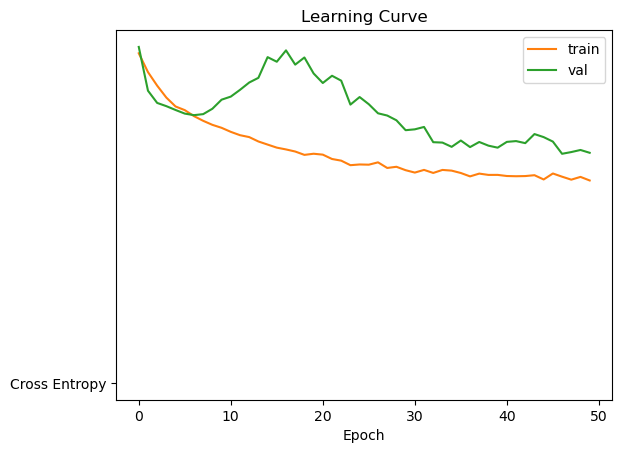

In [268]:
plt.title('Learning Curve')
plt.xlabel('Epoch')
plt.plot('Cross Entropy')
plt.plot(history_model_0.history['loss'],label='train')
plt.plot(history_model_0.history['val_loss'],label='val')
plt.legend()
plt.show()

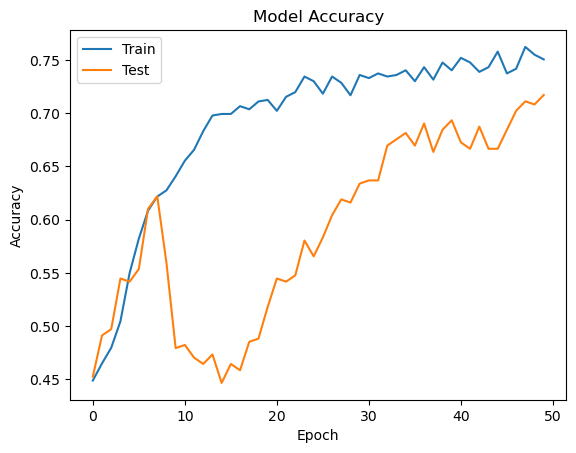

In [269]:
plt.figure()
plt.plot(history_model_0.history['accuracy'])
plt.plot(history_model_0.history['val_accuracy'])  
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train','Test'])
plt.show()

# Search ile best sonuc bulma

In [270]:
def create_model(optimizer="rmsprop", lr=0.01, kernel_initializer="glorot_uniform"):
    model = Sequential()
    model.add(Dense(10, input_shape=(11,)))
    model.add(Activation("relu"))
    model.add(BatchNormalization())
    model.add(Dense(1, activation="sigmoid"))
    model.compile(loss="binary_crossentropy", optimizer=optimizer, metrics=["accuracy"])
    return model

In [271]:
from sklearn.model_selection import RandomizedSearchCV
from scikeras.wrappers import KerasClassifier, KerasRegressor
model = KerasClassifier(model=create_model, lr=None, optimizer=None)
params = {"optimizer": ["adam",'sgd'], "lr": [0.01,0.001],'batch_size': [32, 128, 256], 
          'epochs': [10, 20, 30,40,50]}
search = RandomizedSearchCV(model, params)
search.fit(X_train, y_train)

Epoch 1/30
5/5 [==============================] - 0s 2ms/step - loss: 0.7977 - accuracy: 0.4422
Epoch 2/30
5/5 [==============================] - 0s 2ms/step - loss: 0.7637 - accuracy: 0.4550
Epoch 3/30
5/5 [==============================] - 0s 2ms/step - loss: 0.7473 - accuracy: 0.4752
Epoch 4/30
5/5 [==============================] - 0s 2ms/step - loss: 0.7352 - accuracy: 0.4936
Epoch 5/30
5/5 [==============================] - 0s 2ms/step - loss: 0.7303 - accuracy: 0.4991
Epoch 6/30
5/5 [==============================] - 0s 2ms/step - loss: 0.7249 - accuracy: 0.5064
Epoch 7/30
5/5 [==============================] - 0s 2ms/step - loss: 0.7177 - accuracy: 0.5156
Epoch 8/30
5/5 [==============================] - 0s 2ms/step - loss: 0.7136 - accuracy: 0.5229
Epoch 9/30
5/5 [==============================] - 0s 2ms/step - loss: 0.7022 - accuracy: 0.5394
Epoch 10/30
5/5 [==============================] - 0s 2ms/step - loss: 0.6958 - accuracy: 0.5615
Epoch 11/30
5/5 [======================

5/5 [==============================] - 0s 2ms/step - loss: 0.6599 - accuracy: 0.5971
Epoch 25/30
5/5 [==============================] - 0s 2ms/step - loss: 0.6592 - accuracy: 0.5916
Epoch 26/30
5/5 [==============================] - 0s 2ms/step - loss: 0.6579 - accuracy: 0.5971
Epoch 27/30
5/5 [==============================] - 0s 2ms/step - loss: 0.6572 - accuracy: 0.5971
Epoch 28/30
5/5 [==============================] - 0s 2ms/step - loss: 0.6546 - accuracy: 0.6026
Epoch 29/30
5/5 [==============================] - 0s 2ms/step - loss: 0.6546 - accuracy: 0.6081
Epoch 30/30
2/2 [==============================] - 0s 2ms/step
Epoch 1/30
5/5 [==============================] - 0s 2ms/step - loss: 0.7425 - accuracy: 0.4396
Epoch 2/30
5/5 [==============================] - 0s 2ms/step - loss: 0.7326 - accuracy: 0.4487
Epoch 3/30
5/5 [==============================] - 0s 2ms/step - loss: 0.7252 - accuracy: 0.4524
Epoch 4/30
5/5 [==============================] - 0s 2ms/step - loss: 0.7215 - 

5/5 [==============================] - 0s 2ms/step - loss: 0.7908 - accuracy: 0.5009
Epoch 7/10
5/5 [==============================] - 0s 2ms/step - loss: 0.7881 - accuracy: 0.4936
Epoch 8/10
5/5 [==============================] - 0s 2ms/step - loss: 0.7752 - accuracy: 0.5101
Epoch 9/10
5/5 [==============================] - 0s 2ms/step - loss: 0.7614 - accuracy: 0.5211
Epoch 10/10
2/2 [==============================] - 0s 2ms/step
Epoch 1/10
5/5 [==============================] - 0s 2ms/step - loss: 0.8107 - accuracy: 0.4744
Epoch 2/10
5/5 [==============================] - 0s 2ms/step - loss: 0.7812 - accuracy: 0.4963
Epoch 3/10
5/5 [==============================] - 0s 2ms/step - loss: 0.7648 - accuracy: 0.5018
Epoch 4/10
5/5 [==============================] - 0s 2ms/step - loss: 0.7499 - accuracy: 0.5165
Epoch 5/10
5/5 [==============================] - 0s 2ms/step - loss: 0.7439 - accuracy: 0.5238
Epoch 6/10
5/5 [==============================] - 0s 2ms/step - loss: 0.7304 - accur

Epoch 8/20
3/3 [==============================] - 0s 2ms/step - loss: 0.7653 - accuracy: 0.3315
Epoch 9/20
3/3 [==============================] - 0s 3ms/step - loss: 0.7598 - accuracy: 0.3297
Epoch 10/20
3/3 [==============================] - 0s 3ms/step - loss: 0.7527 - accuracy: 0.3590
Epoch 11/20
3/3 [==============================] - 0s 2ms/step - loss: 0.7472 - accuracy: 0.3681
Epoch 12/20
3/3 [==============================] - 0s 3ms/step - loss: 0.7439 - accuracy: 0.3773
Epoch 13/20
3/3 [==============================] - 0s 3ms/step - loss: 0.7377 - accuracy: 0.3901
Epoch 14/20
3/3 [==============================] - 0s 3ms/step - loss: 0.7358 - accuracy: 0.3974
Epoch 15/20
3/3 [==============================] - 0s 3ms/step - loss: 0.7311 - accuracy: 0.4084
Epoch 16/20
3/3 [==============================] - 0s 2ms/step - loss: 0.7293 - accuracy: 0.4011
Epoch 17/20
3/3 [==============================] - 0s 3ms/step - loss: 0.7233 - accuracy: 0.4139
Epoch 18/20
3/3 [===============

18/18 [==============================] - 0s 1ms/step - loss: 0.5396 - accuracy: 0.7431
Epoch 31/50
18/18 [==============================] - 0s 1ms/step - loss: 0.5331 - accuracy: 0.7303
Epoch 32/50
18/18 [==============================] - 0s 1ms/step - loss: 0.5329 - accuracy: 0.7303
Epoch 33/50
18/18 [==============================] - 0s 1ms/step - loss: 0.5274 - accuracy: 0.7284
Epoch 34/50
18/18 [==============================] - 0s 1ms/step - loss: 0.5409 - accuracy: 0.7229
Epoch 35/50
18/18 [==============================] - 0s 1ms/step - loss: 0.5306 - accuracy: 0.7468
Epoch 36/50
18/18 [==============================] - 0s 1ms/step - loss: 0.5250 - accuracy: 0.7468
Epoch 37/50
18/18 [==============================] - 0s 1ms/step - loss: 0.5308 - accuracy: 0.7431
Epoch 38/50
18/18 [==============================] - 0s 1ms/step - loss: 0.5187 - accuracy: 0.7505
Epoch 39/50
18/18 [==============================] - 0s 1ms/step - loss: 0.5230 - accuracy: 0.7394
Epoch 40/50
18/18 [===

Epoch 12/50
18/18 [==============================] - 0s 1ms/step - loss: 0.6274 - accuracy: 0.6337
Epoch 13/50
18/18 [==============================] - 0s 1ms/step - loss: 0.6227 - accuracy: 0.6557
Epoch 14/50
18/18 [==============================] - 0s 1ms/step - loss: 0.6155 - accuracy: 0.6465
Epoch 15/50
18/18 [==============================] - 0s 1ms/step - loss: 0.6117 - accuracy: 0.6667
Epoch 16/50
18/18 [==============================] - 0s 1ms/step - loss: 0.6046 - accuracy: 0.6648
Epoch 17/50
18/18 [==============================] - 0s 1ms/step - loss: 0.6057 - accuracy: 0.6832
Epoch 18/50
18/18 [==============================] - 0s 1ms/step - loss: 0.6020 - accuracy: 0.6905
Epoch 19/50
18/18 [==============================] - 0s 1ms/step - loss: 0.5915 - accuracy: 0.7015
Epoch 20/50
18/18 [==============================] - 0s 1ms/step - loss: 0.5822 - accuracy: 0.7070
Epoch 21/50
18/18 [==============================] - 0s 1ms/step - loss: 0.5754 - accuracy: 0.7143
Epoch 22/5

18/18 [==============================] - 0s 2ms/step - loss: 0.5221 - accuracy: 0.7399
Epoch 45/50
18/18 [==============================] - 0s 1ms/step - loss: 0.5256 - accuracy: 0.7436
Epoch 46/50
18/18 [==============================] - 0s 1ms/step - loss: 0.5238 - accuracy: 0.7418
Epoch 47/50
18/18 [==============================] - 0s 1ms/step - loss: 0.5285 - accuracy: 0.7399
Epoch 48/50
18/18 [==============================] - 0s 1ms/step - loss: 0.5260 - accuracy: 0.7418
Epoch 49/50
18/18 [==============================] - 0s 1ms/step - loss: 0.5245 - accuracy: 0.7289
Epoch 50/50
5/5 [==============================] - 0s 1ms/step
Epoch 1/50
18/18 [==============================] - 0s 1ms/step - loss: 1.0570 - accuracy: 0.4945
Epoch 2/50
18/18 [==============================] - 0s 1ms/step - loss: 0.9363 - accuracy: 0.5037
Epoch 3/50
18/18 [==============================] - 0s 1ms/step - loss: 0.8482 - accuracy: 0.5476
Epoch 4/50
18/18 [==============================] - 0s 1ms/st

18/18 [==============================] - 0s 1ms/step - loss: 0.7220 - accuracy: 0.4707
Epoch 6/10
18/18 [==============================] - 0s 1ms/step - loss: 0.7076 - accuracy: 0.5128
Epoch 7/10
18/18 [==============================] - 0s 1ms/step - loss: 0.6901 - accuracy: 0.5311
Epoch 8/10
18/18 [==============================] - 0s 1ms/step - loss: 0.6834 - accuracy: 0.5696
Epoch 9/10
18/18 [==============================] - 0s 1ms/step - loss: 0.6725 - accuracy: 0.5916
Epoch 10/10
5/5 [==============================] - 0s 1ms/step
Epoch 1/10
18/18 [==============================] - 0s 1ms/step - loss: 0.8824 - accuracy: 0.4249
Epoch 2/10
18/18 [==============================] - 0s 1ms/step - loss: 0.8263 - accuracy: 0.4414
Epoch 3/10
18/18 [==============================] - 0s 1ms/step - loss: 0.7991 - accuracy: 0.4267
Epoch 4/10
18/18 [==============================] - 0s 1ms/step - loss: 0.7822 - accuracy: 0.4487
Epoch 5/10
18/18 [==============================] - 0s 1ms/step - 

18/18 [==============================] - 0s 1ms/step - loss: 0.5608 - accuracy: 0.7119
Epoch 27/30
18/18 [==============================] - 0s 1ms/step - loss: 0.5639 - accuracy: 0.7028
Epoch 28/30
18/18 [==============================] - 0s 1ms/step - loss: 0.5577 - accuracy: 0.7064
Epoch 29/30
18/18 [==============================] - 0s 1ms/step - loss: 0.5492 - accuracy: 0.7248
Epoch 30/30
5/5 [==============================] - 0s 1ms/step
Epoch 1/30
18/18 [==============================] - 0s 1ms/step - loss: 1.0332 - accuracy: 0.4084
Epoch 2/30
18/18 [==============================] - 0s 1ms/step - loss: 0.8483 - accuracy: 0.4396
Epoch 3/30
18/18 [==============================] - 0s 1ms/step - loss: 0.7524 - accuracy: 0.5110
Epoch 4/30
18/18 [==============================] - 0s 1ms/step - loss: 0.7120 - accuracy: 0.5348
Epoch 5/30
18/18 [==============================] - 0s 1ms/step - loss: 0.6901 - accuracy: 0.5641
Epoch 6/30
18/18 [==============================] - 0s 1ms/step

18/18 [==============================] - 0s 1ms/step - loss: 0.5713 - accuracy: 0.7015
Epoch 18/30
18/18 [==============================] - 0s 1ms/step - loss: 0.5779 - accuracy: 0.6941
Epoch 19/30
18/18 [==============================] - 0s 1ms/step - loss: 0.5737 - accuracy: 0.6905
Epoch 20/30
18/18 [==============================] - 0s 1ms/step - loss: 0.5577 - accuracy: 0.7143
Epoch 21/30
18/18 [==============================] - 0s 1ms/step - loss: 0.5602 - accuracy: 0.7051
Epoch 22/30
18/18 [==============================] - 0s 1ms/step - loss: 0.5544 - accuracy: 0.7088
Epoch 23/30
18/18 [==============================] - 0s 1ms/step - loss: 0.5489 - accuracy: 0.6996
Epoch 24/30
18/18 [==============================] - 0s 1ms/step - loss: 0.5340 - accuracy: 0.7289
Epoch 25/30
18/18 [==============================] - 0s 1ms/step - loss: 0.5337 - accuracy: 0.7344
Epoch 26/30
18/18 [==============================] - 0s 1ms/step - loss: 0.5272 - accuracy: 0.7308
Epoch 27/30
18/18 [===

3/3 [==============================] - 0s 3ms/step - loss: 0.6113 - accuracy: 0.6679
Epoch 31/40
3/3 [==============================] - 0s 3ms/step - loss: 0.6104 - accuracy: 0.6752
Epoch 32/40
3/3 [==============================] - 0s 3ms/step - loss: 0.6098 - accuracy: 0.6771
Epoch 33/40
3/3 [==============================] - 0s 3ms/step - loss: 0.6073 - accuracy: 0.6844
Epoch 34/40
3/3 [==============================] - 0s 3ms/step - loss: 0.6056 - accuracy: 0.6752
Epoch 35/40
3/3 [==============================] - 0s 3ms/step - loss: 0.6028 - accuracy: 0.6716
Epoch 36/40
3/3 [==============================] - 0s 2ms/step - loss: 0.6037 - accuracy: 0.6679
Epoch 37/40
3/3 [==============================] - 0s 3ms/step - loss: 0.6023 - accuracy: 0.6789
Epoch 38/40
3/3 [==============================] - 0s 3ms/step - loss: 0.6014 - accuracy: 0.6697
Epoch 39/40
3/3 [==============================] - 0s 3ms/step - loss: 0.5995 - accuracy: 0.6789
Epoch 40/40
1/1 [=========================

3/3 [==============================] - 0s 3ms/step - loss: 0.6543 - accuracy: 0.6282
Epoch 34/40
3/3 [==============================] - 0s 3ms/step - loss: 0.6530 - accuracy: 0.6355
Epoch 35/40
3/3 [==============================] - 0s 2ms/step - loss: 0.6538 - accuracy: 0.6410
Epoch 36/40
3/3 [==============================] - 0s 3ms/step - loss: 0.6496 - accuracy: 0.6520
Epoch 37/40
3/3 [==============================] - 0s 3ms/step - loss: 0.6503 - accuracy: 0.6429
Epoch 38/40
3/3 [==============================] - 0s 3ms/step - loss: 0.6483 - accuracy: 0.6392
Epoch 39/40
3/3 [==============================] - 0s 3ms/step - loss: 0.6466 - accuracy: 0.6465
Epoch 40/40
1/1 [==============================] - 0s 48ms/step
Epoch 1/40
3/3 [==============================] - 0s 2ms/step - loss: 0.7502 - accuracy: 0.4304
Epoch 2/40
3/3 [==============================] - 0s 3ms/step - loss: 0.7395 - accuracy: 0.4487
Epoch 3/40
3/3 [==============================] - 0s 3ms/step - loss: 0.7337 

5/5 [==============================] - 0s 2ms/step - loss: 0.7319 - accuracy: 0.5788
Epoch 6/10
5/5 [==============================] - 0s 2ms/step - loss: 0.7151 - accuracy: 0.5952
Epoch 7/10
5/5 [==============================] - 0s 2ms/step - loss: 0.7047 - accuracy: 0.5897
Epoch 8/10
5/5 [==============================] - 0s 2ms/step - loss: 0.6921 - accuracy: 0.6007
Epoch 9/10
5/5 [==============================] - 0s 2ms/step - loss: 0.6836 - accuracy: 0.6062
Epoch 10/10
2/2 [==============================] - 0s 2ms/step
Epoch 1/10
5/5 [==============================] - 1s 2ms/step - loss: 0.7172 - accuracy: 0.4451
Epoch 2/10
5/5 [==============================] - 0s 2ms/step - loss: 0.7123 - accuracy: 0.4542
Epoch 3/10
5/5 [==============================] - 0s 2ms/step - loss: 0.7092 - accuracy: 0.4670
Epoch 4/10
5/5 [==============================] - 0s 2ms/step - loss: 0.7063 - accuracy: 0.4817
Epoch 5/10
5/5 [==============================] - 0s 2ms/step - loss: 0.7030 - accur

18/18 [==============================] - 0s 1ms/step - loss: 0.6923 - accuracy: 0.5659
Epoch 7/30
18/18 [==============================] - 0s 1ms/step - loss: 0.6817 - accuracy: 0.5714
Epoch 8/30
18/18 [==============================] - 0s 1ms/step - loss: 0.6687 - accuracy: 0.6007
Epoch 9/30
18/18 [==============================] - 0s 1ms/step - loss: 0.6569 - accuracy: 0.6154
Epoch 10/30
18/18 [==============================] - 0s 1ms/step - loss: 0.6481 - accuracy: 0.6319
Epoch 11/30
18/18 [==============================] - 0s 1ms/step - loss: 0.6412 - accuracy: 0.6465
Epoch 12/30
18/18 [==============================] - 0s 1ms/step - loss: 0.6351 - accuracy: 0.6410
Epoch 13/30
18/18 [==============================] - 0s 1ms/step - loss: 0.6308 - accuracy: 0.6484
Epoch 14/30
18/18 [==============================] - 0s 1ms/step - loss: 0.6194 - accuracy: 0.6520
Epoch 15/30
18/18 [==============================] - 0s 1ms/step - loss: 0.6182 - accuracy: 0.6758
Epoch 16/30
18/18 [======

18/18 [==============================] - 0s 1ms/step - loss: 0.5977 - accuracy: 0.6795
Epoch 29/30
18/18 [==============================] - 0s 1ms/step - loss: 0.5996 - accuracy: 0.6795
Epoch 30/30
5/5 [==============================] - 0s 1ms/step
Epoch 1/20
18/18 [==============================] - 1s 1ms/step - loss: 0.8834 - accuracy: 0.5211
Epoch 2/20
18/18 [==============================] - 0s 1ms/step - loss: 0.7649 - accuracy: 0.5578
Epoch 3/20
18/18 [==============================] - 0s 2ms/step - loss: 0.6795 - accuracy: 0.5927
Epoch 4/20
18/18 [==============================] - 0s 2ms/step - loss: 0.6492 - accuracy: 0.6349
Epoch 5/20
18/18 [==============================] - 0s 2ms/step - loss: 0.6283 - accuracy: 0.6606
Epoch 6/20
18/18 [==============================] - 0s 2ms/step - loss: 0.6177 - accuracy: 0.6624
Epoch 7/20
18/18 [==============================] - 0s 2ms/step - loss: 0.6039 - accuracy: 0.6661
Epoch 8/20
18/18 [==============================] - 0s 1ms/step -

18/18 [==============================] - 0s 1ms/step - loss: 0.6006 - accuracy: 0.6996
Epoch 20/20
5/5 [==============================] - 0s 1ms/step
Epoch 1/20
18/18 [==============================] - 0s 1ms/step - loss: 0.7471 - accuracy: 0.4267
Epoch 2/20
18/18 [==============================] - 0s 1ms/step - loss: 0.7197 - accuracy: 0.4560
Epoch 3/20
18/18 [==============================] - 0s 1ms/step - loss: 0.6929 - accuracy: 0.5201
Epoch 4/20
18/18 [==============================] - 0s 1ms/step - loss: 0.6813 - accuracy: 0.5678
Epoch 5/20
18/18 [==============================] - 0s 1ms/step - loss: 0.6672 - accuracy: 0.6209
Epoch 6/20
18/18 [==============================] - 0s 1ms/step - loss: 0.6558 - accuracy: 0.6593
Epoch 7/20
18/18 [==============================] - 0s 1ms/step - loss: 0.6485 - accuracy: 0.6575
Epoch 8/20
18/18 [==============================] - 0s 1ms/step - loss: 0.6428 - accuracy: 0.6484
Epoch 9/20
18/18 [==============================] - 0s 1ms/step - 

RandomizedSearchCV(estimator=KerasClassifier(lr=None, model=<function create_model at 0x000001930F3E9670>, optimizer=None),
                   param_distributions={'batch_size': [32, 128, 256],
                                        'epochs': [10, 20, 30, 40, 50],
                                        'lr': [0.01, 0.001],
                                        'optimizer': ['adam', 'sgd']})

In [272]:
print(search.best_score_)
print(search.best_params_)

0.6993559467582653
{'optimizer': 'sgd', 'lr': 0.01, 'epochs': 50, 'batch_size': 32}


In [273]:
y_train_pred=search.predict(X_train)

22/22 [==============================] - 0s 919us/step


In [274]:
y_test_pred=search.predict(X_test)

11/11 [==============================] - 0s 901us/step


In [275]:
search.score(X_train,y_train)

22/22 [==============================] - 0s 960us/step


0.7639296187683284

In [276]:
search.score(X_test,y_test)

11/11 [==============================] - 0s 800us/step


0.7142857142857143

In [277]:
# Import cross_val_score
from sklearn.model_selection import cross_val_score
# Check how your keras model performs with 5 fold crossvalidation
kfold = cross_val_score(search, X_train, y_train, cv=5)
# Print the mean accuracy per fold
kfold.mean()
# Print the standard deviation per fold
kfold.std()

Epoch 1/50
4/4 [==============================] - 0s 2ms/step - loss: 0.7898 - accuracy: 0.4151
Epoch 2/50
4/4 [==============================] - 0s 2ms/step - loss: 0.7803 - accuracy: 0.4220
Epoch 3/50
4/4 [==============================] - 0s 2ms/step - loss: 0.7721 - accuracy: 0.4197
Epoch 4/50
4/4 [==============================] - 0s 2ms/step - loss: 0.7646 - accuracy: 0.4358
Epoch 5/50
4/4 [==============================] - 0s 2ms/step - loss: 0.7601 - accuracy: 0.4289
Epoch 6/50
4/4 [==============================] - 0s 2ms/step - loss: 0.7529 - accuracy: 0.4335
Epoch 7/50
4/4 [==============================] - 0s 2ms/step - loss: 0.7466 - accuracy: 0.4312
Epoch 8/50
4/4 [==============================] - 0s 2ms/step - loss: 0.7423 - accuracy: 0.4472
Epoch 9/50
4/4 [==============================] - 0s 2ms/step - loss: 0.7395 - accuracy: 0.4404
Epoch 10/50
4/4 [==============================] - 0s 2ms/step - loss: 0.7316 - accuracy: 0.4472
Epoch 11/50
4/4 [======================

4/4 [==============================] - 0s 2ms/step - loss: 0.6274 - accuracy: 0.6628
Epoch 36/50
4/4 [==============================] - 0s 2ms/step - loss: 0.6259 - accuracy: 0.6583
Epoch 37/50
4/4 [==============================] - 0s 2ms/step - loss: 0.6202 - accuracy: 0.6674
Epoch 38/50
4/4 [==============================] - 0s 3ms/step - loss: 0.6209 - accuracy: 0.6720
Epoch 39/50
4/4 [==============================] - 0s 2ms/step - loss: 0.6192 - accuracy: 0.6766
Epoch 40/50
4/4 [==============================] - 0s 2ms/step - loss: 0.6152 - accuracy: 0.6697
Epoch 41/50
4/4 [==============================] - 0s 2ms/step - loss: 0.6129 - accuracy: 0.6720
Epoch 42/50
4/4 [==============================] - 0s 2ms/step - loss: 0.6151 - accuracy: 0.6628
Epoch 43/50
4/4 [==============================] - 0s 2ms/step - loss: 0.6097 - accuracy: 0.6789
Epoch 44/50
4/4 [==============================] - 0s 2ms/step - loss: 0.6097 - accuracy: 0.6697
Epoch 45/50
4/4 [=========================

4/4 [==============================] - 0s 2ms/step - loss: 0.6219 - accuracy: 0.6468
Epoch 19/50
4/4 [==============================] - 0s 2ms/step - loss: 0.6205 - accuracy: 0.6422
Epoch 20/50
4/4 [==============================] - 0s 2ms/step - loss: 0.6180 - accuracy: 0.6399
Epoch 21/50
4/4 [==============================] - 0s 2ms/step - loss: 0.6157 - accuracy: 0.6514
Epoch 22/50
4/4 [==============================] - 0s 2ms/step - loss: 0.6127 - accuracy: 0.6445
Epoch 23/50
4/4 [==============================] - 0s 2ms/step - loss: 0.6136 - accuracy: 0.6399
Epoch 24/50
4/4 [==============================] - 0s 2ms/step - loss: 0.6100 - accuracy: 0.6583
Epoch 25/50
4/4 [==============================] - 0s 2ms/step - loss: 0.6065 - accuracy: 0.6651
Epoch 26/50
4/4 [==============================] - 0s 2ms/step - loss: 0.6048 - accuracy: 0.6651
Epoch 27/50
4/4 [==============================] - 0s 2ms/step - loss: 0.6033 - accuracy: 0.6720
Epoch 28/50
4/4 [=========================

14/14 [==============================] - 0s 1ms/step - loss: 0.7438 - accuracy: 0.5528
Epoch 2/40
14/14 [==============================] - 0s 2ms/step - loss: 0.7160 - accuracy: 0.5596
Epoch 3/40
14/14 [==============================] - 0s 1ms/step - loss: 0.7103 - accuracy: 0.5390
Epoch 4/40
14/14 [==============================] - 0s 1ms/step - loss: 0.7021 - accuracy: 0.5550
Epoch 5/40
14/14 [==============================] - 0s 2ms/step - loss: 0.6862 - accuracy: 0.5596
Epoch 6/40
14/14 [==============================] - 0s 2ms/step - loss: 0.6877 - accuracy: 0.5528
Epoch 7/40
14/14 [==============================] - 0s 1ms/step - loss: 0.6735 - accuracy: 0.5734
Epoch 8/40
14/14 [==============================] - 0s 1ms/step - loss: 0.6673 - accuracy: 0.5872
Epoch 9/40
14/14 [==============================] - 0s 1ms/step - loss: 0.6668 - accuracy: 0.5963
Epoch 10/40
14/14 [==============================] - 0s 2ms/step - loss: 0.6583 - accuracy: 0.6009
Epoch 11/40
14/14 [===========

14/14 [==============================] - 0s 1ms/step - loss: 0.6682 - accuracy: 0.5917
Epoch 4/40
14/14 [==============================] - 0s 1ms/step - loss: 0.6636 - accuracy: 0.6101
Epoch 5/40
14/14 [==============================] - 0s 1ms/step - loss: 0.6527 - accuracy: 0.6307
Epoch 6/40
14/14 [==============================] - 0s 1ms/step - loss: 0.6516 - accuracy: 0.6216
Epoch 7/40
14/14 [==============================] - 0s 1ms/step - loss: 0.6441 - accuracy: 0.6445
Epoch 8/40
14/14 [==============================] - 0s 1ms/step - loss: 0.6369 - accuracy: 0.6468
Epoch 9/40
14/14 [==============================] - 0s 1ms/step - loss: 0.6402 - accuracy: 0.6330
Epoch 10/40
14/14 [==============================] - 0s 1ms/step - loss: 0.6334 - accuracy: 0.6399
Epoch 11/40
14/14 [==============================] - 0s 1ms/step - loss: 0.6299 - accuracy: 0.6491
Epoch 12/40
14/14 [==============================] - 0s 1ms/step - loss: 0.6260 - accuracy: 0.6422
Epoch 13/40
14/14 [=========

14/14 [==============================] - 0s 1ms/step - loss: 0.6790 - accuracy: 0.5826
Epoch 6/40
14/14 [==============================] - 0s 1ms/step - loss: 0.6705 - accuracy: 0.6330
Epoch 7/40
14/14 [==============================] - 0s 1ms/step - loss: 0.6657 - accuracy: 0.6399
Epoch 8/40
14/14 [==============================] - 0s 1ms/step - loss: 0.6595 - accuracy: 0.6583
Epoch 9/40
14/14 [==============================] - 0s 2ms/step - loss: 0.6499 - accuracy: 0.6904
Epoch 10/40
14/14 [==============================] - 0s 1ms/step - loss: 0.6456 - accuracy: 0.6904
Epoch 11/40
14/14 [==============================] - 0s 1ms/step - loss: 0.6416 - accuracy: 0.6858
Epoch 12/40
14/14 [==============================] - 0s 2ms/step - loss: 0.6368 - accuracy: 0.6720
Epoch 13/40
14/14 [==============================] - 0s 1ms/step - loss: 0.6280 - accuracy: 0.7064
Epoch 14/40
14/14 [==============================] - 0s 1ms/step - loss: 0.6232 - accuracy: 0.6927
Epoch 15/40
14/14 [=======

14/14 [==============================] - 0s 2ms/step - loss: 0.6591 - accuracy: 0.6170
Epoch 6/10
14/14 [==============================] - 0s 2ms/step - loss: 0.6473 - accuracy: 0.6422
Epoch 7/10
14/14 [==============================] - 0s 1ms/step - loss: 0.6352 - accuracy: 0.6422
Epoch 8/10
14/14 [==============================] - 0s 2ms/step - loss: 0.6233 - accuracy: 0.6537
Epoch 9/10
14/14 [==============================] - 0s 1ms/step - loss: 0.6146 - accuracy: 0.6651
Epoch 10/10
4/4 [==============================] - 0s 1ms/step
Epoch 1/10
14/14 [==============================] - 0s 1ms/step - loss: 0.7859 - accuracy: 0.4771
Epoch 2/10
14/14 [==============================] - 0s 1ms/step - loss: 0.7549 - accuracy: 0.4885
Epoch 3/10
14/14 [==============================] - 0s 1ms/step - loss: 0.7418 - accuracy: 0.5023
Epoch 4/10
14/14 [==============================] - 0s 1ms/step - loss: 0.7208 - accuracy: 0.4931
Epoch 5/10
14/14 [==============================] - 0s 1ms/step - 

4/4 [==============================] - 0s 2ms/step - loss: 0.6115 - accuracy: 0.6743
Epoch 26/30
4/4 [==============================] - 0s 2ms/step - loss: 0.6056 - accuracy: 0.6812
Epoch 27/30
4/4 [==============================] - 0s 2ms/step - loss: 0.6032 - accuracy: 0.6835
Epoch 28/30
4/4 [==============================] - 0s 2ms/step - loss: 0.6060 - accuracy: 0.6927
Epoch 29/30
4/4 [==============================] - 0s 2ms/step - loss: 0.6009 - accuracy: 0.6904
Epoch 30/30
1/1 [==============================] - 0s 47ms/step
Epoch 1/30
4/4 [==============================] - 0s 2ms/step - loss: 0.7208 - accuracy: 0.5390
Epoch 2/30
4/4 [==============================] - 0s 2ms/step - loss: 0.7115 - accuracy: 0.5367
Epoch 3/30
4/4 [==============================] - 0s 2ms/step - loss: 0.7085 - accuracy: 0.5367
Epoch 4/30
4/4 [==============================] - 0s 2ms/step - loss: 0.7025 - accuracy: 0.5321
Epoch 5/30
4/4 [==============================] - 0s 2ms/step - loss: 0.6991 - 

4/4 [==============================] - 0s 2ms/step - loss: 0.7411 - accuracy: 0.3899
Epoch 19/30
4/4 [==============================] - 0s 2ms/step - loss: 0.7355 - accuracy: 0.4106
Epoch 20/30
4/4 [==============================] - 0s 2ms/step - loss: 0.7356 - accuracy: 0.4220
Epoch 21/30
4/4 [==============================] - 0s 2ms/step - loss: 0.7312 - accuracy: 0.4106
Epoch 22/30
4/4 [==============================] - 0s 2ms/step - loss: 0.7283 - accuracy: 0.4266
Epoch 23/30
4/4 [==============================] - 0s 2ms/step - loss: 0.7278 - accuracy: 0.4358
Epoch 24/30
4/4 [==============================] - 0s 2ms/step - loss: 0.7267 - accuracy: 0.4312
Epoch 25/30
4/4 [==============================] - 0s 2ms/step - loss: 0.7205 - accuracy: 0.4266
Epoch 26/30
4/4 [==============================] - 0s 3ms/step - loss: 0.7201 - accuracy: 0.4450
Epoch 27/30
4/4 [==============================] - 0s 2ms/step - loss: 0.7102 - accuracy: 0.4495
Epoch 28/30
4/4 [=========================

1/1 [==============================] - 0s 47ms/step
Epoch 1/10
2/2 [==============================] - 0s 4ms/step - loss: 0.7390 - accuracy: 0.6078
Epoch 2/10
2/2 [==============================] - 0s 3ms/step - loss: 0.7302 - accuracy: 0.6101
Epoch 3/10
2/2 [==============================] - 0s 3ms/step - loss: 0.7227 - accuracy: 0.6216
Epoch 4/10
2/2 [==============================] - 0s 3ms/step - loss: 0.7144 - accuracy: 0.6261
Epoch 5/10
2/2 [==============================] - 0s 4ms/step - loss: 0.7111 - accuracy: 0.6216
Epoch 6/10
2/2 [==============================] - 0s 3ms/step - loss: 0.7033 - accuracy: 0.6330
Epoch 7/10
2/2 [==============================] - 0s 4ms/step - loss: 0.6978 - accuracy: 0.6353
Epoch 8/10
2/2 [==============================] - 0s 3ms/step - loss: 0.6972 - accuracy: 0.6422
Epoch 9/10
2/2 [==============================] - 0s 3ms/step - loss: 0.6909 - accuracy: 0.6353
Epoch 10/10
1/1 [==============================] - 0s 48ms/step
Epoch 1/10
4/4 [====

4/4 [==============================] - 0s 2ms/step - loss: 0.6841 - accuracy: 0.5229
Epoch 22/40
4/4 [==============================] - 0s 2ms/step - loss: 0.6845 - accuracy: 0.4908
Epoch 23/40
4/4 [==============================] - 0s 2ms/step - loss: 0.6833 - accuracy: 0.5161
Epoch 24/40
4/4 [==============================] - 0s 2ms/step - loss: 0.6837 - accuracy: 0.5138
Epoch 25/40
4/4 [==============================] - 0s 2ms/step - loss: 0.6840 - accuracy: 0.5252
Epoch 26/40
4/4 [==============================] - 0s 2ms/step - loss: 0.6805 - accuracy: 0.5252
Epoch 27/40
4/4 [==============================] - 0s 2ms/step - loss: 0.6833 - accuracy: 0.5229
Epoch 28/40
4/4 [==============================] - 0s 2ms/step - loss: 0.6817 - accuracy: 0.5252
Epoch 29/40
4/4 [==============================] - 0s 2ms/step - loss: 0.6838 - accuracy: 0.5252
Epoch 30/40
4/4 [==============================] - 0s 2ms/step - loss: 0.6815 - accuracy: 0.5252
Epoch 31/40
4/4 [=========================

4/4 [==============================] - 0s 3ms/step - loss: 0.6389 - accuracy: 0.6353
Epoch 25/40
4/4 [==============================] - 0s 2ms/step - loss: 0.6377 - accuracy: 0.6399
Epoch 26/40
4/4 [==============================] - 0s 2ms/step - loss: 0.6371 - accuracy: 0.6468
Epoch 27/40
4/4 [==============================] - 0s 2ms/step - loss: 0.6338 - accuracy: 0.6445
Epoch 28/40
4/4 [==============================] - 0s 2ms/step - loss: 0.6323 - accuracy: 0.6353
Epoch 29/40
4/4 [==============================] - 0s 2ms/step - loss: 0.6278 - accuracy: 0.6353
Epoch 30/40
4/4 [==============================] - 0s 2ms/step - loss: 0.6229 - accuracy: 0.6651
Epoch 31/40
4/4 [==============================] - 0s 2ms/step - loss: 0.6231 - accuracy: 0.6583
Epoch 32/40
4/4 [==============================] - 0s 2ms/step - loss: 0.6233 - accuracy: 0.6674
Epoch 33/40
4/4 [==============================] - 0s 2ms/step - loss: 0.6180 - accuracy: 0.6606
Epoch 34/40
4/4 [=========================

4/4 [==============================] - 0s 2ms/step - loss: 0.6330 - accuracy: 0.6514
Epoch 28/40
4/4 [==============================] - 0s 2ms/step - loss: 0.6318 - accuracy: 0.6422
Epoch 29/40
4/4 [==============================] - 0s 2ms/step - loss: 0.6257 - accuracy: 0.6583
Epoch 30/40
4/4 [==============================] - 0s 2ms/step - loss: 0.6225 - accuracy: 0.6537
Epoch 31/40
4/4 [==============================] - 0s 4ms/step - loss: 0.6172 - accuracy: 0.6651
Epoch 32/40
4/4 [==============================] - 0s 2ms/step - loss: 0.6138 - accuracy: 0.6766
Epoch 33/40
4/4 [==============================] - 0s 2ms/step - loss: 0.6096 - accuracy: 0.6697
Epoch 34/40
4/4 [==============================] - 0s 2ms/step - loss: 0.6011 - accuracy: 0.6858
Epoch 35/40
4/4 [==============================] - 0s 2ms/step - loss: 0.6003 - accuracy: 0.6835
Epoch 36/40
4/4 [==============================] - 0s 2ms/step - loss: 0.5975 - accuracy: 0.6904
Epoch 37/40
4/4 [=========================

2/2 [==============================] - 0s 4ms/step - loss: 0.6150 - accuracy: 0.6789
Epoch 31/40
2/2 [==============================] - 0s 4ms/step - loss: 0.6161 - accuracy: 0.6743
Epoch 32/40
2/2 [==============================] - 0s 4ms/step - loss: 0.6121 - accuracy: 0.6950
Epoch 33/40
2/2 [==============================] - 0s 4ms/step - loss: 0.6101 - accuracy: 0.6904
Epoch 34/40
2/2 [==============================] - 0s 4ms/step - loss: 0.6091 - accuracy: 0.6927
Epoch 35/40
2/2 [==============================] - 0s 4ms/step - loss: 0.6100 - accuracy: 0.6881
Epoch 36/40
2/2 [==============================] - 0s 4ms/step - loss: 0.6058 - accuracy: 0.6950
Epoch 37/40
2/2 [==============================] - 0s 4ms/step - loss: 0.6030 - accuracy: 0.6950
Epoch 38/40
2/2 [==============================] - 0s 3ms/step - loss: 0.6030 - accuracy: 0.6972
Epoch 39/40
2/2 [==============================] - 0s 4ms/step - loss: 0.6013 - accuracy: 0.6950
Epoch 40/40
1/1 [=========================

2/2 [==============================] - 0s 4ms/step - loss: 0.7892 - accuracy: 0.4725
Epoch 34/40
2/2 [==============================] - 0s 4ms/step - loss: 0.7810 - accuracy: 0.4702
Epoch 35/40
2/2 [==============================] - 0s 4ms/step - loss: 0.7749 - accuracy: 0.4748
Epoch 36/40
2/2 [==============================] - 0s 4ms/step - loss: 0.7687 - accuracy: 0.4748
Epoch 37/40
2/2 [==============================] - 0s 3ms/step - loss: 0.7643 - accuracy: 0.4817
Epoch 38/40
2/2 [==============================] - 0s 3ms/step - loss: 0.7584 - accuracy: 0.4817
Epoch 39/40
2/2 [==============================] - 0s 3ms/step - loss: 0.7544 - accuracy: 0.4862
Epoch 40/40
1/1 [==============================] - 0s 47ms/step
Epoch 1/40
2/2 [==============================] - 0s 4ms/step - loss: 0.7383 - accuracy: 0.4817
Epoch 2/40
2/2 [==============================] - 0s 4ms/step - loss: 0.7307 - accuracy: 0.4885
Epoch 3/40
2/2 [==============================] - 0s 4ms/step - loss: 0.7238 

2/2 [==============================] - 0s 3ms/step - loss: 0.6706 - accuracy: 0.6261
Epoch 37/50
2/2 [==============================] - 0s 3ms/step - loss: 0.6691 - accuracy: 0.6284
Epoch 38/50
2/2 [==============================] - 0s 4ms/step - loss: 0.6684 - accuracy: 0.6261
Epoch 39/50
2/2 [==============================] - 0s 4ms/step - loss: 0.6675 - accuracy: 0.6307
Epoch 40/50
2/2 [==============================] - 0s 4ms/step - loss: 0.6671 - accuracy: 0.6307
Epoch 41/50
2/2 [==============================] - 0s 3ms/step - loss: 0.6668 - accuracy: 0.6353
Epoch 42/50
2/2 [==============================] - 0s 4ms/step - loss: 0.6655 - accuracy: 0.6239
Epoch 43/50
2/2 [==============================] - 0s 4ms/step - loss: 0.6647 - accuracy: 0.6330
Epoch 44/50
2/2 [==============================] - 0s 3ms/step - loss: 0.6641 - accuracy: 0.6284
Epoch 45/50
2/2 [==============================] - 0s 3ms/step - loss: 0.6640 - accuracy: 0.6330
Epoch 46/50
2/2 [=========================

2/2 [==============================] - 0s 3ms/step - loss: 0.6298 - accuracy: 0.6789
Epoch 20/50
2/2 [==============================] - 0s 4ms/step - loss: 0.6282 - accuracy: 0.6995
Epoch 21/50
2/2 [==============================] - 0s 4ms/step - loss: 0.6282 - accuracy: 0.6812
Epoch 22/50
2/2 [==============================] - 0s 4ms/step - loss: 0.6265 - accuracy: 0.7087
Epoch 23/50
2/2 [==============================] - 0s 3ms/step - loss: 0.6249 - accuracy: 0.6972
Epoch 24/50
2/2 [==============================] - 0s 3ms/step - loss: 0.6239 - accuracy: 0.7018
Epoch 25/50
2/2 [==============================] - 0s 5ms/step - loss: 0.6233 - accuracy: 0.6904
Epoch 26/50
2/2 [==============================] - 0s 3ms/step - loss: 0.6216 - accuracy: 0.7064
Epoch 27/50
2/2 [==============================] - 0s 3ms/step - loss: 0.6215 - accuracy: 0.6927
Epoch 28/50
2/2 [==============================] - 0s 4ms/step - loss: 0.6189 - accuracy: 0.7018
Epoch 29/50
2/2 [=========================

2/2 [==============================] - 0s 4ms/step - loss: 0.6956 - accuracy: 0.5550
Epoch 3/50
2/2 [==============================] - 0s 3ms/step - loss: 0.6906 - accuracy: 0.5803
Epoch 4/50
2/2 [==============================] - 0s 4ms/step - loss: 0.6860 - accuracy: 0.5872
Epoch 5/50
2/2 [==============================] - 0s 4ms/step - loss: 0.6798 - accuracy: 0.5917
Epoch 6/50
2/2 [==============================] - 0s 4ms/step - loss: 0.6750 - accuracy: 0.5940
Epoch 7/50
2/2 [==============================] - 0s 3ms/step - loss: 0.6720 - accuracy: 0.5963
Epoch 8/50
2/2 [==============================] - 0s 3ms/step - loss: 0.6689 - accuracy: 0.5963
Epoch 9/50
2/2 [==============================] - 0s 4ms/step - loss: 0.6669 - accuracy: 0.6032
Epoch 10/50
2/2 [==============================] - 0s 4ms/step - loss: 0.6646 - accuracy: 0.6032
Epoch 11/50
2/2 [==============================] - 0s 3ms/step - loss: 0.6630 - accuracy: 0.6055
Epoch 12/50
2/2 [==============================] 

18/18 [==============================] - 0s 1ms/step - loss: 0.5317 - accuracy: 0.7229
Epoch 36/40
18/18 [==============================] - 0s 1ms/step - loss: 0.5280 - accuracy: 0.7358
Epoch 37/40
18/18 [==============================] - 0s 1ms/step - loss: 0.5269 - accuracy: 0.7303
Epoch 38/40
18/18 [==============================] - 0s 1ms/step - loss: 0.5358 - accuracy: 0.7193
Epoch 39/40
18/18 [==============================] - 0s 1ms/step - loss: 0.5174 - accuracy: 0.7413
Epoch 40/40
5/5 [==============================] - 0s 1ms/step
Epoch 1/50
14/14 [==============================] - 1s 1ms/step - loss: 0.6934 - accuracy: 0.5023
Epoch 2/50
14/14 [==============================] - 0s 1ms/step - loss: 0.6733 - accuracy: 0.5803
Epoch 3/50
14/14 [==============================] - 0s 1ms/step - loss: 0.6640 - accuracy: 0.5917
Epoch 4/50
14/14 [==============================] - 0s 2ms/step - loss: 0.6595 - accuracy: 0.6009
Epoch 5/50
14/14 [==============================] - 0s 1ms/ste

14/14 [==============================] - 0s 2ms/step - loss: 0.5651 - accuracy: 0.7225
Epoch 28/50
14/14 [==============================] - 0s 2ms/step - loss: 0.5643 - accuracy: 0.7202
Epoch 29/50
14/14 [==============================] - 0s 2ms/step - loss: 0.5627 - accuracy: 0.7041
Epoch 30/50
14/14 [==============================] - 0s 2ms/step - loss: 0.5567 - accuracy: 0.7271
Epoch 31/50
14/14 [==============================] - 0s 2ms/step - loss: 0.5494 - accuracy: 0.7248
Epoch 32/50
14/14 [==============================] - 0s 2ms/step - loss: 0.5509 - accuracy: 0.7339
Epoch 33/50
14/14 [==============================] - 0s 2ms/step - loss: 0.5418 - accuracy: 0.7225
Epoch 34/50
14/14 [==============================] - 0s 2ms/step - loss: 0.5457 - accuracy: 0.7202
Epoch 35/50
14/14 [==============================] - 0s 2ms/step - loss: 0.5379 - accuracy: 0.7179
Epoch 36/50
14/14 [==============================] - 0s 2ms/step - loss: 0.5348 - accuracy: 0.7339
Epoch 37/50
14/14 [===

14/14 [==============================] - 0s 1ms/step - loss: 0.6803 - accuracy: 0.5688
Epoch 10/50
14/14 [==============================] - 0s 1ms/step - loss: 0.6755 - accuracy: 0.5803
Epoch 11/50
14/14 [==============================] - 0s 2ms/step - loss: 0.6681 - accuracy: 0.5872
Epoch 12/50
14/14 [==============================] - 0s 2ms/step - loss: 0.6626 - accuracy: 0.5917
Epoch 13/50
14/14 [==============================] - 0s 3ms/step - loss: 0.6619 - accuracy: 0.6078
Epoch 14/50
14/14 [==============================] - 0s 2ms/step - loss: 0.6542 - accuracy: 0.6239
Epoch 15/50
14/14 [==============================] - 0s 2ms/step - loss: 0.6505 - accuracy: 0.6078
Epoch 16/50
14/14 [==============================] - 0s 2ms/step - loss: 0.6475 - accuracy: 0.6147
Epoch 17/50
14/14 [==============================] - 0s 2ms/step - loss: 0.6431 - accuracy: 0.6307
Epoch 18/50
14/14 [==============================] - 0s 2ms/step - loss: 0.6394 - accuracy: 0.6468
Epoch 19/50
14/14 [===

14/14 [==============================] - 0s 1ms/step - loss: 0.6189 - accuracy: 0.6606
Epoch 42/50
14/14 [==============================] - 0s 1ms/step - loss: 0.6121 - accuracy: 0.6812
Epoch 43/50
14/14 [==============================] - 0s 1ms/step - loss: 0.6023 - accuracy: 0.6766
Epoch 44/50
14/14 [==============================] - 0s 1ms/step - loss: 0.5992 - accuracy: 0.6720
Epoch 45/50
14/14 [==============================] - 0s 1ms/step - loss: 0.6014 - accuracy: 0.6812
Epoch 46/50
14/14 [==============================] - 0s 1ms/step - loss: 0.5972 - accuracy: 0.6812
Epoch 47/50
14/14 [==============================] - 0s 1ms/step - loss: 0.5875 - accuracy: 0.6766
Epoch 48/50
14/14 [==============================] - 0s 1ms/step - loss: 0.5786 - accuracy: 0.6995
Epoch 49/50
14/14 [==============================] - 0s 1ms/step - loss: 0.5901 - accuracy: 0.6743
Epoch 50/50
4/4 [==============================] - 0s 1ms/step
Epoch 1/50
4/4 [==============================] - 1s 2ms/s

4/4 [==============================] - 0s 2ms/step - loss: 0.6754 - accuracy: 0.5803
Epoch 25/50
4/4 [==============================] - 0s 2ms/step - loss: 0.6726 - accuracy: 0.5917
Epoch 26/50
4/4 [==============================] - 0s 2ms/step - loss: 0.6673 - accuracy: 0.6101
Epoch 27/50
4/4 [==============================] - 0s 3ms/step - loss: 0.6649 - accuracy: 0.6261
Epoch 28/50
4/4 [==============================] - 0s 3ms/step - loss: 0.6600 - accuracy: 0.6353
Epoch 29/50
4/4 [==============================] - 0s 3ms/step - loss: 0.6562 - accuracy: 0.6353
Epoch 30/50
4/4 [==============================] - 0s 2ms/step - loss: 0.6535 - accuracy: 0.6353
Epoch 31/50
4/4 [==============================] - 0s 2ms/step - loss: 0.6491 - accuracy: 0.6514
Epoch 32/50
4/4 [==============================] - 0s 2ms/step - loss: 0.6480 - accuracy: 0.6376
Epoch 33/50
4/4 [==============================] - 0s 2ms/step - loss: 0.6430 - accuracy: 0.6491
Epoch 34/50
4/4 [=========================

4/4 [==============================] - 0s 2ms/step - loss: 0.7255 - accuracy: 0.5138
Epoch 8/50
4/4 [==============================] - 0s 2ms/step - loss: 0.7219 - accuracy: 0.5161
Epoch 9/50
4/4 [==============================] - 0s 2ms/step - loss: 0.7143 - accuracy: 0.5229
Epoch 10/50
4/4 [==============================] - 0s 2ms/step - loss: 0.7171 - accuracy: 0.5138
Epoch 11/50
4/4 [==============================] - 0s 2ms/step - loss: 0.7118 - accuracy: 0.5161
Epoch 12/50
4/4 [==============================] - 0s 2ms/step - loss: 0.7049 - accuracy: 0.5436
Epoch 13/50
4/4 [==============================] - 0s 2ms/step - loss: 0.6983 - accuracy: 0.5596
Epoch 14/50
4/4 [==============================] - 0s 2ms/step - loss: 0.6971 - accuracy: 0.5665
Epoch 15/50
4/4 [==============================] - 0s 2ms/step - loss: 0.6945 - accuracy: 0.5642
Epoch 16/50
4/4 [==============================] - 0s 2ms/step - loss: 0.6899 - accuracy: 0.5757
Epoch 17/50
4/4 [===========================

4/4 [==============================] - 0s 2ms/step - loss: 0.5966 - accuracy: 0.6789
Epoch 42/50
4/4 [==============================] - 0s 2ms/step - loss: 0.5959 - accuracy: 0.6766
Epoch 43/50
4/4 [==============================] - 0s 2ms/step - loss: 0.5956 - accuracy: 0.6743
Epoch 44/50
4/4 [==============================] - 0s 2ms/step - loss: 0.5921 - accuracy: 0.6858
Epoch 45/50
4/4 [==============================] - 0s 2ms/step - loss: 0.5915 - accuracy: 0.6743
Epoch 46/50
4/4 [==============================] - 0s 2ms/step - loss: 0.5883 - accuracy: 0.6766
Epoch 47/50
4/4 [==============================] - 0s 2ms/step - loss: 0.5888 - accuracy: 0.6812
Epoch 48/50
4/4 [==============================] - 0s 2ms/step - loss: 0.5849 - accuracy: 0.6858
Epoch 49/50
4/4 [==============================] - 0s 2ms/step - loss: 0.5826 - accuracy: 0.6835
Epoch 50/50
1/1 [==============================] - 0s 48ms/step
Epoch 1/40
14/14 [==============================] - 1s 2ms/step - loss: 0.7

14/14 [==============================] - 0s 1ms/step - loss: 0.5281 - accuracy: 0.7454
Epoch 34/40
14/14 [==============================] - 0s 1ms/step - loss: 0.5421 - accuracy: 0.7317
Epoch 35/40
14/14 [==============================] - 0s 1ms/step - loss: 0.5386 - accuracy: 0.7385
Epoch 36/40
14/14 [==============================] - 0s 1ms/step - loss: 0.5360 - accuracy: 0.7592
Epoch 37/40
14/14 [==============================] - 0s 1ms/step - loss: 0.5354 - accuracy: 0.7294
Epoch 38/40
14/14 [==============================] - 0s 1ms/step - loss: 0.5363 - accuracy: 0.7248
Epoch 39/40
14/14 [==============================] - 0s 1ms/step - loss: 0.5323 - accuracy: 0.7523
Epoch 40/40
4/4 [==============================] - 0s 1ms/step
Epoch 1/40
14/14 [==============================] - 1s 1ms/step - loss: 0.6892 - accuracy: 0.5436
Epoch 2/40
14/14 [==============================] - 0s 1ms/step - loss: 0.6826 - accuracy: 0.5528
Epoch 3/40
14/14 [==============================] - 0s 1ms/s

14/14 [==============================] - 0s 1ms/step - loss: 0.5313 - accuracy: 0.7408
Epoch 36/40
14/14 [==============================] - 0s 1ms/step - loss: 0.5283 - accuracy: 0.7202
Epoch 37/40
14/14 [==============================] - 0s 1ms/step - loss: 0.5316 - accuracy: 0.7271
Epoch 38/40
14/14 [==============================] - 0s 1ms/step - loss: 0.5283 - accuracy: 0.7225
Epoch 39/40
14/14 [==============================] - 0s 1ms/step - loss: 0.5214 - accuracy: 0.7317
Epoch 40/40
4/4 [==============================] - 0s 1ms/step
Epoch 1/40
14/14 [==============================] - 1s 2ms/step - loss: 0.8736 - accuracy: 0.4885
Epoch 2/40
14/14 [==============================] - 0s 2ms/step - loss: 0.8180 - accuracy: 0.4817
Epoch 3/40
14/14 [==============================] - 0s 2ms/step - loss: 0.7878 - accuracy: 0.5046
Epoch 4/40
14/14 [==============================] - 0s 2ms/step - loss: 0.7724 - accuracy: 0.4885
Epoch 5/40
14/14 [==============================] - 0s 2ms/ste

4/4 [==============================] - 0s 2ms/step - loss: 0.6098 - accuracy: 0.6835
Epoch 38/50
4/4 [==============================] - 0s 2ms/step - loss: 0.6049 - accuracy: 0.6858
Epoch 39/50
4/4 [==============================] - 0s 2ms/step - loss: 0.6050 - accuracy: 0.6858
Epoch 40/50
4/4 [==============================] - 0s 2ms/step - loss: 0.6004 - accuracy: 0.6812
Epoch 41/50
4/4 [==============================] - 0s 2ms/step - loss: 0.5995 - accuracy: 0.6766
Epoch 42/50
4/4 [==============================] - 0s 2ms/step - loss: 0.5979 - accuracy: 0.6904
Epoch 43/50
4/4 [==============================] - 0s 2ms/step - loss: 0.5942 - accuracy: 0.6972
Epoch 44/50
4/4 [==============================] - 0s 2ms/step - loss: 0.5942 - accuracy: 0.6950
Epoch 45/50
4/4 [==============================] - 0s 2ms/step - loss: 0.5933 - accuracy: 0.6904
Epoch 46/50
4/4 [==============================] - 0s 2ms/step - loss: 0.5906 - accuracy: 0.6972
Epoch 47/50
4/4 [=========================

4/4 [==============================] - 0s 2ms/step - loss: 0.6581 - accuracy: 0.6239
Epoch 21/50
4/4 [==============================] - 0s 2ms/step - loss: 0.6541 - accuracy: 0.6330
Epoch 22/50
4/4 [==============================] - 0s 2ms/step - loss: 0.6527 - accuracy: 0.6330
Epoch 23/50
4/4 [==============================] - 0s 2ms/step - loss: 0.6508 - accuracy: 0.6193
Epoch 24/50
4/4 [==============================] - 0s 2ms/step - loss: 0.6475 - accuracy: 0.6330
Epoch 25/50
4/4 [==============================] - 0s 2ms/step - loss: 0.6470 - accuracy: 0.6330
Epoch 26/50
4/4 [==============================] - 0s 2ms/step - loss: 0.6439 - accuracy: 0.6353
Epoch 27/50
4/4 [==============================] - 0s 2ms/step - loss: 0.6437 - accuracy: 0.6353
Epoch 28/50
4/4 [==============================] - 0s 2ms/step - loss: 0.6405 - accuracy: 0.6261
Epoch 29/50
4/4 [==============================] - 0s 2ms/step - loss: 0.6377 - accuracy: 0.6422
Epoch 30/50
4/4 [=========================

4/4 [==============================] - 0s 2ms/step - loss: 0.6447 - accuracy: 0.6537
Epoch 4/50
4/4 [==============================] - 0s 3ms/step - loss: 0.6399 - accuracy: 0.6560
Epoch 5/50
4/4 [==============================] - 0s 2ms/step - loss: 0.6313 - accuracy: 0.6514
Epoch 6/50
4/4 [==============================] - 0s 3ms/step - loss: 0.6263 - accuracy: 0.6697
Epoch 7/50
4/4 [==============================] - 0s 3ms/step - loss: 0.6279 - accuracy: 0.6651
Epoch 8/50
4/4 [==============================] - 0s 3ms/step - loss: 0.6242 - accuracy: 0.6766
Epoch 9/50
4/4 [==============================] - 0s 3ms/step - loss: 0.6226 - accuracy: 0.6697
Epoch 10/50
4/4 [==============================] - 0s 3ms/step - loss: 0.6217 - accuracy: 0.6858
Epoch 11/50
4/4 [==============================] - 0s 4ms/step - loss: 0.6203 - accuracy: 0.6651
Epoch 12/50
4/4 [==============================] - 0s 3ms/step - loss: 0.6176 - accuracy: 0.6766
Epoch 13/50
4/4 [==============================]

2/2 [==============================] - 0s 4ms/step - loss: 0.6879 - accuracy: 0.5436
Epoch 6/10
2/2 [==============================] - 0s 4ms/step - loss: 0.6882 - accuracy: 0.5482
Epoch 7/10
2/2 [==============================] - 0s 4ms/step - loss: 0.6870 - accuracy: 0.5413
Epoch 8/10
2/2 [==============================] - 0s 3ms/step - loss: 0.6860 - accuracy: 0.5459
Epoch 9/10
2/2 [==============================] - 0s 4ms/step - loss: 0.6858 - accuracy: 0.5528
Epoch 10/10
1/1 [==============================] - 0s 56ms/step
Epoch 1/10
2/2 [==============================] - 1s 3ms/step - loss: 0.8579 - accuracy: 0.4037
Epoch 2/10
2/2 [==============================] - 0s 3ms/step - loss: 0.8321 - accuracy: 0.4174
Epoch 3/10
2/2 [==============================] - 0s 4ms/step - loss: 0.8188 - accuracy: 0.4289
Epoch 4/10
2/2 [==============================] - 0s 4ms/step - loss: 0.8020 - accuracy: 0.4472
Epoch 5/10
2/2 [==============================] - 0s 4ms/step - loss: 0.7924 - accu

4/4 [==============================] - 0s 2ms/step - loss: 0.6613 - accuracy: 0.6239
Epoch 29/40
4/4 [==============================] - 0s 2ms/step - loss: 0.6580 - accuracy: 0.6101
Epoch 30/40
4/4 [==============================] - 0s 3ms/step - loss: 0.6564 - accuracy: 0.6261
Epoch 31/40
4/4 [==============================] - 0s 3ms/step - loss: 0.6558 - accuracy: 0.6353
Epoch 32/40
4/4 [==============================] - 0s 3ms/step - loss: 0.6543 - accuracy: 0.6261
Epoch 33/40
4/4 [==============================] - 0s 2ms/step - loss: 0.6535 - accuracy: 0.6261
Epoch 34/40
4/4 [==============================] - 0s 2ms/step - loss: 0.6524 - accuracy: 0.6239
Epoch 35/40
4/4 [==============================] - 0s 3ms/step - loss: 0.6524 - accuracy: 0.6239
Epoch 36/40
4/4 [==============================] - 0s 3ms/step - loss: 0.6513 - accuracy: 0.6353
Epoch 37/40
4/4 [==============================] - 0s 3ms/step - loss: 0.6488 - accuracy: 0.6330
Epoch 38/40
4/4 [=========================

4/4 [==============================] - 0s 3ms/step - loss: 0.6443 - accuracy: 0.6651
Epoch 32/40
4/4 [==============================] - 0s 2ms/step - loss: 0.6429 - accuracy: 0.6583
Epoch 33/40
4/4 [==============================] - 0s 3ms/step - loss: 0.6378 - accuracy: 0.6697
Epoch 34/40
4/4 [==============================] - 0s 3ms/step - loss: 0.6401 - accuracy: 0.6628
Epoch 35/40
4/4 [==============================] - 0s 3ms/step - loss: 0.6341 - accuracy: 0.6789
Epoch 36/40
4/4 [==============================] - 0s 3ms/step - loss: 0.6384 - accuracy: 0.6674
Epoch 37/40
4/4 [==============================] - 0s 3ms/step - loss: 0.6328 - accuracy: 0.6835
Epoch 38/40
4/4 [==============================] - 0s 2ms/step - loss: 0.6359 - accuracy: 0.6651
Epoch 39/40
4/4 [==============================] - 0s 2ms/step - loss: 0.6268 - accuracy: 0.6812
Epoch 40/40
1/1 [==============================] - 0s 59ms/step
Epoch 1/40
4/4 [==============================] - 1s 3ms/step - loss: 0.715

2/2 [==============================] - 0s 6ms/step - loss: 0.6904 - accuracy: 0.5849
Epoch 5/30
2/2 [==============================] - 0s 4ms/step - loss: 0.6870 - accuracy: 0.5894
Epoch 6/30
2/2 [==============================] - 0s 4ms/step - loss: 0.6842 - accuracy: 0.5940
Epoch 7/30
2/2 [==============================] - 0s 4ms/step - loss: 0.6794 - accuracy: 0.6101
Epoch 8/30
2/2 [==============================] - 0s 4ms/step - loss: 0.6776 - accuracy: 0.6009
Epoch 9/30
2/2 [==============================] - 0s 4ms/step - loss: 0.6739 - accuracy: 0.5917
Epoch 10/30
2/2 [==============================] - 0s 4ms/step - loss: 0.6740 - accuracy: 0.6009
Epoch 11/30
2/2 [==============================] - 0s 4ms/step - loss: 0.6707 - accuracy: 0.6101
Epoch 12/30
2/2 [==============================] - 0s 4ms/step - loss: 0.6684 - accuracy: 0.6101
Epoch 13/30
2/2 [==============================] - 0s 4ms/step - loss: 0.6662 - accuracy: 0.6170
Epoch 14/30
2/2 [==============================

2/2 [==============================] - 0s 3ms/step - loss: 0.7294 - accuracy: 0.4794
Epoch 28/30
2/2 [==============================] - 0s 3ms/step - loss: 0.7225 - accuracy: 0.4885
Epoch 29/30
2/2 [==============================] - 0s 3ms/step - loss: 0.7155 - accuracy: 0.5000
Epoch 30/30
1/1 [==============================] - 0s 52ms/step
Epoch 1/30
2/2 [==============================] - 1s 4ms/step - loss: 0.6782 - accuracy: 0.6009
Epoch 2/30
2/2 [==============================] - 0s 4ms/step - loss: 0.6634 - accuracy: 0.6078
Epoch 3/30
2/2 [==============================] - 0s 4ms/step - loss: 0.6584 - accuracy: 0.6170
Epoch 4/30
2/2 [==============================] - 0s 3ms/step - loss: 0.6481 - accuracy: 0.6193
Epoch 5/30
2/2 [==============================] - 0s 4ms/step - loss: 0.6416 - accuracy: 0.6216
Epoch 6/30
2/2 [==============================] - 0s 4ms/step - loss: 0.6357 - accuracy: 0.6239
Epoch 7/30
2/2 [==============================] - 0s 3ms/step - loss: 0.6343 - ac

4/4 [==============================] - 0s 3ms/step - loss: 0.6235 - accuracy: 0.6560
Epoch 21/30
4/4 [==============================] - 0s 2ms/step - loss: 0.6208 - accuracy: 0.6651
Epoch 22/30
4/4 [==============================] - 0s 2ms/step - loss: 0.6151 - accuracy: 0.6720
Epoch 23/30
4/4 [==============================] - 0s 2ms/step - loss: 0.6149 - accuracy: 0.6743
Epoch 24/30
4/4 [==============================] - 0s 2ms/step - loss: 0.6094 - accuracy: 0.6766
Epoch 25/30
4/4 [==============================] - 0s 2ms/step - loss: 0.6034 - accuracy: 0.6835
Epoch 26/30
4/4 [==============================] - 0s 2ms/step - loss: 0.6015 - accuracy: 0.6812
Epoch 27/30
4/4 [==============================] - 0s 2ms/step - loss: 0.5958 - accuracy: 0.6835
Epoch 28/30
4/4 [==============================] - 0s 2ms/step - loss: 0.5945 - accuracy: 0.6858
Epoch 29/30
4/4 [==============================] - 0s 2ms/step - loss: 0.5866 - accuracy: 0.6881
Epoch 30/30
1/1 [=========================

4/4 [==============================] - 0s 3ms/step - loss: 0.7170 - accuracy: 0.5275
Epoch 14/30
4/4 [==============================] - 0s 3ms/step - loss: 0.7074 - accuracy: 0.5252
Epoch 15/30
4/4 [==============================] - 0s 3ms/step - loss: 0.7046 - accuracy: 0.5390
Epoch 16/30
4/4 [==============================] - 0s 3ms/step - loss: 0.7028 - accuracy: 0.5482
Epoch 17/30
4/4 [==============================] - 0s 3ms/step - loss: 0.7028 - accuracy: 0.5619
Epoch 18/30
4/4 [==============================] - 0s 3ms/step - loss: 0.7038 - accuracy: 0.5367
Epoch 19/30
4/4 [==============================] - 0s 3ms/step - loss: 0.7011 - accuracy: 0.5436
Epoch 20/30
4/4 [==============================] - 0s 6ms/step - loss: 0.6849 - accuracy: 0.5780
Epoch 21/30
4/4 [==============================] - 0s 4ms/step - loss: 0.6944 - accuracy: 0.5803
Epoch 22/30
4/4 [==============================] - 0s 3ms/step - loss: 0.6955 - accuracy: 0.5872
Epoch 23/30
4/4 [=========================

4/4 [==============================] - 0s 3ms/step - loss: 0.6674 - accuracy: 0.6170
Epoch 15/20
4/4 [==============================] - 0s 3ms/step - loss: 0.6640 - accuracy: 0.6239
Epoch 16/20
4/4 [==============================] - 0s 3ms/step - loss: 0.6624 - accuracy: 0.6124
Epoch 17/20
4/4 [==============================] - 0s 3ms/step - loss: 0.6597 - accuracy: 0.6353
Epoch 18/20
4/4 [==============================] - 0s 2ms/step - loss: 0.6520 - accuracy: 0.6353
Epoch 19/20
4/4 [==============================] - 0s 2ms/step - loss: 0.6534 - accuracy: 0.6307
Epoch 20/20
1/1 [==============================] - 0s 58ms/step
Epoch 1/20
4/4 [==============================] - 1s 2ms/step - loss: 1.1619 - accuracy: 0.4450
Epoch 2/20
4/4 [==============================] - 0s 2ms/step - loss: 1.1163 - accuracy: 0.4404
Epoch 3/20
4/4 [==============================] - 0s 3ms/step - loss: 1.0850 - accuracy: 0.4335
Epoch 4/20
4/4 [==============================] - 0s 2ms/step - loss: 1.0463 -

4/4 [==============================] - 0s 2ms/step - loss: 0.7590 - accuracy: 0.5092
Epoch 17/20
4/4 [==============================] - 0s 2ms/step - loss: 0.7519 - accuracy: 0.5183
Epoch 18/20
4/4 [==============================] - 0s 2ms/step - loss: 0.7512 - accuracy: 0.5183
Epoch 19/20
4/4 [==============================] - 0s 2ms/step - loss: 0.7505 - accuracy: 0.5138
Epoch 20/20
1/1 [==============================] - 0s 56ms/step
Epoch 1/50
18/18 [==============================] - 1s 2ms/step - loss: 0.7780 - accuracy: 0.5541
Epoch 2/50
18/18 [==============================] - 0s 1ms/step - loss: 0.7424 - accuracy: 0.5431
Epoch 3/50
18/18 [==============================] - 0s 2ms/step - loss: 0.7229 - accuracy: 0.5688
Epoch 4/50
18/18 [==============================] - 0s 2ms/step - loss: 0.6998 - accuracy: 0.5761
Epoch 5/50
18/18 [==============================] - 0s 2ms/step - loss: 0.6938 - accuracy: 0.5853
Epoch 6/50
18/18 [==============================] - 0s 1ms/step - loss

4/4 [==============================] - 0s 2ms/step - loss: 0.6838 - accuracy: 0.5515
Epoch 8/10
4/4 [==============================] - 0s 2ms/step - loss: 0.6814 - accuracy: 0.5492
Epoch 9/10
4/4 [==============================] - 0s 2ms/step - loss: 0.6808 - accuracy: 0.5446
Epoch 10/10
1/1 [==============================] - 0s 53ms/step
Epoch 1/10
4/4 [==============================] - 1s 3ms/step - loss: 0.7271 - accuracy: 0.4348
Epoch 2/10
4/4 [==============================] - 0s 3ms/step - loss: 0.7160 - accuracy: 0.4485
Epoch 3/10
4/4 [==============================] - 0s 3ms/step - loss: 0.7096 - accuracy: 0.4416
Epoch 4/10
4/4 [==============================] - 0s 3ms/step - loss: 0.7044 - accuracy: 0.4600
Epoch 5/10
4/4 [==============================] - 0s 3ms/step - loss: 0.7000 - accuracy: 0.4554
Epoch 6/10
4/4 [==============================] - 0s 3ms/step - loss: 0.6942 - accuracy: 0.4645
Epoch 7/10
4/4 [==============================] - 0s 3ms/step - loss: 0.6913 - accu

2/2 [==============================] - 0s 3ms/step - loss: 0.6912 - accuracy: 0.5263
Epoch 30/30
1/1 [==============================] - 0s 53ms/step
Epoch 1/30
2/2 [==============================] - 1s 3ms/step - loss: 0.7911 - accuracy: 0.4897
Epoch 2/30
2/2 [==============================] - 0s 3ms/step - loss: 0.7728 - accuracy: 0.4897
Epoch 3/30
2/2 [==============================] - 0s 5ms/step - loss: 0.7634 - accuracy: 0.4943
Epoch 4/30
2/2 [==============================] - 0s 6ms/step - loss: 0.7589 - accuracy: 0.4989
Epoch 5/30
2/2 [==============================] - 0s 6ms/step - loss: 0.7501 - accuracy: 0.5011
Epoch 6/30
2/2 [==============================] - 0s 4ms/step - loss: 0.7441 - accuracy: 0.5080
Epoch 7/30
2/2 [==============================] - 0s 4ms/step - loss: 0.7385 - accuracy: 0.5172
Epoch 8/30
2/2 [==============================] - 0s 5ms/step - loss: 0.7326 - accuracy: 0.5103
Epoch 9/30
2/2 [==============================] - 0s 5ms/step - loss: 0.7281 - accu

2/2 [==============================] - 0s 4ms/step - loss: 0.5957 - accuracy: 0.6796
Epoch 23/30
2/2 [==============================] - 0s 4ms/step - loss: 0.5957 - accuracy: 0.6957
Epoch 24/30
2/2 [==============================] - 0s 4ms/step - loss: 0.5945 - accuracy: 0.6865
Epoch 25/30
2/2 [==============================] - 0s 4ms/step - loss: 0.5910 - accuracy: 0.6888
Epoch 26/30
2/2 [==============================] - 0s 3ms/step - loss: 0.5945 - accuracy: 0.6911
Epoch 27/30
2/2 [==============================] - 0s 4ms/step - loss: 0.5901 - accuracy: 0.6934
Epoch 28/30
2/2 [==============================] - 0s 5ms/step - loss: 0.5889 - accuracy: 0.6979
Epoch 29/30
2/2 [==============================] - 0s 4ms/step - loss: 0.5883 - accuracy: 0.7048
Epoch 30/30
1/1 [==============================] - 0s 54ms/step
Epoch 1/20
4/4 [==============================] - 1s 2ms/step - loss: 0.7095 - accuracy: 0.4817
Epoch 2/20
4/4 [==============================] - 0s 3ms/step - loss: 0.7020

4/4 [==============================] - 0s 3ms/step - loss: 0.6777 - accuracy: 0.6041
Epoch 15/20
4/4 [==============================] - 0s 3ms/step - loss: 0.6761 - accuracy: 0.6110
Epoch 16/20
4/4 [==============================] - 0s 3ms/step - loss: 0.6727 - accuracy: 0.6178
Epoch 17/20
4/4 [==============================] - 0s 3ms/step - loss: 0.6658 - accuracy: 0.6133
Epoch 18/20
4/4 [==============================] - 0s 2ms/step - loss: 0.6586 - accuracy: 0.6247
Epoch 19/20
4/4 [==============================] - 0s 3ms/step - loss: 0.6504 - accuracy: 0.6201
Epoch 20/20
1/1 [==============================] - 0s 58ms/step
Epoch 1/20
4/4 [==============================] - 1s 3ms/step - loss: 0.8334 - accuracy: 0.5263
Epoch 2/20
4/4 [==============================] - 0s 3ms/step - loss: 0.8261 - accuracy: 0.5217
Epoch 3/20
4/4 [==============================] - 0s 3ms/step - loss: 0.8031 - accuracy: 0.5400
Epoch 4/20
4/4 [==============================] - 0s 2ms/step - loss: 0.7852 -

2/2 [==============================] - 0s 4ms/step - loss: 0.6525 - accuracy: 0.6201
Epoch 17/20
2/2 [==============================] - 0s 4ms/step - loss: 0.6500 - accuracy: 0.6201
Epoch 18/20
2/2 [==============================] - 0s 5ms/step - loss: 0.6478 - accuracy: 0.6201
Epoch 19/20
2/2 [==============================] - 0s 4ms/step - loss: 0.6458 - accuracy: 0.6156
Epoch 20/20
1/1 [==============================] - 0s 61ms/step
Epoch 1/20
2/2 [==============================] - 1s 6ms/step - loss: 0.7980 - accuracy: 0.5263
Epoch 2/20
2/2 [==============================] - 0s 4ms/step - loss: 0.7885 - accuracy: 0.5103
Epoch 3/20
2/2 [==============================] - 0s 4ms/step - loss: 0.7822 - accuracy: 0.5149
Epoch 4/20
2/2 [==============================] - 0s 4ms/step - loss: 0.7768 - accuracy: 0.5080
Epoch 5/20
2/2 [==============================] - 0s 3ms/step - loss: 0.7750 - accuracy: 0.5149
Epoch 6/20
2/2 [==============================] - 0s 4ms/step - loss: 0.7740 - a

2/2 [==============================] - 0s 4ms/step - loss: 0.6349 - accuracy: 0.6491
Epoch 40/40
1/1 [==============================] - 0s 56ms/step
Epoch 1/40
2/2 [==============================] - 1s 4ms/step - loss: 0.7013 - accuracy: 0.5332
Epoch 2/40
2/2 [==============================] - 0s 4ms/step - loss: 0.6980 - accuracy: 0.5355
Epoch 3/40
2/2 [==============================] - 0s 4ms/step - loss: 0.6948 - accuracy: 0.5378
Epoch 4/40
2/2 [==============================] - 0s 4ms/step - loss: 0.6919 - accuracy: 0.5378
Epoch 5/40
2/2 [==============================] - 0s 5ms/step - loss: 0.6906 - accuracy: 0.5400
Epoch 6/40
2/2 [==============================] - 0s 4ms/step - loss: 0.6876 - accuracy: 0.5400
Epoch 7/40
2/2 [==============================] - 0s 3ms/step - loss: 0.6855 - accuracy: 0.5515
Epoch 8/40
2/2 [==============================] - 0s 4ms/step - loss: 0.6842 - accuracy: 0.5652
Epoch 9/40
2/2 [==============================] - 0s 4ms/step - loss: 0.6825 - accu

2/2 [==============================] - 0s 4ms/step - loss: 0.7972 - accuracy: 0.4119
Epoch 3/40
2/2 [==============================] - 0s 4ms/step - loss: 0.7875 - accuracy: 0.4416
Epoch 4/40
2/2 [==============================] - 0s 4ms/step - loss: 0.7748 - accuracy: 0.4645
Epoch 5/40
2/2 [==============================] - 0s 4ms/step - loss: 0.7653 - accuracy: 0.4874
Epoch 6/40
2/2 [==============================] - 0s 4ms/step - loss: 0.7569 - accuracy: 0.5126
Epoch 7/40
2/2 [==============================] - 0s 3ms/step - loss: 0.7495 - accuracy: 0.5172
Epoch 8/40
2/2 [==============================] - 0s 3ms/step - loss: 0.7447 - accuracy: 0.5332
Epoch 9/40
2/2 [==============================] - 0s 4ms/step - loss: 0.7389 - accuracy: 0.5492
Epoch 10/40
2/2 [==============================] - 0s 4ms/step - loss: 0.7363 - accuracy: 0.5492
Epoch 11/40
2/2 [==============================] - 0s 4ms/step - loss: 0.7318 - accuracy: 0.5515
Epoch 12/40
2/2 [==============================] 

14/14 [==============================] - 0s 1ms/step - loss: 0.6608 - accuracy: 0.6101
Epoch 6/30
14/14 [==============================] - 0s 1ms/step - loss: 0.6464 - accuracy: 0.6628
Epoch 7/30
14/14 [==============================] - 0s 1ms/step - loss: 0.6383 - accuracy: 0.6307
Epoch 8/30
14/14 [==============================] - 0s 1ms/step - loss: 0.6284 - accuracy: 0.6651
Epoch 9/30
14/14 [==============================] - 0s 1ms/step - loss: 0.6257 - accuracy: 0.6674
Epoch 10/30
14/14 [==============================] - 0s 2ms/step - loss: 0.6186 - accuracy: 0.6720
Epoch 11/30
14/14 [==============================] - 0s 1ms/step - loss: 0.6080 - accuracy: 0.6950
Epoch 12/30
14/14 [==============================] - 0s 1ms/step - loss: 0.6031 - accuracy: 0.6835
Epoch 13/30
14/14 [==============================] - 0s 1ms/step - loss: 0.5962 - accuracy: 0.6927
Epoch 14/30
14/14 [==============================] - 0s 1ms/step - loss: 0.5989 - accuracy: 0.6995
Epoch 15/30
14/14 [=======

14/14 [==============================] - 0s 2ms/step - loss: 0.5442 - accuracy: 0.7368
Epoch 28/30
14/14 [==============================] - 0s 2ms/step - loss: 0.5415 - accuracy: 0.7323
Epoch 29/30
14/14 [==============================] - 0s 1ms/step - loss: 0.5423 - accuracy: 0.7368
Epoch 30/30
4/4 [==============================] - 0s 1ms/step
Epoch 1/30
14/14 [==============================] - 2s 2ms/step - loss: 0.7424 - accuracy: 0.6224
Epoch 2/30
14/14 [==============================] - 0s 1ms/step - loss: 0.7268 - accuracy: 0.6293
Epoch 3/30
14/14 [==============================] - 0s 1ms/step - loss: 0.7077 - accuracy: 0.6293
Epoch 4/30
14/14 [==============================] - 0s 2ms/step - loss: 0.6929 - accuracy: 0.6384
Epoch 5/30
14/14 [==============================] - 0s 2ms/step - loss: 0.6919 - accuracy: 0.6384
Epoch 6/30
14/14 [==============================] - 0s 1ms/step - loss: 0.6778 - accuracy: 0.6407
Epoch 7/30
14/14 [==============================] - 0s 1ms/step 

Epoch 19/20
2/2 [==============================] - 0s 4ms/step - loss: 0.6509 - accuracy: 0.6101
Epoch 20/20
1/1 [==============================] - 0s 55ms/step
Epoch 1/20
2/2 [==============================] - 1s 4ms/step - loss: 0.7361 - accuracy: 0.4577
Epoch 2/20
2/2 [==============================] - 0s 4ms/step - loss: 0.7276 - accuracy: 0.4691
Epoch 3/20
2/2 [==============================] - 0s 3ms/step - loss: 0.7236 - accuracy: 0.4897
Epoch 4/20
2/2 [==============================] - 0s 4ms/step - loss: 0.7228 - accuracy: 0.4828
Epoch 5/20
2/2 [==============================] - 0s 4ms/step - loss: 0.7204 - accuracy: 0.4920
Epoch 6/20
2/2 [==============================] - 0s 4ms/step - loss: 0.7182 - accuracy: 0.4989
Epoch 7/20
2/2 [==============================] - 0s 4ms/step - loss: 0.7164 - accuracy: 0.4966
Epoch 8/20
2/2 [==============================] - 0s 3ms/step - loss: 0.7143 - accuracy: 0.4966
Epoch 9/20
2/2 [==============================] - 0s 4ms/step - loss: 0

2/2 [==============================] - 1s 5ms/step - loss: 0.7133 - accuracy: 0.5229
Epoch 2/50
2/2 [==============================] - 0s 4ms/step - loss: 0.7056 - accuracy: 0.5436
Epoch 3/50
2/2 [==============================] - 0s 4ms/step - loss: 0.6994 - accuracy: 0.5550
Epoch 4/50
2/2 [==============================] - 0s 5ms/step - loss: 0.6952 - accuracy: 0.5665
Epoch 5/50
2/2 [==============================] - 0s 4ms/step - loss: 0.6929 - accuracy: 0.5688
Epoch 6/50
2/2 [==============================] - 0s 5ms/step - loss: 0.6910 - accuracy: 0.5596
Epoch 7/50
2/2 [==============================] - 0s 5ms/step - loss: 0.6904 - accuracy: 0.5642
Epoch 8/50
2/2 [==============================] - 0s 4ms/step - loss: 0.6893 - accuracy: 0.5688
Epoch 9/50
2/2 [==============================] - 0s 5ms/step - loss: 0.6865 - accuracy: 0.5940
Epoch 10/50
2/2 [==============================] - 0s 4ms/step - loss: 0.6856 - accuracy: 0.5734
Epoch 11/50
2/2 [==============================] -

2/2 [==============================] - 0s 5ms/step - loss: 0.6043 - accuracy: 0.6819
Epoch 36/50
2/2 [==============================] - 0s 4ms/step - loss: 0.6042 - accuracy: 0.6842
Epoch 37/50
2/2 [==============================] - 0s 4ms/step - loss: 0.6004 - accuracy: 0.6751
Epoch 38/50
2/2 [==============================] - 0s 3ms/step - loss: 0.6002 - accuracy: 0.6842
Epoch 39/50
2/2 [==============================] - 0s 4ms/step - loss: 0.5997 - accuracy: 0.6842
Epoch 40/50
2/2 [==============================] - 0s 4ms/step - loss: 0.5950 - accuracy: 0.6865
Epoch 41/50
2/2 [==============================] - 0s 3ms/step - loss: 0.5942 - accuracy: 0.6888
Epoch 42/50
2/2 [==============================] - 0s 4ms/step - loss: 0.5914 - accuracy: 0.6911
Epoch 43/50
2/2 [==============================] - 0s 4ms/step - loss: 0.5916 - accuracy: 0.6911
Epoch 44/50
2/2 [==============================] - 0s 5ms/step - loss: 0.5887 - accuracy: 0.6865
Epoch 45/50
2/2 [=========================

2/2 [==============================] - 0s 5ms/step - loss: 0.6638 - accuracy: 0.5927
Epoch 19/50
2/2 [==============================] - 0s 3ms/step - loss: 0.6626 - accuracy: 0.6064
Epoch 20/50
2/2 [==============================] - 0s 3ms/step - loss: 0.6611 - accuracy: 0.5973
Epoch 21/50
2/2 [==============================] - 0s 3ms/step - loss: 0.6598 - accuracy: 0.5995
Epoch 22/50
2/2 [==============================] - 0s 3ms/step - loss: 0.6599 - accuracy: 0.6018
Epoch 23/50
2/2 [==============================] - 0s 4ms/step - loss: 0.6582 - accuracy: 0.6087
Epoch 24/50
2/2 [==============================] - 0s 4ms/step - loss: 0.6573 - accuracy: 0.6133
Epoch 25/50
2/2 [==============================] - 0s 4ms/step - loss: 0.6572 - accuracy: 0.6156
Epoch 26/50
2/2 [==============================] - 0s 5ms/step - loss: 0.6550 - accuracy: 0.6156
Epoch 27/50
2/2 [==============================] - 0s 5ms/step - loss: 0.6553 - accuracy: 0.6201
Epoch 28/50
2/2 [=========================

14/14 [==============================] - 1s 2ms/step - loss: 0.7676 - accuracy: 0.5505
Epoch 2/30
14/14 [==============================] - 0s 2ms/step - loss: 0.7562 - accuracy: 0.5619
Epoch 3/30
14/14 [==============================] - 0s 2ms/step - loss: 0.7309 - accuracy: 0.5619
Epoch 4/30
14/14 [==============================] - 0s 2ms/step - loss: 0.7186 - accuracy: 0.5619
Epoch 5/30
14/14 [==============================] - 0s 2ms/step - loss: 0.6948 - accuracy: 0.5872
Epoch 6/30
14/14 [==============================] - 0s 1ms/step - loss: 0.6910 - accuracy: 0.5940
Epoch 7/30
14/14 [==============================] - 0s 2ms/step - loss: 0.6842 - accuracy: 0.6009
Epoch 8/30
14/14 [==============================] - 0s 2ms/step - loss: 0.6698 - accuracy: 0.6009
Epoch 9/30
14/14 [==============================] - 0s 2ms/step - loss: 0.6730 - accuracy: 0.5872
Epoch 10/30
14/14 [==============================] - 0s 1ms/step - loss: 0.6593 - accuracy: 0.6216
Epoch 11/30
14/14 [===========

14/14 [==============================] - 0s 2ms/step - loss: 0.5939 - accuracy: 0.7025
Epoch 24/30
14/14 [==============================] - 0s 2ms/step - loss: 0.5856 - accuracy: 0.7185
Epoch 25/30
14/14 [==============================] - 0s 2ms/step - loss: 0.5894 - accuracy: 0.7117
Epoch 26/30
14/14 [==============================] - 0s 2ms/step - loss: 0.5810 - accuracy: 0.7025
Epoch 27/30
14/14 [==============================] - 0s 2ms/step - loss: 0.5803 - accuracy: 0.7185
Epoch 28/30
14/14 [==============================] - 0s 2ms/step - loss: 0.5795 - accuracy: 0.7162
Epoch 29/30
14/14 [==============================] - 0s 2ms/step - loss: 0.5773 - accuracy: 0.7025
Epoch 30/30
4/4 [==============================] - 0s 2ms/step
Epoch 1/30
14/14 [==============================] - 1s 3ms/step - loss: 0.6901 - accuracy: 0.5126
Epoch 2/30
14/14 [==============================] - 0s 2ms/step - loss: 0.6842 - accuracy: 0.5332
Epoch 3/30
14/14 [==============================] - 0s 2ms/s

4/4 [==============================] - 0s 4ms/step - loss: 0.7322 - accuracy: 0.5172
Epoch 5/10
4/4 [==============================] - 0s 4ms/step - loss: 0.7230 - accuracy: 0.5195
Epoch 6/10
4/4 [==============================] - 0s 3ms/step - loss: 0.7170 - accuracy: 0.5332
Epoch 7/10
4/4 [==============================] - 0s 3ms/step - loss: 0.7095 - accuracy: 0.5286
Epoch 8/10
4/4 [==============================] - 0s 4ms/step - loss: 0.7018 - accuracy: 0.5286
Epoch 9/10
4/4 [==============================] - 0s 5ms/step - loss: 0.6971 - accuracy: 0.5400
Epoch 10/10
1/1 [==============================] - 0s 151ms/step
Epoch 1/10
4/4 [==============================] - 1s 3ms/step - loss: 0.8117 - accuracy: 0.4622
Epoch 2/10
4/4 [==============================] - 0s 3ms/step - loss: 0.7947 - accuracy: 0.4714
Epoch 3/10
4/4 [==============================] - 0s 3ms/step - loss: 0.7876 - accuracy: 0.4783
Epoch 4/10
4/4 [==============================] - 0s 3ms/step - loss: 0.7817 - acc

14/14 [==============================] - 0s 4ms/step - loss: 0.6160 - accuracy: 0.7087
Epoch 16/20
14/14 [==============================] - 0s 5ms/step - loss: 0.6118 - accuracy: 0.7225
Epoch 17/20
14/14 [==============================] - 0s 2ms/step - loss: 0.6103 - accuracy: 0.6972
Epoch 18/20
14/14 [==============================] - 0s 2ms/step - loss: 0.6034 - accuracy: 0.7064
Epoch 19/20
14/14 [==============================] - 0s 2ms/step - loss: 0.5965 - accuracy: 0.7018
Epoch 20/20
4/4 [==============================] - 0s 4ms/step
Epoch 1/20
14/14 [==============================] - 1s 3ms/step - loss: 0.7215 - accuracy: 0.5606
Epoch 2/20
14/14 [==============================] - 0s 3ms/step - loss: 0.7084 - accuracy: 0.5538
Epoch 3/20
14/14 [==============================] - 0s 3ms/step - loss: 0.6984 - accuracy: 0.5515
Epoch 4/20
14/14 [==============================] - 0s 3ms/step - loss: 0.6967 - accuracy: 0.5767
Epoch 5/20
14/14 [==============================] - 0s 3ms/ste

14/14 [==============================] - 0s 2ms/step - loss: 0.6263 - accuracy: 0.6773
Epoch 17/20
14/14 [==============================] - 0s 2ms/step - loss: 0.6130 - accuracy: 0.6728
Epoch 18/20
14/14 [==============================] - 0s 2ms/step - loss: 0.6106 - accuracy: 0.6934
Epoch 19/20
14/14 [==============================] - 0s 2ms/step - loss: 0.6055 - accuracy: 0.7117
Epoch 20/20
4/4 [==============================] - 0s 2ms/step
Epoch 1/10
4/4 [==============================] - 1s 3ms/step - loss: 0.6838 - accuracy: 0.5596
Epoch 2/10
4/4 [==============================] - 0s 4ms/step - loss: 0.6824 - accuracy: 0.5436
Epoch 3/10
4/4 [==============================] - 0s 2ms/step - loss: 0.6814 - accuracy: 0.5596
Epoch 4/10
4/4 [==============================] - 0s 4ms/step - loss: 0.6821 - accuracy: 0.5528
Epoch 5/10
4/4 [==============================] - 0s 3ms/step - loss: 0.6813 - accuracy: 0.5573
Epoch 6/10
4/4 [==============================] - 0s 4ms/step - loss: 0.6

2/2 [==============================] - 0s 5ms/step - loss: 0.7533 - accuracy: 0.4472
Epoch 28/30
2/2 [==============================] - 0s 4ms/step - loss: 0.7507 - accuracy: 0.4495
Epoch 29/30
2/2 [==============================] - 0s 7ms/step - loss: 0.7488 - accuracy: 0.4495
Epoch 30/30
1/1 [==============================] - 0s 66ms/step
Epoch 1/30
2/2 [==============================] - 1s 7ms/step - loss: 0.7246 - accuracy: 0.4416
Epoch 2/30
2/2 [==============================] - 0s 5ms/step - loss: 0.7166 - accuracy: 0.4394
Epoch 3/30
2/2 [==============================] - 0s 7ms/step - loss: 0.7116 - accuracy: 0.4485
Epoch 4/30
2/2 [==============================] - 0s 4ms/step - loss: 0.7083 - accuracy: 0.4462
Epoch 5/30
2/2 [==============================] - 0s 4ms/step - loss: 0.7049 - accuracy: 0.4668
Epoch 6/30
2/2 [==============================] - 0s 7ms/step - loss: 0.7015 - accuracy: 0.4828
Epoch 7/30
2/2 [==============================] - 0s 5ms/step - loss: 0.6990 - ac

2/2 [==============================] - 0s 4ms/step - loss: 0.6771 - accuracy: 0.5515
Epoch 21/30
2/2 [==============================] - 0s 5ms/step - loss: 0.6760 - accuracy: 0.5538
Epoch 22/30
2/2 [==============================] - 0s 3ms/step - loss: 0.6740 - accuracy: 0.5606
Epoch 23/30
2/2 [==============================] - 0s 4ms/step - loss: 0.6734 - accuracy: 0.5606
Epoch 24/30
2/2 [==============================] - 0s 6ms/step - loss: 0.6730 - accuracy: 0.5584
Epoch 25/30
2/2 [==============================] - 0s 4ms/step - loss: 0.6741 - accuracy: 0.5629
Epoch 26/30
2/2 [==============================] - 0s 3ms/step - loss: 0.6707 - accuracy: 0.5652
Epoch 27/30
2/2 [==============================] - 0s 6ms/step - loss: 0.6707 - accuracy: 0.5721
Epoch 28/30
2/2 [==============================] - 0s 3ms/step - loss: 0.6696 - accuracy: 0.5767
Epoch 29/30
2/2 [==============================] - 0s 6ms/step - loss: 0.6686 - accuracy: 0.5744
Epoch 30/30
1/1 [=========================

14/14 [==============================] - 0s 2ms/step - loss: 0.6447 - accuracy: 0.6247
Epoch 3/40
14/14 [==============================] - 0s 2ms/step - loss: 0.6352 - accuracy: 0.6476
Epoch 4/40
14/14 [==============================] - 0s 2ms/step - loss: 0.6270 - accuracy: 0.6590
Epoch 5/40
14/14 [==============================] - 0s 2ms/step - loss: 0.6250 - accuracy: 0.6568
Epoch 6/40
14/14 [==============================] - 0s 2ms/step - loss: 0.6152 - accuracy: 0.6705
Epoch 7/40
14/14 [==============================] - 0s 2ms/step - loss: 0.6099 - accuracy: 0.6659
Epoch 8/40
14/14 [==============================] - 0s 2ms/step - loss: 0.6066 - accuracy: 0.6865
Epoch 9/40
14/14 [==============================] - 0s 2ms/step - loss: 0.6027 - accuracy: 0.6979
Epoch 10/40
14/14 [==============================] - 0s 2ms/step - loss: 0.5974 - accuracy: 0.6911
Epoch 11/40
14/14 [==============================] - 0s 2ms/step - loss: 0.5953 - accuracy: 0.6842
Epoch 12/40
14/14 [==========

14/14 [==============================] - 0s 2ms/step - loss: 0.7083 - accuracy: 0.5561
Epoch 5/40
14/14 [==============================] - 0s 2ms/step - loss: 0.6990 - accuracy: 0.5927
Epoch 6/40
14/14 [==============================] - 0s 2ms/step - loss: 0.6747 - accuracy: 0.5812
Epoch 7/40
14/14 [==============================] - 0s 2ms/step - loss: 0.6679 - accuracy: 0.5767
Epoch 8/40
14/14 [==============================] - 0s 1ms/step - loss: 0.6490 - accuracy: 0.6041
Epoch 9/40
14/14 [==============================] - 0s 2ms/step - loss: 0.6478 - accuracy: 0.6247
Epoch 10/40
14/14 [==============================] - 0s 2ms/step - loss: 0.6399 - accuracy: 0.6201
Epoch 11/40
14/14 [==============================] - 0s 2ms/step - loss: 0.6318 - accuracy: 0.6453
Epoch 12/40
14/14 [==============================] - 0s 2ms/step - loss: 0.6227 - accuracy: 0.6613
Epoch 13/40
14/14 [==============================] - 0s 2ms/step - loss: 0.6241 - accuracy: 0.6728
Epoch 14/40
14/14 [========

4/4 [==============================] - 0s 3ms/step - loss: 0.6689 - accuracy: 0.6216
Epoch 7/10
4/4 [==============================] - 0s 3ms/step - loss: 0.6660 - accuracy: 0.6353
Epoch 8/10
4/4 [==============================] - 0s 2ms/step - loss: 0.6642 - accuracy: 0.6399
Epoch 9/10
4/4 [==============================] - 0s 2ms/step - loss: 0.6644 - accuracy: 0.6353
Epoch 10/10
1/1 [==============================] - 0s 65ms/step
Epoch 1/10
4/4 [==============================] - 1s 3ms/step - loss: 0.7802 - accuracy: 0.4966
Epoch 2/10
4/4 [==============================] - 0s 4ms/step - loss: 0.7653 - accuracy: 0.5057
Epoch 3/10
4/4 [==============================] - 0s 3ms/step - loss: 0.7568 - accuracy: 0.5011
Epoch 4/10
4/4 [==============================] - 0s 2ms/step - loss: 0.7499 - accuracy: 0.5172
Epoch 5/10
4/4 [==============================] - 0s 2ms/step - loss: 0.7423 - accuracy: 0.5172
Epoch 6/10
4/4 [==============================] - 0s 2ms/step - loss: 0.7404 - accu

4/4 [==============================] - 0s 2ms/step - loss: 0.6097 - accuracy: 0.6651
Epoch 39/40
4/4 [==============================] - 0s 2ms/step - loss: 0.6067 - accuracy: 0.6697
Epoch 40/40
1/1 [==============================] - 0s 63ms/step
Epoch 1/40
4/4 [==============================] - 1s 3ms/step - loss: 0.7936 - accuracy: 0.4577
Epoch 2/40
4/4 [==============================] - 0s 3ms/step - loss: 0.7680 - accuracy: 0.4760
Epoch 3/40
4/4 [==============================] - 0s 2ms/step - loss: 0.7480 - accuracy: 0.5103
Epoch 4/40
4/4 [==============================] - 0s 2ms/step - loss: 0.7414 - accuracy: 0.5057
Epoch 5/40
4/4 [==============================] - 0s 3ms/step - loss: 0.7244 - accuracy: 0.5217
Epoch 6/40
4/4 [==============================] - 0s 3ms/step - loss: 0.7145 - accuracy: 0.5263
Epoch 7/40
4/4 [==============================] - 0s 3ms/step - loss: 0.7082 - accuracy: 0.5217
Epoch 8/40
4/4 [==============================] - 0s 2ms/step - loss: 0.6984 - acc

4/4 [==============================] - 1s 3ms/step - loss: 0.7980 - accuracy: 0.3593
Epoch 2/40
4/4 [==============================] - 0s 4ms/step - loss: 0.7745 - accuracy: 0.3936
Epoch 3/40
4/4 [==============================] - 0s 3ms/step - loss: 0.7647 - accuracy: 0.3936
Epoch 4/40
4/4 [==============================] - 0s 3ms/step - loss: 0.7550 - accuracy: 0.4027
Epoch 5/40
4/4 [==============================] - 0s 3ms/step - loss: 0.7469 - accuracy: 0.4142
Epoch 6/40
4/4 [==============================] - 0s 3ms/step - loss: 0.7363 - accuracy: 0.4394
Epoch 7/40
4/4 [==============================] - 0s 3ms/step - loss: 0.7322 - accuracy: 0.4279
Epoch 8/40
4/4 [==============================] - 0s 3ms/step - loss: 0.7254 - accuracy: 0.4462
Epoch 9/40
4/4 [==============================] - 0s 2ms/step - loss: 0.7181 - accuracy: 0.4462
Epoch 10/40
4/4 [==============================] - 0s 3ms/step - loss: 0.7159 - accuracy: 0.4462
Epoch 11/40
4/4 [==============================] -

14/14 [==============================] - 0s 1ms/step - loss: 0.6456 - accuracy: 0.6537
Epoch 5/30
14/14 [==============================] - 0s 2ms/step - loss: 0.6396 - accuracy: 0.6422
Epoch 6/30
14/14 [==============================] - 0s 2ms/step - loss: 0.6308 - accuracy: 0.6628
Epoch 7/30
14/14 [==============================] - 0s 2ms/step - loss: 0.6299 - accuracy: 0.6651
Epoch 8/30
14/14 [==============================] - 0s 2ms/step - loss: 0.6211 - accuracy: 0.6628
Epoch 9/30
14/14 [==============================] - 0s 2ms/step - loss: 0.6217 - accuracy: 0.6628
Epoch 10/30
14/14 [==============================] - 0s 1ms/step - loss: 0.6134 - accuracy: 0.6606
Epoch 11/30
14/14 [==============================] - 0s 2ms/step - loss: 0.6160 - accuracy: 0.6651
Epoch 12/30
14/14 [==============================] - 0s 2ms/step - loss: 0.6061 - accuracy: 0.6789
Epoch 13/30
14/14 [==============================] - 0s 2ms/step - loss: 0.6114 - accuracy: 0.6743
Epoch 14/30
14/14 [========

14/14 [==============================] - 0s 2ms/step - loss: 0.5762 - accuracy: 0.7185
Epoch 27/30
14/14 [==============================] - 0s 2ms/step - loss: 0.5726 - accuracy: 0.7208
Epoch 28/30
14/14 [==============================] - 0s 2ms/step - loss: 0.5649 - accuracy: 0.7208
Epoch 29/30
14/14 [==============================] - 0s 2ms/step - loss: 0.5690 - accuracy: 0.7231
Epoch 30/30
4/4 [==============================] - 0s 2ms/step
Epoch 1/30
14/14 [==============================] - 2s 3ms/step - loss: 0.6524 - accuracy: 0.6018
Epoch 2/30
14/14 [==============================] - 0s 3ms/step - loss: 0.6413 - accuracy: 0.6156
Epoch 3/30
14/14 [==============================] - 0s 3ms/step - loss: 0.6385 - accuracy: 0.6453
Epoch 4/30
14/14 [==============================] - 0s 3ms/step - loss: 0.6383 - accuracy: 0.6568
Epoch 5/30
14/14 [==============================] - 0s 4ms/step - loss: 0.6366 - accuracy: 0.6568
Epoch 6/30
14/14 [==============================] - 0s 5ms/step

2/2 [==============================] - 0s 4ms/step - loss: 0.8627 - accuracy: 0.4656
Epoch 18/50
2/2 [==============================] - 0s 5ms/step - loss: 0.8615 - accuracy: 0.4656
Epoch 19/50
2/2 [==============================] - 0s 5ms/step - loss: 0.8570 - accuracy: 0.4656
Epoch 20/50
2/2 [==============================] - 0s 12ms/step - loss: 0.8558 - accuracy: 0.4633
Epoch 21/50
2/2 [==============================] - 0s 4ms/step - loss: 0.8542 - accuracy: 0.4587
Epoch 22/50
2/2 [==============================] - 0s 8ms/step - loss: 0.8487 - accuracy: 0.4656
Epoch 23/50
2/2 [==============================] - 0s 4ms/step - loss: 0.8450 - accuracy: 0.4656
Epoch 24/50
2/2 [==============================] - 0s 4ms/step - loss: 0.8427 - accuracy: 0.4679
Epoch 25/50
2/2 [==============================] - 0s 3ms/step - loss: 0.8417 - accuracy: 0.4656
Epoch 26/50
2/2 [==============================] - 0s 7ms/step - loss: 0.8384 - accuracy: 0.4702
Epoch 27/50
2/2 [========================

1/1 [==============================] - 0s 108ms/step
Epoch 1/50
2/2 [==============================] - 1s 6ms/step - loss: 0.6929 - accuracy: 0.5355
Epoch 2/50
2/2 [==============================] - 0s 9ms/step - loss: 0.6890 - accuracy: 0.5355
Epoch 3/50
2/2 [==============================] - 0s 5ms/step - loss: 0.6868 - accuracy: 0.5423
Epoch 4/50
2/2 [==============================] - 0s 12ms/step - loss: 0.6840 - accuracy: 0.5355
Epoch 5/50
2/2 [==============================] - 0s 8ms/step - loss: 0.6830 - accuracy: 0.5400
Epoch 6/50
2/2 [==============================] - 0s 6ms/step - loss: 0.6811 - accuracy: 0.5378
Epoch 7/50
2/2 [==============================] - 0s 12ms/step - loss: 0.6817 - accuracy: 0.5400
Epoch 8/50
2/2 [==============================] - 0s 5ms/step - loss: 0.6790 - accuracy: 0.5629
Epoch 9/50
2/2 [==============================] - 0s 8ms/step - loss: 0.6792 - accuracy: 0.5584
Epoch 10/50
2/2 [==============================] - 0s 7ms/step - loss: 0.6773 - a

2/2 [==============================] - 0s 9ms/step - loss: 0.6287 - accuracy: 0.6636
Epoch 34/50
2/2 [==============================] - 0s 4ms/step - loss: 0.6271 - accuracy: 0.6613
Epoch 35/50
2/2 [==============================] - 0s 10ms/step - loss: 0.6257 - accuracy: 0.6705
Epoch 36/50
2/2 [==============================] - 0s 6ms/step - loss: 0.6243 - accuracy: 0.6659
Epoch 37/50
2/2 [==============================] - 0s 3ms/step - loss: 0.6244 - accuracy: 0.6613
Epoch 38/50
2/2 [==============================] - 0s 4ms/step - loss: 0.6222 - accuracy: 0.6682
Epoch 39/50
2/2 [==============================] - 0s 5ms/step - loss: 0.6206 - accuracy: 0.6705
Epoch 40/50
2/2 [==============================] - 0s 6ms/step - loss: 0.6208 - accuracy: 0.6728
Epoch 41/50
2/2 [==============================] - 0s 5ms/step - loss: 0.6195 - accuracy: 0.6773
Epoch 42/50
2/2 [==============================] - 0s 4ms/step - loss: 0.6166 - accuracy: 0.6659
Epoch 43/50
2/2 [========================

14/14 [==============================] - 0s 4ms/step - loss: 0.6267 - accuracy: 0.6927
Epoch 17/40
14/14 [==============================] - 0s 3ms/step - loss: 0.6275 - accuracy: 0.6789
Epoch 18/40
14/14 [==============================] - 0s 2ms/step - loss: 0.6153 - accuracy: 0.7041
Epoch 19/40
14/14 [==============================] - 0s 2ms/step - loss: 0.6137 - accuracy: 0.6881
Epoch 20/40
14/14 [==============================] - 0s 2ms/step - loss: 0.6108 - accuracy: 0.6972
Epoch 21/40
14/14 [==============================] - 0s 2ms/step - loss: 0.6038 - accuracy: 0.6950
Epoch 22/40
14/14 [==============================] - 0s 2ms/step - loss: 0.5949 - accuracy: 0.7156
Epoch 23/40
14/14 [==============================] - 0s 2ms/step - loss: 0.5954 - accuracy: 0.7087
Epoch 24/40
14/14 [==============================] - 0s 2ms/step - loss: 0.5857 - accuracy: 0.7156
Epoch 25/40
14/14 [==============================] - 0s 2ms/step - loss: 0.5760 - accuracy: 0.7179
Epoch 26/40
14/14 [===

14/14 [==============================] - 0s 2ms/step - loss: 0.6902 - accuracy: 0.5652
Epoch 19/40
14/14 [==============================] - 0s 2ms/step - loss: 0.6861 - accuracy: 0.5927
Epoch 20/40
14/14 [==============================] - 0s 2ms/step - loss: 0.6798 - accuracy: 0.6018
Epoch 21/40
14/14 [==============================] - 0s 1ms/step - loss: 0.6789 - accuracy: 0.6133
Epoch 22/40
14/14 [==============================] - 0s 2ms/step - loss: 0.6751 - accuracy: 0.6293
Epoch 23/40
14/14 [==============================] - 0s 2ms/step - loss: 0.6708 - accuracy: 0.6247
Epoch 24/40
14/14 [==============================] - 0s 2ms/step - loss: 0.6653 - accuracy: 0.6247
Epoch 25/40
14/14 [==============================] - 0s 2ms/step - loss: 0.6653 - accuracy: 0.6110
Epoch 26/40
14/14 [==============================] - 0s 2ms/step - loss: 0.6625 - accuracy: 0.6407
Epoch 27/40
14/14 [==============================] - 0s 2ms/step - loss: 0.6574 - accuracy: 0.6453
Epoch 28/40
14/14 [===

14/14 [==============================] - 0s 2ms/step - loss: 0.5879 - accuracy: 0.6979
Epoch 21/40
14/14 [==============================] - 0s 2ms/step - loss: 0.5962 - accuracy: 0.6796
Epoch 22/40
14/14 [==============================] - 0s 2ms/step - loss: 0.5792 - accuracy: 0.7025
Epoch 23/40
14/14 [==============================] - 0s 2ms/step - loss: 0.5785 - accuracy: 0.6888
Epoch 24/40
14/14 [==============================] - 0s 2ms/step - loss: 0.5758 - accuracy: 0.6957
Epoch 25/40
14/14 [==============================] - 0s 2ms/step - loss: 0.5703 - accuracy: 0.7094
Epoch 26/40
14/14 [==============================] - 0s 2ms/step - loss: 0.5638 - accuracy: 0.6957
Epoch 27/40
14/14 [==============================] - 0s 2ms/step - loss: 0.5662 - accuracy: 0.6934
Epoch 28/40
14/14 [==============================] - 0s 2ms/step - loss: 0.5647 - accuracy: 0.7048
Epoch 29/40
14/14 [==============================] - 0s 2ms/step - loss: 0.5604 - accuracy: 0.7277
Epoch 30/40
14/14 [===

2/2 [==============================] - 0s 7ms/step - loss: 0.7358 - accuracy: 0.5195
Epoch 24/40
2/2 [==============================] - 0s 4ms/step - loss: 0.7323 - accuracy: 0.5149
Epoch 25/40
2/2 [==============================] - 0s 6ms/step - loss: 0.7289 - accuracy: 0.5195
Epoch 26/40
2/2 [==============================] - 0s 10ms/step - loss: 0.7275 - accuracy: 0.5149
Epoch 27/40
2/2 [==============================] - 0s 4ms/step - loss: 0.7212 - accuracy: 0.5263
Epoch 28/40
2/2 [==============================] - 0s 11ms/step - loss: 0.7189 - accuracy: 0.5332
Epoch 29/40
2/2 [==============================] - 0s 5ms/step - loss: 0.7159 - accuracy: 0.5355
Epoch 30/40
2/2 [==============================] - 0s 6ms/step - loss: 0.7121 - accuracy: 0.5378
Epoch 31/40
2/2 [==============================] - 0s 7ms/step - loss: 0.7107 - accuracy: 0.5400
Epoch 32/40
2/2 [==============================] - 0s 5ms/step - loss: 0.7067 - accuracy: 0.5515
Epoch 33/40
2/2 [=======================

2/2 [==============================] - 0s 4ms/step - loss: 0.6190 - accuracy: 0.7002
Epoch 27/40
2/2 [==============================] - 0s 3ms/step - loss: 0.6203 - accuracy: 0.6979
Epoch 28/40
2/2 [==============================] - 0s 4ms/step - loss: 0.6163 - accuracy: 0.6979
Epoch 29/40
2/2 [==============================] - 0s 3ms/step - loss: 0.6154 - accuracy: 0.7025
Epoch 30/40
2/2 [==============================] - 0s 5ms/step - loss: 0.6143 - accuracy: 0.7094
Epoch 31/40
2/2 [==============================] - 0s 4ms/step - loss: 0.6097 - accuracy: 0.7140
Epoch 32/40
2/2 [==============================] - 0s 4ms/step - loss: 0.6061 - accuracy: 0.7071
Epoch 33/40
2/2 [==============================] - 0s 6ms/step - loss: 0.6068 - accuracy: 0.7094
Epoch 34/40
2/2 [==============================] - 0s 4ms/step - loss: 0.6045 - accuracy: 0.7094
Epoch 35/40
2/2 [==============================] - 0s 6ms/step - loss: 0.6012 - accuracy: 0.7140
Epoch 36/40
2/2 [=========================

18/18 [==============================] - 0s 3ms/step - loss: 0.5614 - accuracy: 0.6941
Epoch 30/40
18/18 [==============================] - 0s 2ms/step - loss: 0.5666 - accuracy: 0.6978
Epoch 31/40
18/18 [==============================] - 0s 2ms/step - loss: 0.5603 - accuracy: 0.6978
Epoch 32/40
18/18 [==============================] - 0s 3ms/step - loss: 0.5600 - accuracy: 0.6978
Epoch 33/40
18/18 [==============================] - 0s 2ms/step - loss: 0.5570 - accuracy: 0.7125
Epoch 34/40
18/18 [==============================] - 0s 2ms/step - loss: 0.5553 - accuracy: 0.7125
Epoch 35/40
18/18 [==============================] - 0s 2ms/step - loss: 0.5614 - accuracy: 0.6941
Epoch 36/40
18/18 [==============================] - 0s 2ms/step - loss: 0.5450 - accuracy: 0.7198
Epoch 37/40
18/18 [==============================] - 0s 2ms/step - loss: 0.5498 - accuracy: 0.7015
Epoch 38/40
18/18 [==============================] - 0s 2ms/step - loss: 0.5596 - accuracy: 0.6996
Epoch 39/40
18/18 [===

2/2 [==============================] - 0s 4ms/step - loss: 0.7243 - accuracy: 0.5240
Epoch 13/30
2/2 [==============================] - 0s 5ms/step - loss: 0.7181 - accuracy: 0.5172
Epoch 14/30
2/2 [==============================] - 0s 4ms/step - loss: 0.7125 - accuracy: 0.5446
Epoch 15/30
2/2 [==============================] - 0s 5ms/step - loss: 0.7082 - accuracy: 0.5332
Epoch 16/30
2/2 [==============================] - 0s 5ms/step - loss: 0.7035 - accuracy: 0.5309
Epoch 17/30
2/2 [==============================] - 0s 7ms/step - loss: 0.6991 - accuracy: 0.5309
Epoch 18/30
2/2 [==============================] - 0s 4ms/step - loss: 0.6949 - accuracy: 0.5309
Epoch 19/30
2/2 [==============================] - 0s 4ms/step - loss: 0.6913 - accuracy: 0.5629
Epoch 20/30
2/2 [==============================] - 0s 5ms/step - loss: 0.6876 - accuracy: 0.5652
Epoch 21/30
2/2 [==============================] - 0s 4ms/step - loss: 0.6851 - accuracy: 0.5538
Epoch 22/30
2/2 [=========================

4/4 [==============================] - 0s 2ms/step - loss: 0.7260 - accuracy: 0.5069
Epoch 6/40
4/4 [==============================] - 0s 3ms/step - loss: 0.7201 - accuracy: 0.5138
Epoch 7/40
4/4 [==============================] - 0s 2ms/step - loss: 0.7100 - accuracy: 0.5298
Epoch 8/40
4/4 [==============================] - 0s 3ms/step - loss: 0.7102 - accuracy: 0.5115
Epoch 9/40
4/4 [==============================] - 0s 3ms/step - loss: 0.7046 - accuracy: 0.5413
Epoch 10/40
4/4 [==============================] - 0s 3ms/step - loss: 0.7001 - accuracy: 0.5436
Epoch 11/40
4/4 [==============================] - 0s 2ms/step - loss: 0.6909 - accuracy: 0.5344
Epoch 12/40
4/4 [==============================] - 0s 2ms/step - loss: 0.6873 - accuracy: 0.5459
Epoch 13/40
4/4 [==============================] - 0s 3ms/step - loss: 0.6803 - accuracy: 0.5642
Epoch 14/40
4/4 [==============================] - 0s 4ms/step - loss: 0.6740 - accuracy: 0.5872
Epoch 15/40
4/4 [=============================

4/4 [==============================] - 0s 3ms/step - loss: 0.9052 - accuracy: 0.5217
Epoch 9/40
4/4 [==============================] - 0s 3ms/step - loss: 0.8959 - accuracy: 0.5126
Epoch 10/40
4/4 [==============================] - 0s 2ms/step - loss: 0.8846 - accuracy: 0.5217
Epoch 11/40
4/4 [==============================] - 0s 2ms/step - loss: 0.8756 - accuracy: 0.5149
Epoch 12/40
4/4 [==============================] - 0s 2ms/step - loss: 0.8607 - accuracy: 0.5217
Epoch 13/40
4/4 [==============================] - 0s 3ms/step - loss: 0.8518 - accuracy: 0.5126
Epoch 14/40
4/4 [==============================] - 0s 3ms/step - loss: 0.8417 - accuracy: 0.5195
Epoch 15/40
4/4 [==============================] - 0s 3ms/step - loss: 0.8325 - accuracy: 0.5217
Epoch 16/40
4/4 [==============================] - 0s 2ms/step - loss: 0.8215 - accuracy: 0.5332
Epoch 17/40
4/4 [==============================] - 0s 2ms/step - loss: 0.8144 - accuracy: 0.5240
Epoch 18/40
4/4 [==========================

4/4 [==============================] - 0s 3ms/step - loss: 0.6672 - accuracy: 0.6133
Epoch 12/40
4/4 [==============================] - 0s 3ms/step - loss: 0.6667 - accuracy: 0.6247
Epoch 13/40
4/4 [==============================] - 0s 3ms/step - loss: 0.6642 - accuracy: 0.6293
Epoch 14/40
4/4 [==============================] - 0s 4ms/step - loss: 0.6626 - accuracy: 0.6407
Epoch 15/40
4/4 [==============================] - 0s 4ms/step - loss: 0.6627 - accuracy: 0.6293
Epoch 16/40
4/4 [==============================] - 0s 4ms/step - loss: 0.6606 - accuracy: 0.6384
Epoch 17/40
4/4 [==============================] - 0s 4ms/step - loss: 0.6595 - accuracy: 0.6384
Epoch 18/40
4/4 [==============================] - 0s 4ms/step - loss: 0.6577 - accuracy: 0.6407
Epoch 19/40
4/4 [==============================] - 0s 3ms/step - loss: 0.6564 - accuracy: 0.6522
Epoch 20/40
4/4 [==============================] - 0s 4ms/step - loss: 0.6564 - accuracy: 0.6522
Epoch 21/40
4/4 [=========================

14/14 [==============================] - 0s 2ms/step - loss: 0.5701 - accuracy: 0.7323
Epoch 14/40
14/14 [==============================] - 0s 2ms/step - loss: 0.5662 - accuracy: 0.7231
Epoch 15/40
14/14 [==============================] - 0s 2ms/step - loss: 0.5630 - accuracy: 0.7277
Epoch 16/40
14/14 [==============================] - 0s 2ms/step - loss: 0.5592 - accuracy: 0.7208
Epoch 17/40
14/14 [==============================] - 0s 2ms/step - loss: 0.5658 - accuracy: 0.7140
Epoch 18/40
14/14 [==============================] - 0s 2ms/step - loss: 0.5500 - accuracy: 0.7117
Epoch 19/40
14/14 [==============================] - 0s 2ms/step - loss: 0.5520 - accuracy: 0.7323
Epoch 20/40
14/14 [==============================] - 0s 2ms/step - loss: 0.5464 - accuracy: 0.7231
Epoch 21/40
14/14 [==============================] - 0s 2ms/step - loss: 0.5410 - accuracy: 0.7368
Epoch 22/40
14/14 [==============================] - 0s 2ms/step - loss: 0.5328 - accuracy: 0.7368
Epoch 23/40
14/14 [===

14/14 [==============================] - 0s 3ms/step - loss: 0.6032 - accuracy: 0.6842
Epoch 16/40
14/14 [==============================] - 0s 2ms/step - loss: 0.6013 - accuracy: 0.6773
Epoch 17/40
14/14 [==============================] - 0s 2ms/step - loss: 0.6002 - accuracy: 0.6819
Epoch 18/40
14/14 [==============================] - 0s 2ms/step - loss: 0.5955 - accuracy: 0.6728
Epoch 19/40
14/14 [==============================] - 0s 2ms/step - loss: 0.5978 - accuracy: 0.6613
Epoch 20/40
14/14 [==============================] - 0s 2ms/step - loss: 0.5956 - accuracy: 0.6934
Epoch 21/40
14/14 [==============================] - 0s 2ms/step - loss: 0.5972 - accuracy: 0.6934
Epoch 22/40
14/14 [==============================] - 0s 2ms/step - loss: 0.5903 - accuracy: 0.6911
Epoch 23/40
14/14 [==============================] - 0s 2ms/step - loss: 0.5912 - accuracy: 0.6865
Epoch 24/40
14/14 [==============================] - 0s 2ms/step - loss: 0.5898 - accuracy: 0.7002
Epoch 25/40
14/14 [===

14/14 [==============================] - 0s 2ms/step - loss: 0.6557 - accuracy: 0.6568
Epoch 7/10
14/14 [==============================] - 0s 2ms/step - loss: 0.6482 - accuracy: 0.6545
Epoch 8/10
14/14 [==============================] - 0s 2ms/step - loss: 0.6373 - accuracy: 0.6796
Epoch 9/10
14/14 [==============================] - 0s 2ms/step - loss: 0.6313 - accuracy: 0.6934
Epoch 10/10
4/4 [==============================] - 0s 1ms/step
Epoch 1/10
14/14 [==============================] - 1s 2ms/step - loss: 1.0182 - accuracy: 0.5057
Epoch 2/10
14/14 [==============================] - 0s 2ms/step - loss: 0.9526 - accuracy: 0.4897
Epoch 3/10
14/14 [==============================] - 0s 2ms/step - loss: 0.9269 - accuracy: 0.4989
Epoch 4/10
14/14 [==============================] - 0s 2ms/step - loss: 0.8772 - accuracy: 0.5057
Epoch 5/10
14/14 [==============================] - 0s 2ms/step - loss: 0.8265 - accuracy: 0.5355
Epoch 6/10
14/14 [==============================] - 0s 2ms/step - 

14/14 [==============================] - 0s 2ms/step - loss: 0.6651 - accuracy: 0.5789
Epoch 7/20
14/14 [==============================] - 0s 2ms/step - loss: 0.6645 - accuracy: 0.5995
Epoch 8/20
14/14 [==============================] - 0s 2ms/step - loss: 0.6591 - accuracy: 0.6224
Epoch 9/20
14/14 [==============================] - 0s 2ms/step - loss: 0.6396 - accuracy: 0.6201
Epoch 10/20
14/14 [==============================] - 0s 2ms/step - loss: 0.6450 - accuracy: 0.6613
Epoch 11/20
14/14 [==============================] - 0s 2ms/step - loss: 0.6404 - accuracy: 0.6613
Epoch 12/20
14/14 [==============================] - 0s 2ms/step - loss: 0.6363 - accuracy: 0.6568
Epoch 13/20
14/14 [==============================] - 0s 1ms/step - loss: 0.6214 - accuracy: 0.6819
Epoch 14/20
14/14 [==============================] - 0s 1ms/step - loss: 0.6235 - accuracy: 0.6728
Epoch 15/20
14/14 [==============================] - 0s 2ms/step - loss: 0.6060 - accuracy: 0.7117
Epoch 16/20
14/14 [======

4/4 [==============================] - 0s 4ms/step - loss: 0.6984 - accuracy: 0.5217
Epoch 8/10
4/4 [==============================] - 0s 2ms/step - loss: 0.6962 - accuracy: 0.5126
Epoch 9/10
4/4 [==============================] - 0s 5ms/step - loss: 0.6932 - accuracy: 0.5217
Epoch 10/10
1/1 [==============================] - 0s 70ms/step
Epoch 1/10
4/4 [==============================] - 1s 3ms/step - loss: 0.7524 - accuracy: 0.4279
Epoch 2/10
4/4 [==============================] - 0s 3ms/step - loss: 0.7225 - accuracy: 0.4508
Epoch 3/10
4/4 [==============================] - 0s 2ms/step - loss: 0.7053 - accuracy: 0.4622
Epoch 4/10
4/4 [==============================] - 0s 5ms/step - loss: 0.6935 - accuracy: 0.4966
Epoch 5/10
4/4 [==============================] - 0s 3ms/step - loss: 0.6845 - accuracy: 0.5423
Epoch 6/10
4/4 [==============================] - 0s 6ms/step - loss: 0.6765 - accuracy: 0.5561
Epoch 7/10
4/4 [==============================] - 0s 3ms/step - loss: 0.6725 - accu

14/14 [==============================] - 0s 2ms/step - loss: 0.6522 - accuracy: 0.6453
Epoch 19/20
14/14 [==============================] - 0s 2ms/step - loss: 0.6519 - accuracy: 0.6201
Epoch 20/20
4/4 [==============================] - 0s 1ms/step
Epoch 1/20
14/14 [==============================] - 1s 2ms/step - loss: 0.8751 - accuracy: 0.4577
Epoch 2/20
14/14 [==============================] - 0s 2ms/step - loss: 0.8334 - accuracy: 0.4714
Epoch 3/20
14/14 [==============================] - 0s 2ms/step - loss: 0.7923 - accuracy: 0.4874
Epoch 4/20
14/14 [==============================] - 0s 2ms/step - loss: 0.7704 - accuracy: 0.4805
Epoch 5/20
14/14 [==============================] - 0s 2ms/step - loss: 0.7528 - accuracy: 0.5103
Epoch 6/20
14/14 [==============================] - 0s 2ms/step - loss: 0.7306 - accuracy: 0.5309
Epoch 7/20
14/14 [==============================] - 0s 2ms/step - loss: 0.7087 - accuracy: 0.5538
Epoch 8/20
14/14 [==============================] - 0s 2ms/step -

Epoch 10/30
2/2 [==============================] - 0s 7ms/step - loss: 0.7820 - accuracy: 0.4508
Epoch 11/30
2/2 [==============================] - 0s 4ms/step - loss: 0.7752 - accuracy: 0.4645
Epoch 12/30
2/2 [==============================] - 0s 4ms/step - loss: 0.7700 - accuracy: 0.4600
Epoch 13/30
2/2 [==============================] - 0s 8ms/step - loss: 0.7657 - accuracy: 0.4577
Epoch 14/30
2/2 [==============================] - 0s 4ms/step - loss: 0.7639 - accuracy: 0.4600
Epoch 15/30
2/2 [==============================] - 0s 4ms/step - loss: 0.7577 - accuracy: 0.4600
Epoch 16/30
2/2 [==============================] - 0s 8ms/step - loss: 0.7532 - accuracy: 0.4622
Epoch 17/30
2/2 [==============================] - 0s 4ms/step - loss: 0.7510 - accuracy: 0.4714
Epoch 18/30
2/2 [==============================] - 0s 3ms/step - loss: 0.7476 - accuracy: 0.4783
Epoch 19/30
2/2 [==============================] - 0s 7ms/step - loss: 0.7425 - accuracy: 0.4760
Epoch 20/30
2/2 [=============

2/2 [==============================] - 0s 6ms/step - loss: 0.7040 - accuracy: 0.5561
Epoch 4/30
2/2 [==============================] - 0s 4ms/step - loss: 0.6955 - accuracy: 0.5789
Epoch 5/30
2/2 [==============================] - 0s 4ms/step - loss: 0.6857 - accuracy: 0.5858
Epoch 6/30
2/2 [==============================] - 0s 5ms/step - loss: 0.6809 - accuracy: 0.5927
Epoch 7/30
2/2 [==============================] - 0s 5ms/step - loss: 0.6773 - accuracy: 0.6018
Epoch 8/30
2/2 [==============================] - 0s 3ms/step - loss: 0.6720 - accuracy: 0.6041
Epoch 9/30
2/2 [==============================] - 0s 7ms/step - loss: 0.6680 - accuracy: 0.6041
Epoch 10/30
2/2 [==============================] - 0s 5ms/step - loss: 0.6642 - accuracy: 0.6156
Epoch 11/30
2/2 [==============================] - 0s 4ms/step - loss: 0.6624 - accuracy: 0.6178
Epoch 12/30
2/2 [==============================] - 0s 8ms/step - loss: 0.6597 - accuracy: 0.6224
Epoch 13/30
2/2 [==============================]

2/2 [==============================] - 0s 3ms/step - loss: 0.7287 - accuracy: 0.5240
Epoch 17/20
2/2 [==============================] - 0s 5ms/step - loss: 0.7254 - accuracy: 0.5286
Epoch 18/20
2/2 [==============================] - 0s 4ms/step - loss: 0.7230 - accuracy: 0.5240
Epoch 19/20
2/2 [==============================] - 0s 3ms/step - loss: 0.7182 - accuracy: 0.5309
Epoch 20/20
1/1 [==============================] - 0s 64ms/step
Epoch 1/20
2/2 [==============================] - 1s 4ms/step - loss: 0.7842 - accuracy: 0.4828
Epoch 2/20
2/2 [==============================] - 0s 4ms/step - loss: 0.7517 - accuracy: 0.5172
Epoch 3/20
2/2 [==============================] - 0s 9ms/step - loss: 0.7316 - accuracy: 0.5217
Epoch 4/20
2/2 [==============================] - 0s 3ms/step - loss: 0.7182 - accuracy: 0.5492
Epoch 5/20
2/2 [==============================] - 0s 4ms/step - loss: 0.7063 - accuracy: 0.5492
Epoch 6/20
2/2 [==============================] - 0s 4ms/step - loss: 0.6970 - a

4/4 [==============================] - 0s 3ms/step - loss: 0.5533 - accuracy: 0.7064
Epoch 40/50
4/4 [==============================] - 0s 3ms/step - loss: 0.5501 - accuracy: 0.7064
Epoch 41/50
4/4 [==============================] - 0s 3ms/step - loss: 0.5562 - accuracy: 0.7179
Epoch 42/50
4/4 [==============================] - 0s 2ms/step - loss: 0.5474 - accuracy: 0.7248
Epoch 43/50
4/4 [==============================] - 0s 2ms/step - loss: 0.5452 - accuracy: 0.7179
Epoch 44/50
4/4 [==============================] - 0s 2ms/step - loss: 0.5425 - accuracy: 0.7271
Epoch 45/50
4/4 [==============================] - 0s 3ms/step - loss: 0.5387 - accuracy: 0.7294
Epoch 46/50
4/4 [==============================] - 0s 4ms/step - loss: 0.5425 - accuracy: 0.7133
Epoch 47/50
4/4 [==============================] - 0s 2ms/step - loss: 0.5394 - accuracy: 0.7339
Epoch 48/50
4/4 [==============================] - 0s 2ms/step - loss: 0.5424 - accuracy: 0.7317
Epoch 49/50
4/4 [=========================

4/4 [==============================] - 0s 3ms/step - loss: 0.6225 - accuracy: 0.6613
Epoch 23/50
4/4 [==============================] - 0s 2ms/step - loss: 0.6179 - accuracy: 0.6865
Epoch 24/50
4/4 [==============================] - 0s 2ms/step - loss: 0.6148 - accuracy: 0.6636
Epoch 25/50
4/4 [==============================] - 0s 3ms/step - loss: 0.6159 - accuracy: 0.6705
Epoch 26/50
4/4 [==============================] - 0s 3ms/step - loss: 0.6116 - accuracy: 0.6773
Epoch 27/50
4/4 [==============================] - 0s 3ms/step - loss: 0.6081 - accuracy: 0.6819
Epoch 28/50
4/4 [==============================] - 0s 2ms/step - loss: 0.6064 - accuracy: 0.6819
Epoch 29/50
4/4 [==============================] - 0s 2ms/step - loss: 0.6025 - accuracy: 0.6819
Epoch 30/50
4/4 [==============================] - 0s 2ms/step - loss: 0.6014 - accuracy: 0.6842
Epoch 31/50
4/4 [==============================] - 0s 3ms/step - loss: 0.5969 - accuracy: 0.6979
Epoch 32/50
4/4 [=========================

4/4 [==============================] - 0s 3ms/step - loss: 0.7409 - accuracy: 0.5744
Epoch 6/50
4/4 [==============================] - 0s 3ms/step - loss: 0.7287 - accuracy: 0.5995
Epoch 7/50
4/4 [==============================] - 0s 2ms/step - loss: 0.7139 - accuracy: 0.6041
Epoch 8/50
4/4 [==============================] - 0s 3ms/step - loss: 0.7047 - accuracy: 0.5973
Epoch 9/50
4/4 [==============================] - 0s 4ms/step - loss: 0.6913 - accuracy: 0.6064
Epoch 10/50
4/4 [==============================] - 0s 4ms/step - loss: 0.6794 - accuracy: 0.5927
Epoch 11/50
4/4 [==============================] - 0s 4ms/step - loss: 0.6683 - accuracy: 0.6064
Epoch 12/50
4/4 [==============================] - 0s 3ms/step - loss: 0.6600 - accuracy: 0.6110
Epoch 13/50
4/4 [==============================] - 0s 3ms/step - loss: 0.6552 - accuracy: 0.6110
Epoch 14/50
4/4 [==============================] - 0s 6ms/step - loss: 0.6469 - accuracy: 0.6064
Epoch 15/50
4/4 [=============================

18/18 [==============================] - 0s 2ms/step - loss: 0.5833 - accuracy: 0.6923
Epoch 39/40
18/18 [==============================] - 0s 2ms/step - loss: 0.5661 - accuracy: 0.7106
Epoch 40/40
5/5 [==============================] - 0s 2ms/step


0.045407534931208623

In [278]:
# Import cross_val_score
from sklearn.model_selection import cross_val_score
# Check how your keras model performs with 5 fold crossvalidation
kfold = cross_val_score(search, X_test, y_test, cv=5)
# Print the mean accuracy per fold
kfold.mean()
# Print the standard deviation per fold
kfold.std()

Epoch 1/40
7/7 [==============================] - 1s 3ms/step - loss: 0.7359 - accuracy: 0.5374
Epoch 2/40
7/7 [==============================] - 0s 2ms/step - loss: 0.7254 - accuracy: 0.5280
Epoch 3/40
7/7 [==============================] - 0s 2ms/step - loss: 0.7065 - accuracy: 0.5561
Epoch 4/40
7/7 [==============================] - 0s 2ms/step - loss: 0.6994 - accuracy: 0.5421
Epoch 5/40
7/7 [==============================] - 0s 3ms/step - loss: 0.6895 - accuracy: 0.5748
Epoch 6/40
7/7 [==============================] - 0s 2ms/step - loss: 0.6852 - accuracy: 0.5701
Epoch 7/40
7/7 [==============================] - 0s 2ms/step - loss: 0.6663 - accuracy: 0.5654
Epoch 8/40
7/7 [==============================] - 0s 3ms/step - loss: 0.6663 - accuracy: 0.5748
Epoch 9/40
7/7 [==============================] - 0s 2ms/step - loss: 0.6603 - accuracy: 0.5841
Epoch 10/40
7/7 [==============================] - 0s 2ms/step - loss: 0.6488 - accuracy: 0.6028
Epoch 11/40
7/7 [======================

7/7 [==============================] - 0s 2ms/step - loss: 0.7450 - accuracy: 0.5841
Epoch 5/40
7/7 [==============================] - 0s 2ms/step - loss: 0.7312 - accuracy: 0.6075
Epoch 6/40
7/7 [==============================] - 0s 2ms/step - loss: 0.7160 - accuracy: 0.6215
Epoch 7/40
7/7 [==============================] - 0s 2ms/step - loss: 0.7126 - accuracy: 0.6355
Epoch 8/40
7/7 [==============================] - 0s 2ms/step - loss: 0.7009 - accuracy: 0.6028
Epoch 9/40
7/7 [==============================] - 0s 2ms/step - loss: 0.6980 - accuracy: 0.6215
Epoch 10/40
7/7 [==============================] - 0s 2ms/step - loss: 0.6902 - accuracy: 0.6075
Epoch 11/40
7/7 [==============================] - 0s 2ms/step - loss: 0.6910 - accuracy: 0.6355
Epoch 12/40
7/7 [==============================] - 0s 2ms/step - loss: 0.6776 - accuracy: 0.6495
Epoch 13/40
7/7 [==============================] - 0s 2ms/step - loss: 0.6771 - accuracy: 0.6449
Epoch 14/40
7/7 [==============================

7/7 [==============================] - 0s 3ms/step - loss: 0.7028 - accuracy: 0.4930
Epoch 8/40
7/7 [==============================] - 0s 2ms/step - loss: 0.6896 - accuracy: 0.5163
Epoch 9/40
7/7 [==============================] - 0s 2ms/step - loss: 0.6839 - accuracy: 0.5395
Epoch 10/40
7/7 [==============================] - 0s 3ms/step - loss: 0.6832 - accuracy: 0.5302
Epoch 11/40
7/7 [==============================] - 0s 2ms/step - loss: 0.6787 - accuracy: 0.5349
Epoch 12/40
7/7 [==============================] - 0s 3ms/step - loss: 0.6744 - accuracy: 0.5535
Epoch 13/40
7/7 [==============================] - 0s 3ms/step - loss: 0.6755 - accuracy: 0.5628
Epoch 14/40
7/7 [==============================] - 0s 2ms/step - loss: 0.6631 - accuracy: 0.5581
Epoch 15/40
7/7 [==============================] - 0s 3ms/step - loss: 0.6639 - accuracy: 0.5907
Epoch 16/40
7/7 [==============================] - 0s 2ms/step - loss: 0.6663 - accuracy: 0.5721
Epoch 17/40
7/7 [===========================

7/7 [==============================] - 0s 2ms/step - loss: 0.6390 - accuracy: 0.6589
Epoch 11/20
7/7 [==============================] - 0s 2ms/step - loss: 0.6376 - accuracy: 0.6495
Epoch 12/20
7/7 [==============================] - 0s 3ms/step - loss: 0.6277 - accuracy: 0.6589
Epoch 13/20
7/7 [==============================] - 0s 2ms/step - loss: 0.6147 - accuracy: 0.6682
Epoch 14/20
7/7 [==============================] - 0s 2ms/step - loss: 0.6179 - accuracy: 0.6776
Epoch 15/20
7/7 [==============================] - 0s 2ms/step - loss: 0.6224 - accuracy: 0.6682
Epoch 16/20
7/7 [==============================] - 0s 2ms/step - loss: 0.6206 - accuracy: 0.6822
Epoch 17/20
7/7 [==============================] - 0s 3ms/step - loss: 0.6200 - accuracy: 0.6963
Epoch 18/20
7/7 [==============================] - 0s 2ms/step - loss: 0.6048 - accuracy: 0.6963
Epoch 19/20
7/7 [==============================] - 0s 2ms/step - loss: 0.6077 - accuracy: 0.6869
Epoch 20/20
2/2 [=========================

2/2 [==============================] - 0s 6ms/step - loss: 0.6821 - accuracy: 0.5701
Epoch 3/30
2/2 [==============================] - 0s 6ms/step - loss: 0.6798 - accuracy: 0.5607
Epoch 4/30
2/2 [==============================] - 0s 5ms/step - loss: 0.6772 - accuracy: 0.5981
Epoch 5/30
2/2 [==============================] - 0s 6ms/step - loss: 0.6735 - accuracy: 0.5935
Epoch 6/30
2/2 [==============================] - 0s 4ms/step - loss: 0.6730 - accuracy: 0.5981
Epoch 7/30
2/2 [==============================] - 0s 4ms/step - loss: 0.6706 - accuracy: 0.6215
Epoch 8/30
2/2 [==============================] - 0s 4ms/step - loss: 0.6689 - accuracy: 0.6308
Epoch 9/30
2/2 [==============================] - 0s 6ms/step - loss: 0.6661 - accuracy: 0.6121
Epoch 10/30
2/2 [==============================] - 0s 5ms/step - loss: 0.6654 - accuracy: 0.6308
Epoch 11/30
2/2 [==============================] - 0s 3ms/step - loss: 0.6643 - accuracy: 0.6262
Epoch 12/30
2/2 [==============================] 

2/2 [==============================] - 0s 5ms/step - loss: 0.6416 - accuracy: 0.6419
Epoch 26/30
2/2 [==============================] - 0s 3ms/step - loss: 0.6449 - accuracy: 0.6233
Epoch 27/30
2/2 [==============================] - 0s 5ms/step - loss: 0.6418 - accuracy: 0.6465
Epoch 28/30
2/2 [==============================] - 0s 7ms/step - loss: 0.6383 - accuracy: 0.6372
Epoch 29/30
2/2 [==============================] - 0s 4ms/step - loss: 0.6382 - accuracy: 0.6326
Epoch 30/30
1/1 [==============================] - 0s 69ms/step
Epoch 1/30
2/2 [==============================] - 1s 12ms/step - loss: 0.7675 - accuracy: 0.5209
Epoch 2/30
2/2 [==============================] - 0s 6ms/step - loss: 0.7478 - accuracy: 0.5302
Epoch 3/30
2/2 [==============================] - 0s 10ms/step - loss: 0.7333 - accuracy: 0.5442
Epoch 4/30
2/2 [==============================] - 0s 6ms/step - loss: 0.7265 - accuracy: 0.5256
Epoch 5/30
2/2 [==============================] - 0s 11ms/step - loss: 0.7216

2/2 [==============================] - 0s 5ms/step - loss: 0.7388 - accuracy: 0.4626
Epoch 8/20
2/2 [==============================] - 0s 4ms/step - loss: 0.7339 - accuracy: 0.4673
Epoch 9/20
2/2 [==============================] - 0s 5ms/step - loss: 0.7295 - accuracy: 0.4533
Epoch 10/20
2/2 [==============================] - 0s 4ms/step - loss: 0.7269 - accuracy: 0.4673
Epoch 11/20
2/2 [==============================] - 0s 5ms/step - loss: 0.7229 - accuracy: 0.4486
Epoch 12/20
2/2 [==============================] - 0s 5ms/step - loss: 0.7192 - accuracy: 0.4813
Epoch 13/20
2/2 [==============================] - 0s 6ms/step - loss: 0.7151 - accuracy: 0.4766
Epoch 14/20
2/2 [==============================] - 0s 4ms/step - loss: 0.7132 - accuracy: 0.4813
Epoch 15/20
2/2 [==============================] - 0s 4ms/step - loss: 0.7093 - accuracy: 0.4813
Epoch 16/20
2/2 [==============================] - 0s 5ms/step - loss: 0.7083 - accuracy: 0.4720
Epoch 17/20
2/2 [===========================

1/1 [==============================] - 0s 69ms/step
Epoch 1/30
1/1 [==============================] - 1s 675ms/step - loss: 0.7451 - accuracy: 0.4953
Epoch 2/30
1/1 [==============================] - 0s 6ms/step - loss: 0.7366 - accuracy: 0.4860
Epoch 3/30
1/1 [==============================] - 0s 10ms/step - loss: 0.7313 - accuracy: 0.4907
Epoch 4/30
1/1 [==============================] - 0s 5ms/step - loss: 0.7274 - accuracy: 0.4907
Epoch 5/30
1/1 [==============================] - 0s 5ms/step - loss: 0.7244 - accuracy: 0.4953
Epoch 6/30
1/1 [==============================] - 0s 7ms/step - loss: 0.7220 - accuracy: 0.4860
Epoch 7/30
1/1 [==============================] - 0s 6ms/step - loss: 0.7198 - accuracy: 0.4907
Epoch 8/30
1/1 [==============================] - 0s 6ms/step - loss: 0.7178 - accuracy: 0.4813
Epoch 9/30
1/1 [==============================] - 0s 5ms/step - loss: 0.7159 - accuracy: 0.4860
Epoch 10/30
1/1 [==============================] - 0s 13ms/step - loss: 0.7141 - 

1/1 [==============================] - 0s 9ms/step - loss: 0.8454 - accuracy: 0.5070
Epoch 24/30
1/1 [==============================] - 0s 6ms/step - loss: 0.8412 - accuracy: 0.5070
Epoch 25/30
1/1 [==============================] - 0s 5ms/step - loss: 0.8372 - accuracy: 0.5163
Epoch 26/30
1/1 [==============================] - 0s 6ms/step - loss: 0.8333 - accuracy: 0.5163
Epoch 27/30
1/1 [==============================] - 0s 10ms/step - loss: 0.8293 - accuracy: 0.5070
Epoch 28/30
1/1 [==============================] - 0s 4ms/step - loss: 0.8256 - accuracy: 0.5209
Epoch 29/30
1/1 [==============================] - 0s 5ms/step - loss: 0.8218 - accuracy: 0.5163
Epoch 30/30
1/1 [==============================] - 0s 64ms/step
Epoch 1/30
1/1 [==============================] - 1s 708ms/step - loss: 0.7309 - accuracy: 0.5302
Epoch 2/30
1/1 [==============================] - 0s 6ms/step - loss: 0.7267 - accuracy: 0.5349
Epoch 3/30
1/1 [==============================] - 0s 6ms/step - loss: 0.72

2/2 [==============================] - 0s 4ms/step - loss: 0.7871 - accuracy: 0.4813
Epoch 7/40
2/2 [==============================] - 0s 6ms/step - loss: 0.7858 - accuracy: 0.4953
Epoch 8/40
2/2 [==============================] - 0s 6ms/step - loss: 0.7758 - accuracy: 0.5093
Epoch 9/40
2/2 [==============================] - 0s 3ms/step - loss: 0.7722 - accuracy: 0.4907
Epoch 10/40
2/2 [==============================] - 0s 5ms/step - loss: 0.7712 - accuracy: 0.5000
Epoch 11/40
2/2 [==============================] - 0s 7ms/step - loss: 0.7651 - accuracy: 0.4953
Epoch 12/40
2/2 [==============================] - 0s 3ms/step - loss: 0.7595 - accuracy: 0.5093
Epoch 13/40
2/2 [==============================] - 0s 6ms/step - loss: 0.7582 - accuracy: 0.5140
Epoch 14/40
2/2 [==============================] - 0s 7ms/step - loss: 0.7555 - accuracy: 0.5187
Epoch 15/40
2/2 [==============================] - 0s 5ms/step - loss: 0.7499 - accuracy: 0.4953
Epoch 16/40
2/2 [============================

2/2 [==============================] - 0s 6ms/step - loss: 0.6783 - accuracy: 0.6093
Epoch 10/40
2/2 [==============================] - 0s 8ms/step - loss: 0.6794 - accuracy: 0.6233
Epoch 11/40
2/2 [==============================] - 0s 4ms/step - loss: 0.6772 - accuracy: 0.6233
Epoch 12/40
2/2 [==============================] - 0s 6ms/step - loss: 0.6753 - accuracy: 0.6233
Epoch 13/40
2/2 [==============================] - 0s 7ms/step - loss: 0.6735 - accuracy: 0.6279
Epoch 14/40
2/2 [==============================] - 0s 3ms/step - loss: 0.6732 - accuracy: 0.6279
Epoch 15/40
2/2 [==============================] - 0s 6ms/step - loss: 0.6713 - accuracy: 0.6372
Epoch 16/40
2/2 [==============================] - 0s 6ms/step - loss: 0.6705 - accuracy: 0.6279
Epoch 17/40
2/2 [==============================] - 0s 3ms/step - loss: 0.6686 - accuracy: 0.6093
Epoch 18/40
2/2 [==============================] - 0s 5ms/step - loss: 0.6698 - accuracy: 0.6279
Epoch 19/40
2/2 [=========================

7/7 [==============================] - 0s 3ms/step - loss: 0.6739 - accuracy: 0.6121
Epoch 13/20
7/7 [==============================] - 0s 2ms/step - loss: 0.6713 - accuracy: 0.6355
Epoch 14/20
7/7 [==============================] - 0s 2ms/step - loss: 0.6675 - accuracy: 0.6168
Epoch 15/20
7/7 [==============================] - 0s 2ms/step - loss: 0.6657 - accuracy: 0.6121
Epoch 16/20
7/7 [==============================] - 0s 2ms/step - loss: 0.6633 - accuracy: 0.6449
Epoch 17/20
7/7 [==============================] - 0s 2ms/step - loss: 0.6566 - accuracy: 0.6589
Epoch 18/20
7/7 [==============================] - 0s 2ms/step - loss: 0.6528 - accuracy: 0.6776
Epoch 19/20
7/7 [==============================] - 0s 2ms/step - loss: 0.6514 - accuracy: 0.6822
Epoch 20/20
2/2 [==============================] - 0s 3ms/step
Epoch 1/20
7/7 [==============================] - 1s 2ms/step - loss: 0.9219 - accuracy: 0.4579
Epoch 2/20
7/7 [==============================] - 0s 2ms/step - loss: 0.8721 

7/7 [==============================] - 0s 2ms/step - loss: 0.6463 - accuracy: 0.6000
Epoch 15/20
7/7 [==============================] - 0s 3ms/step - loss: 0.6375 - accuracy: 0.6279
Epoch 16/20
7/7 [==============================] - 0s 2ms/step - loss: 0.6358 - accuracy: 0.6791
Epoch 17/20
7/7 [==============================] - 0s 3ms/step - loss: 0.6354 - accuracy: 0.6186
Epoch 18/20
7/7 [==============================] - 0s 2ms/step - loss: 0.6368 - accuracy: 0.6326
Epoch 19/20
7/7 [==============================] - 0s 3ms/step - loss: 0.6282 - accuracy: 0.6791
Epoch 20/20
2/2 [==============================] - 0s 2ms/step
Epoch 1/20
7/7 [==============================] - 1s 3ms/step - loss: 1.1069 - accuracy: 0.4533
Epoch 2/20
7/7 [==============================] - 0s 2ms/step - loss: 1.0231 - accuracy: 0.4860
Epoch 3/20
7/7 [==============================] - 0s 2ms/step - loss: 0.9670 - accuracy: 0.5000
Epoch 4/20
7/7 [==============================] - 0s 2ms/step - loss: 0.9789 - 

7/7 [==============================] - 0s 3ms/step - loss: 0.6941 - accuracy: 0.5256
Epoch 17/20
7/7 [==============================] - 0s 2ms/step - loss: 0.6877 - accuracy: 0.5209
Epoch 18/20
7/7 [==============================] - 0s 2ms/step - loss: 0.6898 - accuracy: 0.5302
Epoch 19/20
7/7 [==============================] - 0s 3ms/step - loss: 0.6820 - accuracy: 0.5674
Epoch 20/20
2/2 [==============================] - 0s 3ms/step
Epoch 1/20
7/7 [==============================] - 1s 2ms/step - loss: 0.8598 - accuracy: 0.5256
Epoch 2/20
7/7 [==============================] - 0s 3ms/step - loss: 0.8399 - accuracy: 0.5163
Epoch 3/20
7/7 [==============================] - 0s 2ms/step - loss: 0.7998 - accuracy: 0.5349
Epoch 4/20
7/7 [==============================] - 0s 2ms/step - loss: 0.7957 - accuracy: 0.5442
Epoch 5/20
7/7 [==============================] - 0s 3ms/step - loss: 0.7534 - accuracy: 0.5721
Epoch 6/20
7/7 [==============================] - 0s 3ms/step - loss: 0.7578 - ac

2/2 [==============================] - 0s 5ms/step - loss: 0.7122 - accuracy: 0.5047
Epoch 10/50
2/2 [==============================] - 0s 8ms/step - loss: 0.7033 - accuracy: 0.5187
Epoch 11/50
2/2 [==============================] - 0s 4ms/step - loss: 0.6997 - accuracy: 0.5467
Epoch 12/50
2/2 [==============================] - 0s 4ms/step - loss: 0.6993 - accuracy: 0.5280
Epoch 13/50
2/2 [==============================] - 0s 9ms/step - loss: 0.6972 - accuracy: 0.5421
Epoch 14/50
2/2 [==============================] - 0s 5ms/step - loss: 0.6924 - accuracy: 0.5467
Epoch 15/50
2/2 [==============================] - 0s 5ms/step - loss: 0.6941 - accuracy: 0.5561
Epoch 16/50
2/2 [==============================] - 0s 4ms/step - loss: 0.6914 - accuracy: 0.5654
Epoch 17/50
2/2 [==============================] - 0s 4ms/step - loss: 0.6923 - accuracy: 0.5654
Epoch 18/50
2/2 [==============================] - 0s 5ms/step - loss: 0.6825 - accuracy: 0.5841
Epoch 19/50
2/2 [=========================

2/2 [==============================] - 0s 8ms/step - loss: 0.7096 - accuracy: 0.5187
Epoch 44/50
2/2 [==============================] - 0s 6ms/step - loss: 0.7081 - accuracy: 0.5047
Epoch 45/50
2/2 [==============================] - 0s 4ms/step - loss: 0.7028 - accuracy: 0.5140
Epoch 46/50
2/2 [==============================] - 0s 7ms/step - loss: 0.7022 - accuracy: 0.5187
Epoch 47/50
2/2 [==============================] - 0s 3ms/step - loss: 0.6982 - accuracy: 0.5140
Epoch 48/50
2/2 [==============================] - 0s 7ms/step - loss: 0.6963 - accuracy: 0.5234
Epoch 49/50
2/2 [==============================] - 0s 8ms/step - loss: 0.6945 - accuracy: 0.5140
Epoch 50/50
1/1 [==============================] - 0s 78ms/step
Epoch 1/50
2/2 [==============================] - 1s 5ms/step - loss: 0.7633 - accuracy: 0.5302
Epoch 2/50
2/2 [==============================] - 0s 5ms/step - loss: 0.7451 - accuracy: 0.5535
Epoch 3/50
2/2 [==============================] - 0s 7ms/step - loss: 0.7342 

2/2 [==============================] - 0s 9ms/step - loss: 0.7177 - accuracy: 0.4930
Epoch 27/50
2/2 [==============================] - 0s 5ms/step - loss: 0.7202 - accuracy: 0.5023
Epoch 28/50
2/2 [==============================] - 0s 5ms/step - loss: 0.7178 - accuracy: 0.5116
Epoch 29/50
2/2 [==============================] - 0s 7ms/step - loss: 0.7181 - accuracy: 0.5209
Epoch 30/50
2/2 [==============================] - 0s 4ms/step - loss: 0.7141 - accuracy: 0.5070
Epoch 31/50
2/2 [==============================] - 0s 5ms/step - loss: 0.7130 - accuracy: 0.5256
Epoch 32/50
2/2 [==============================] - 0s 4ms/step - loss: 0.7132 - accuracy: 0.5442
Epoch 33/50
2/2 [==============================] - 0s 4ms/step - loss: 0.7106 - accuracy: 0.5302
Epoch 34/50
2/2 [==============================] - 0s 7ms/step - loss: 0.7095 - accuracy: 0.5349
Epoch 35/50
2/2 [==============================] - 0s 5ms/step - loss: 0.7101 - accuracy: 0.5256
Epoch 36/50
2/2 [=========================

1/1 [==============================] - 0s 7ms/step - loss: 0.6315 - accuracy: 0.6402
Epoch 30/30
1/1 [==============================] - 0s 72ms/step
Epoch 1/30
1/1 [==============================] - 1s 649ms/step - loss: 0.7523 - accuracy: 0.4813
Epoch 2/30
1/1 [==============================] - 0s 11ms/step - loss: 0.7470 - accuracy: 0.4673
Epoch 3/30
1/1 [==============================] - 0s 5ms/step - loss: 0.7416 - accuracy: 0.4766
Epoch 4/30
1/1 [==============================] - 0s 5ms/step - loss: 0.7375 - accuracy: 0.4860
Epoch 5/30
1/1 [==============================] - 0s 10ms/step - loss: 0.7342 - accuracy: 0.4766
Epoch 6/30
1/1 [==============================] - 0s 6ms/step - loss: 0.7312 - accuracy: 0.4953
Epoch 7/30
1/1 [==============================] - 0s 6ms/step - loss: 0.7283 - accuracy: 0.4907
Epoch 8/30
1/1 [==============================] - 0s 6ms/step - loss: 0.7257 - accuracy: 0.4907
Epoch 9/30
1/1 [==============================] - 0s 10ms/step - loss: 0.7232 -

1/1 [==============================] - 0s 6ms/step - loss: 0.7144 - accuracy: 0.5767
Epoch 23/30
1/1 [==============================] - 0s 6ms/step - loss: 0.7133 - accuracy: 0.5721
Epoch 24/30
1/1 [==============================] - 0s 9ms/step - loss: 0.7122 - accuracy: 0.5767
Epoch 25/30
1/1 [==============================] - 0s 5ms/step - loss: 0.7110 - accuracy: 0.5860
Epoch 26/30
1/1 [==============================] - 0s 6ms/step - loss: 0.7099 - accuracy: 0.5814
Epoch 27/30
1/1 [==============================] - 0s 7ms/step - loss: 0.7088 - accuracy: 0.5953
Epoch 28/30
1/1 [==============================] - 0s 9ms/step - loss: 0.7077 - accuracy: 0.5907
Epoch 29/30
1/1 [==============================] - 0s 6ms/step - loss: 0.7066 - accuracy: 0.5860
Epoch 30/30
1/1 [==============================] - 0s 72ms/step
Epoch 1/40
9/9 [==============================] - 1s 2ms/step - loss: 0.7607 - accuracy: 0.4963
Epoch 2/40
9/9 [==============================] - 0s 2ms/step - loss: 0.7337

7/7 [==============================] - 0s 3ms/step - loss: 0.6251 - accuracy: 0.6372
Epoch 36/50
7/7 [==============================] - 0s 2ms/step - loss: 0.6245 - accuracy: 0.6651
Epoch 37/50
7/7 [==============================] - 0s 2ms/step - loss: 0.6218 - accuracy: 0.6419
Epoch 38/50
7/7 [==============================] - 0s 2ms/step - loss: 0.6198 - accuracy: 0.6372
Epoch 39/50
7/7 [==============================] - 0s 2ms/step - loss: 0.6176 - accuracy: 0.6419
Epoch 40/50
7/7 [==============================] - 0s 3ms/step - loss: 0.6115 - accuracy: 0.6651
Epoch 41/50
7/7 [==============================] - 0s 2ms/step - loss: 0.6129 - accuracy: 0.6698
Epoch 42/50
7/7 [==============================] - 0s 3ms/step - loss: 0.6141 - accuracy: 0.6558
Epoch 43/50
7/7 [==============================] - 0s 2ms/step - loss: 0.6055 - accuracy: 0.6512
Epoch 44/50
7/7 [==============================] - 0s 3ms/step - loss: 0.6083 - accuracy: 0.6651
Epoch 45/50
7/7 [=========================

7/7 [==============================] - 0s 2ms/step - loss: 0.6782 - accuracy: 0.5721
Epoch 19/50
7/7 [==============================] - 0s 3ms/step - loss: 0.6760 - accuracy: 0.5674
Epoch 20/50
7/7 [==============================] - 0s 2ms/step - loss: 0.6758 - accuracy: 0.6000
Epoch 21/50
7/7 [==============================] - 0s 2ms/step - loss: 0.6734 - accuracy: 0.5953
Epoch 22/50
7/7 [==============================] - 0s 2ms/step - loss: 0.6642 - accuracy: 0.5907
Epoch 23/50
7/7 [==============================] - 0s 2ms/step - loss: 0.6579 - accuracy: 0.6093
Epoch 24/50
7/7 [==============================] - 0s 2ms/step - loss: 0.6572 - accuracy: 0.6140
Epoch 25/50
7/7 [==============================] - 0s 2ms/step - loss: 0.6664 - accuracy: 0.6047
Epoch 26/50
7/7 [==============================] - 0s 2ms/step - loss: 0.6537 - accuracy: 0.6233
Epoch 27/50
7/7 [==============================] - 0s 2ms/step - loss: 0.6519 - accuracy: 0.6186
Epoch 28/50
7/7 [=========================

7/7 [==============================] - 1s 2ms/step - loss: 0.7185 - accuracy: 0.5046
Epoch 2/50
7/7 [==============================] - 0s 2ms/step - loss: 0.7007 - accuracy: 0.4954
Epoch 3/50
7/7 [==============================] - 0s 2ms/step - loss: 0.7046 - accuracy: 0.5231
Epoch 4/50
7/7 [==============================] - 0s 2ms/step - loss: 0.7060 - accuracy: 0.5093
Epoch 5/50
7/7 [==============================] - 0s 2ms/step - loss: 0.6998 - accuracy: 0.4954
Epoch 6/50
7/7 [==============================] - 0s 3ms/step - loss: 0.6927 - accuracy: 0.5324
Epoch 7/50
7/7 [==============================] - 0s 2ms/step - loss: 0.7001 - accuracy: 0.5324
Epoch 8/50
7/7 [==============================] - 0s 3ms/step - loss: 0.6931 - accuracy: 0.5509
Epoch 9/50
7/7 [==============================] - 0s 2ms/step - loss: 0.6854 - accuracy: 0.5556
Epoch 10/50
7/7 [==============================] - 0s 2ms/step - loss: 0.6872 - accuracy: 0.5370
Epoch 11/50
7/7 [==============================] -

1/1 [==============================] - 0s 5ms/step - loss: 0.7072 - accuracy: 0.5163
Epoch 5/30
1/1 [==============================] - 0s 7ms/step - loss: 0.7059 - accuracy: 0.5116
Epoch 6/30
1/1 [==============================] - 0s 7ms/step - loss: 0.7047 - accuracy: 0.5070
Epoch 7/30
1/1 [==============================] - 0s 5ms/step - loss: 0.7036 - accuracy: 0.5023
Epoch 8/30
1/1 [==============================] - 0s 7ms/step - loss: 0.7025 - accuracy: 0.5023
Epoch 9/30
1/1 [==============================] - 0s 9ms/step - loss: 0.7015 - accuracy: 0.4930
Epoch 10/30
1/1 [==============================] - 0s 5ms/step - loss: 0.7004 - accuracy: 0.4791
Epoch 11/30
1/1 [==============================] - 0s 5ms/step - loss: 0.6992 - accuracy: 0.4791
Epoch 12/30
1/1 [==============================] - 0s 5ms/step - loss: 0.6983 - accuracy: 0.4744
Epoch 13/30
1/1 [==============================] - 0s 8ms/step - loss: 0.6975 - accuracy: 0.4698
Epoch 14/30
1/1 [==============================

1/1 [==============================] - 0s 5ms/step - loss: 0.6778 - accuracy: 0.5907
Epoch 28/30
1/1 [==============================] - 0s 5ms/step - loss: 0.6766 - accuracy: 0.5953
Epoch 29/30
1/1 [==============================] - 0s 6ms/step - loss: 0.6759 - accuracy: 0.5953
Epoch 30/30
1/1 [==============================] - 0s 59ms/step
Epoch 1/30
1/1 [==============================] - 1s 617ms/step - loss: 0.8245 - accuracy: 0.5139
Epoch 2/30
1/1 [==============================] - 0s 5ms/step - loss: 0.8168 - accuracy: 0.5324
Epoch 3/30
1/1 [==============================] - 0s 4ms/step - loss: 0.8121 - accuracy: 0.5324
Epoch 4/30
1/1 [==============================] - 0s 10ms/step - loss: 0.8081 - accuracy: 0.5278
Epoch 5/30
1/1 [==============================] - 0s 5ms/step - loss: 0.8052 - accuracy: 0.5185
Epoch 6/30
1/1 [==============================] - 0s 4ms/step - loss: 0.8018 - accuracy: 0.5231
Epoch 7/30
1/1 [==============================] - 0s 5ms/step - loss: 0.7997 -

1/1 [==============================] - 0s 5ms/step - loss: 0.7859 - accuracy: 0.5509
Epoch 9/10
1/1 [==============================] - 0s 5ms/step - loss: 0.7751 - accuracy: 0.5509
Epoch 10/10
1/1 [==============================] - 0s 66ms/step
Epoch 1/10
2/2 [==============================] - 1s 4ms/step - loss: 0.7698 - accuracy: 0.5070
Epoch 2/10
2/2 [==============================] - 0s 4ms/step - loss: 0.7595 - accuracy: 0.5116
Epoch 3/10
2/2 [==============================] - 0s 9ms/step - loss: 0.7517 - accuracy: 0.5256
Epoch 4/10
2/2 [==============================] - 0s 4ms/step - loss: 0.7419 - accuracy: 0.5395
Epoch 5/10
2/2 [==============================] - 0s 4ms/step - loss: 0.7365 - accuracy: 0.5349
Epoch 6/10
2/2 [==============================] - 0s 10ms/step - loss: 0.7268 - accuracy: 0.5302
Epoch 7/10
2/2 [==============================] - 0s 4ms/step - loss: 0.7245 - accuracy: 0.5302
Epoch 8/10
2/2 [==============================] - 0s 5ms/step - loss: 0.7196 - acc

7/7 [==============================] - 0s 2ms/step - loss: 0.6564 - accuracy: 0.6093
Epoch 30/50
7/7 [==============================] - 0s 2ms/step - loss: 0.6469 - accuracy: 0.6279
Epoch 31/50
7/7 [==============================] - 0s 3ms/step - loss: 0.6453 - accuracy: 0.6140
Epoch 32/50
7/7 [==============================] - 0s 2ms/step - loss: 0.6435 - accuracy: 0.6279
Epoch 33/50
7/7 [==============================] - 0s 3ms/step - loss: 0.6425 - accuracy: 0.6419
Epoch 34/50
7/7 [==============================] - 0s 2ms/step - loss: 0.6417 - accuracy: 0.6372
Epoch 35/50
7/7 [==============================] - 0s 2ms/step - loss: 0.6437 - accuracy: 0.6465
Epoch 36/50
7/7 [==============================] - 0s 2ms/step - loss: 0.6321 - accuracy: 0.6558
Epoch 37/50
7/7 [==============================] - 0s 2ms/step - loss: 0.6361 - accuracy: 0.6651
Epoch 38/50
7/7 [==============================] - 0s 2ms/step - loss: 0.6332 - accuracy: 0.6930
Epoch 39/50
7/7 [=========================

7/7 [==============================] - 0s 2ms/step - loss: 0.6272 - accuracy: 0.6651
Epoch 13/50
7/7 [==============================] - 0s 2ms/step - loss: 0.6345 - accuracy: 0.6279
Epoch 14/50
7/7 [==============================] - 0s 2ms/step - loss: 0.6407 - accuracy: 0.6651
Epoch 15/50
7/7 [==============================] - 0s 2ms/step - loss: 0.6251 - accuracy: 0.6605
Epoch 16/50
7/7 [==============================] - 0s 3ms/step - loss: 0.6375 - accuracy: 0.6465
Epoch 17/50
7/7 [==============================] - 0s 2ms/step - loss: 0.6279 - accuracy: 0.6837
Epoch 18/50
7/7 [==============================] - 0s 3ms/step - loss: 0.6309 - accuracy: 0.6698
Epoch 19/50
7/7 [==============================] - 0s 2ms/step - loss: 0.6203 - accuracy: 0.6605
Epoch 20/50
7/7 [==============================] - 0s 3ms/step - loss: 0.6166 - accuracy: 0.6884
Epoch 21/50
7/7 [==============================] - 0s 2ms/step - loss: 0.6180 - accuracy: 0.6977
Epoch 22/50
7/7 [=========================

7/7 [==============================] - 0s 2ms/step - loss: 0.5559 - accuracy: 0.7395
Epoch 47/50
7/7 [==============================] - 0s 2ms/step - loss: 0.5451 - accuracy: 0.7302
Epoch 48/50
7/7 [==============================] - 0s 2ms/step - loss: 0.5563 - accuracy: 0.7349
Epoch 49/50
7/7 [==============================] - 0s 2ms/step - loss: 0.5414 - accuracy: 0.7395
Epoch 50/50
2/2 [==============================] - 0s 2ms/step
Epoch 1/50
7/7 [==============================] - 1s 3ms/step - loss: 0.6959 - accuracy: 0.4676
Epoch 2/50
7/7 [==============================] - 0s 2ms/step - loss: 0.6895 - accuracy: 0.4815
Epoch 3/50
7/7 [==============================] - 0s 2ms/step - loss: 0.6868 - accuracy: 0.5046
Epoch 4/50
7/7 [==============================] - 0s 3ms/step - loss: 0.6819 - accuracy: 0.5093
Epoch 5/50
7/7 [==============================] - 0s 2ms/step - loss: 0.6800 - accuracy: 0.5185
Epoch 6/50
7/7 [==============================] - 0s 3ms/step - loss: 0.6821 - ac

1/1 [==============================] - 0s 8ms/step - loss: 0.6653 - accuracy: 0.5814
Epoch 10/20
1/1 [==============================] - 0s 4ms/step - loss: 0.6640 - accuracy: 0.5860
Epoch 11/20
1/1 [==============================] - 0s 6ms/step - loss: 0.6631 - accuracy: 0.5860
Epoch 12/20
1/1 [==============================] - 0s 9ms/step - loss: 0.6624 - accuracy: 0.5860
Epoch 13/20
1/1 [==============================] - 0s 5ms/step - loss: 0.6616 - accuracy: 0.5907
Epoch 14/20
1/1 [==============================] - 0s 5ms/step - loss: 0.6609 - accuracy: 0.5907
Epoch 15/20
1/1 [==============================] - 0s 6ms/step - loss: 0.6601 - accuracy: 0.5907
Epoch 16/20
1/1 [==============================] - 0s 10ms/step - loss: 0.6595 - accuracy: 0.5907
Epoch 17/20
1/1 [==============================] - 0s 5ms/step - loss: 0.6588 - accuracy: 0.5953
Epoch 18/20
1/1 [==============================] - 0s 5ms/step - loss: 0.6581 - accuracy: 0.5953
Epoch 19/20
1/1 [========================

1/1 [==============================] - 0s 5ms/step - loss: 0.8332 - accuracy: 0.4884
Epoch 12/40
1/1 [==============================] - 0s 6ms/step - loss: 0.8305 - accuracy: 0.4884
Epoch 13/40
1/1 [==============================] - 0s 11ms/step - loss: 0.8276 - accuracy: 0.4837
Epoch 14/40
1/1 [==============================] - 0s 5ms/step - loss: 0.8248 - accuracy: 0.4884
Epoch 15/40
1/1 [==============================] - 0s 5ms/step - loss: 0.8222 - accuracy: 0.4884
Epoch 16/40
1/1 [==============================] - 0s 6ms/step - loss: 0.8197 - accuracy: 0.4884
Epoch 17/40
1/1 [==============================] - 0s 8ms/step - loss: 0.8173 - accuracy: 0.4837
Epoch 18/40
1/1 [==============================] - 0s 6ms/step - loss: 0.8148 - accuracy: 0.4837
Epoch 19/40
1/1 [==============================] - 0s 5ms/step - loss: 0.8124 - accuracy: 0.4884
Epoch 20/40
1/1 [==============================] - 0s 12ms/step - loss: 0.8102 - accuracy: 0.4884
Epoch 21/40
1/1 [=======================

1/1 [==============================] - 0s 5ms/step - loss: 0.6533 - accuracy: 0.5953
Epoch 15/40
1/1 [==============================] - 0s 7ms/step - loss: 0.6517 - accuracy: 0.6093
Epoch 16/40
1/1 [==============================] - 0s 5ms/step - loss: 0.6499 - accuracy: 0.6047
Epoch 17/40
1/1 [==============================] - 0s 5ms/step - loss: 0.6482 - accuracy: 0.6047
Epoch 18/40
1/1 [==============================] - 0s 6ms/step - loss: 0.6467 - accuracy: 0.6047
Epoch 19/40
1/1 [==============================] - 0s 6ms/step - loss: 0.6452 - accuracy: 0.6233
Epoch 20/40
1/1 [==============================] - 0s 6ms/step - loss: 0.6435 - accuracy: 0.6233
Epoch 21/40
1/1 [==============================] - 0s 4ms/step - loss: 0.6419 - accuracy: 0.6233
Epoch 22/40
1/1 [==============================] - 0s 10ms/step - loss: 0.6405 - accuracy: 0.6372
Epoch 23/40
1/1 [==============================] - 0s 6ms/step - loss: 0.6390 - accuracy: 0.6326
Epoch 24/40
1/1 [========================

1/1 [==============================] - 0s 5ms/step - loss: 0.6703 - accuracy: 0.5787
Epoch 18/40
1/1 [==============================] - 0s 5ms/step - loss: 0.6697 - accuracy: 0.5833
Epoch 19/40
1/1 [==============================] - 0s 12ms/step - loss: 0.6691 - accuracy: 0.5926
Epoch 20/40
1/1 [==============================] - 0s 5ms/step - loss: 0.6686 - accuracy: 0.5880
Epoch 21/40
1/1 [==============================] - 0s 5ms/step - loss: 0.6680 - accuracy: 0.5926
Epoch 22/40
1/1 [==============================] - 0s 5ms/step - loss: 0.6675 - accuracy: 0.5972
Epoch 23/40
1/1 [==============================] - 0s 10ms/step - loss: 0.6669 - accuracy: 0.6019
Epoch 24/40
1/1 [==============================] - 0s 5ms/step - loss: 0.6664 - accuracy: 0.6019
Epoch 25/40
1/1 [==============================] - 0s 5ms/step - loss: 0.6658 - accuracy: 0.6019
Epoch 26/40
1/1 [==============================] - 0s 7ms/step - loss: 0.6653 - accuracy: 0.6019
Epoch 27/40
1/1 [=======================

2/2 [==============================] - 0s 4ms/step - loss: 0.7116 - accuracy: 0.5535
Epoch 21/40
2/2 [==============================] - 0s 7ms/step - loss: 0.7056 - accuracy: 0.5674
Epoch 22/40
2/2 [==============================] - 0s 4ms/step - loss: 0.7045 - accuracy: 0.5674
Epoch 23/40
2/2 [==============================] - 0s 5ms/step - loss: 0.7026 - accuracy: 0.5628
Epoch 24/40
2/2 [==============================] - 0s 7ms/step - loss: 0.7009 - accuracy: 0.5628
Epoch 25/40
2/2 [==============================] - 0s 4ms/step - loss: 0.6996 - accuracy: 0.5581
Epoch 26/40
2/2 [==============================] - 0s 4ms/step - loss: 0.6954 - accuracy: 0.5674
Epoch 27/40
2/2 [==============================] - 0s 5ms/step - loss: 0.6950 - accuracy: 0.5628
Epoch 28/40
2/2 [==============================] - 0s 4ms/step - loss: 0.6989 - accuracy: 0.5814
Epoch 29/40
2/2 [==============================] - 0s 5ms/step - loss: 0.6899 - accuracy: 0.5628
Epoch 30/40
2/2 [=========================

2/2 [==============================] - 0s 4ms/step - loss: 0.6508 - accuracy: 0.6000
Epoch 24/40
2/2 [==============================] - 0s 7ms/step - loss: 0.6505 - accuracy: 0.5907
Epoch 25/40
2/2 [==============================] - 0s 4ms/step - loss: 0.6503 - accuracy: 0.6093
Epoch 26/40
2/2 [==============================] - 0s 4ms/step - loss: 0.6501 - accuracy: 0.6140
Epoch 27/40
2/2 [==============================] - 0s 9ms/step - loss: 0.6479 - accuracy: 0.6186
Epoch 28/40
2/2 [==============================] - 0s 5ms/step - loss: 0.6467 - accuracy: 0.6233
Epoch 29/40
2/2 [==============================] - 0s 4ms/step - loss: 0.6464 - accuracy: 0.6140
Epoch 30/40
2/2 [==============================] - 0s 8ms/step - loss: 0.6460 - accuracy: 0.6186
Epoch 31/40
2/2 [==============================] - 0s 4ms/step - loss: 0.6463 - accuracy: 0.6140
Epoch 32/40
2/2 [==============================] - 0s 4ms/step - loss: 0.6456 - accuracy: 0.6093
Epoch 33/40
2/2 [=========================

1/1 [==============================] - 0s 5ms/step - loss: 0.8980 - accuracy: 0.4791
Epoch 27/50
1/1 [==============================] - 0s 11ms/step - loss: 0.8948 - accuracy: 0.4744
Epoch 28/50
1/1 [==============================] - 0s 4ms/step - loss: 0.8914 - accuracy: 0.4744
Epoch 29/50
1/1 [==============================] - 0s 6ms/step - loss: 0.8881 - accuracy: 0.4744
Epoch 30/50
1/1 [==============================] - 0s 4ms/step - loss: 0.8846 - accuracy: 0.4744
Epoch 31/50
1/1 [==============================] - 0s 6ms/step - loss: 0.8807 - accuracy: 0.4744
Epoch 32/50
1/1 [==============================] - 0s 6ms/step - loss: 0.8770 - accuracy: 0.4791
Epoch 33/50
1/1 [==============================] - 0s 5ms/step - loss: 0.8728 - accuracy: 0.4791
Epoch 34/50
1/1 [==============================] - 0s 10ms/step - loss: 0.8679 - accuracy: 0.4791
Epoch 35/50
1/1 [==============================] - 0s 5ms/step - loss: 0.8636 - accuracy: 0.4791
Epoch 36/50
1/1 [=======================

1/1 [==============================] - 0s 5ms/step - loss: 0.6740 - accuracy: 0.5907
Epoch 10/50
1/1 [==============================] - 0s 5ms/step - loss: 0.6727 - accuracy: 0.5907
Epoch 11/50
1/1 [==============================] - 0s 9ms/step - loss: 0.6714 - accuracy: 0.5814
Epoch 12/50
1/1 [==============================] - 0s 6ms/step - loss: 0.6703 - accuracy: 0.5814
Epoch 13/50
1/1 [==============================] - 0s 5ms/step - loss: 0.6692 - accuracy: 0.5767
Epoch 14/50
1/1 [==============================] - 0s 5ms/step - loss: 0.6681 - accuracy: 0.5814
Epoch 15/50
1/1 [==============================] - 0s 10ms/step - loss: 0.6670 - accuracy: 0.5814
Epoch 16/50
1/1 [==============================] - 0s 6ms/step - loss: 0.6660 - accuracy: 0.5860
Epoch 17/50
1/1 [==============================] - 0s 6ms/step - loss: 0.6651 - accuracy: 0.5907
Epoch 18/50
1/1 [==============================] - 0s 5ms/step - loss: 0.6641 - accuracy: 0.5907
Epoch 19/50
1/1 [========================

Epoch 43/50
1/1 [==============================] - 0s 11ms/step - loss: 0.6898 - accuracy: 0.5349
Epoch 44/50
1/1 [==============================] - 0s 5ms/step - loss: 0.6889 - accuracy: 0.5349
Epoch 45/50
1/1 [==============================] - 0s 5ms/step - loss: 0.6881 - accuracy: 0.5349
Epoch 46/50
1/1 [==============================] - 0s 8ms/step - loss: 0.6872 - accuracy: 0.5395
Epoch 47/50
1/1 [==============================] - 0s 5ms/step - loss: 0.6864 - accuracy: 0.5395
Epoch 48/50
1/1 [==============================] - 0s 5ms/step - loss: 0.6855 - accuracy: 0.5488
Epoch 49/50
1/1 [==============================] - 0s 5ms/step - loss: 0.6847 - accuracy: 0.5488
Epoch 50/50
1/1 [==============================] - 0s 69ms/step
Epoch 1/50
1/1 [==============================] - 1s 644ms/step - loss: 0.6957 - accuracy: 0.5602
Epoch 2/50
1/1 [==============================] - 0s 6ms/step - loss: 0.6876 - accuracy: 0.5880
Epoch 3/50
1/1 [==============================] - 0s 5ms/step 

1/1 [==============================] - 0s 5ms/step - loss: 0.6947 - accuracy: 0.5721
Epoch 27/40
1/1 [==============================] - 0s 5ms/step - loss: 0.6933 - accuracy: 0.5767
Epoch 28/40
1/1 [==============================] - 0s 10ms/step - loss: 0.6919 - accuracy: 0.5860
Epoch 29/40
1/1 [==============================] - 0s 7ms/step - loss: 0.6906 - accuracy: 0.5860
Epoch 30/40
1/1 [==============================] - 0s 6ms/step - loss: 0.6893 - accuracy: 0.5907
Epoch 31/40
1/1 [==============================] - 0s 8ms/step - loss: 0.6880 - accuracy: 0.5953
Epoch 32/40
1/1 [==============================] - 0s 6ms/step - loss: 0.6867 - accuracy: 0.5953
Epoch 33/40
1/1 [==============================] - 0s 6ms/step - loss: 0.6855 - accuracy: 0.6000
Epoch 34/40
1/1 [==============================] - 0s 5ms/step - loss: 0.6843 - accuracy: 0.6047
Epoch 35/40
1/1 [==============================] - 0s 11ms/step - loss: 0.6831 - accuracy: 0.6047
Epoch 36/40
1/1 [=======================

1/1 [==============================] - 0s 5ms/step - loss: 0.6555 - accuracy: 0.6372
Epoch 30/40
1/1 [==============================] - 0s 4ms/step - loss: 0.6546 - accuracy: 0.6326
Epoch 31/40
1/1 [==============================] - 0s 9ms/step - loss: 0.6538 - accuracy: 0.6326
Epoch 32/40
1/1 [==============================] - 0s 6ms/step - loss: 0.6530 - accuracy: 0.6326
Epoch 33/40
1/1 [==============================] - 0s 6ms/step - loss: 0.6522 - accuracy: 0.6372
Epoch 34/40
1/1 [==============================] - 0s 5ms/step - loss: 0.6514 - accuracy: 0.6372
Epoch 35/40
1/1 [==============================] - 0s 10ms/step - loss: 0.6507 - accuracy: 0.6372
Epoch 36/40
1/1 [==============================] - 0s 5ms/step - loss: 0.6499 - accuracy: 0.6419
Epoch 37/40
1/1 [==============================] - 0s 5ms/step - loss: 0.6492 - accuracy: 0.6419
Epoch 38/40
1/1 [==============================] - 0s 6ms/step - loss: 0.6485 - accuracy: 0.6326
Epoch 39/40
1/1 [========================

1/1 [==============================] - 0s 11ms/step - loss: 0.8386 - accuracy: 0.4722
Epoch 33/40
1/1 [==============================] - 0s 5ms/step - loss: 0.8365 - accuracy: 0.4722
Epoch 34/40
1/1 [==============================] - 0s 7ms/step - loss: 0.8343 - accuracy: 0.4722
Epoch 35/40
1/1 [==============================] - 0s 5ms/step - loss: 0.8322 - accuracy: 0.4630
Epoch 36/40
1/1 [==============================] - 0s 8ms/step - loss: 0.8300 - accuracy: 0.4630
Epoch 37/40
1/1 [==============================] - 0s 5ms/step - loss: 0.8279 - accuracy: 0.4583
Epoch 38/40
1/1 [==============================] - 0s 6ms/step - loss: 0.8258 - accuracy: 0.4583
Epoch 39/40
1/1 [==============================] - 0s 5ms/step - loss: 0.8238 - accuracy: 0.4583
Epoch 40/40
1/1 [==============================] - 0s 65ms/step
Epoch 1/50
9/9 [==============================] - 1s 2ms/step - loss: 0.6835 - accuracy: 0.5167
Epoch 2/50
9/9 [==============================] - 0s 2ms/step - loss: 0.674

7/7 [==============================] - 0s 2ms/step - loss: 0.5946 - accuracy: 0.6977
Epoch 26/30
7/7 [==============================] - 0s 2ms/step - loss: 0.5940 - accuracy: 0.6977
Epoch 27/30
7/7 [==============================] - 0s 2ms/step - loss: 0.5977 - accuracy: 0.6791
Epoch 28/30
7/7 [==============================] - 0s 2ms/step - loss: 0.5919 - accuracy: 0.6791
Epoch 29/30
7/7 [==============================] - 0s 2ms/step - loss: 0.5893 - accuracy: 0.6977
Epoch 30/30
2/2 [==============================] - 0s 3ms/step
Epoch 1/30
7/7 [==============================] - 1s 2ms/step - loss: 0.6771 - accuracy: 0.5395
Epoch 2/30
7/7 [==============================] - 0s 3ms/step - loss: 0.6479 - accuracy: 0.6140
Epoch 3/30
7/7 [==============================] - 0s 2ms/step - loss: 0.6488 - accuracy: 0.6140
Epoch 4/30
7/7 [==============================] - 0s 2ms/step - loss: 0.6489 - accuracy: 0.6279
Epoch 5/30
7/7 [==============================] - 0s 2ms/step - loss: 0.6398 - a

7/7 [==============================] - 0s 2ms/step - loss: 0.6499 - accuracy: 0.6186
Epoch 19/30
7/7 [==============================] - 0s 2ms/step - loss: 0.6451 - accuracy: 0.6605
Epoch 20/30
7/7 [==============================] - 0s 3ms/step - loss: 0.6370 - accuracy: 0.6884
Epoch 21/30
7/7 [==============================] - 0s 2ms/step - loss: 0.6393 - accuracy: 0.6512
Epoch 22/30
7/7 [==============================] - 0s 3ms/step - loss: 0.6300 - accuracy: 0.6744
Epoch 23/30
7/7 [==============================] - 0s 2ms/step - loss: 0.6329 - accuracy: 0.6977
Epoch 24/30
7/7 [==============================] - 0s 2ms/step - loss: 0.6217 - accuracy: 0.7070
Epoch 25/30
7/7 [==============================] - 0s 2ms/step - loss: 0.6211 - accuracy: 0.7116
Epoch 26/30
7/7 [==============================] - 0s 2ms/step - loss: 0.6155 - accuracy: 0.6930
Epoch 27/30
7/7 [==============================] - 0s 2ms/step - loss: 0.6119 - accuracy: 0.6698
Epoch 28/30
7/7 [=========================

2/2 [==============================] - 0s 2ms/step
Epoch 1/20
7/7 [==============================] - 1s 3ms/step - loss: 0.7775 - accuracy: 0.4744
Epoch 2/20
7/7 [==============================] - 0s 2ms/step - loss: 0.7703 - accuracy: 0.4605
Epoch 3/20
7/7 [==============================] - 0s 2ms/step - loss: 0.7395 - accuracy: 0.5116
Epoch 4/20
7/7 [==============================] - 0s 3ms/step - loss: 0.7229 - accuracy: 0.5302
Epoch 5/20
7/7 [==============================] - 0s 2ms/step - loss: 0.7186 - accuracy: 0.5395
Epoch 6/20
7/7 [==============================] - 0s 3ms/step - loss: 0.6988 - accuracy: 0.5628
Epoch 7/20
7/7 [==============================] - 0s 2ms/step - loss: 0.6864 - accuracy: 0.5860
Epoch 8/20
7/7 [==============================] - 0s 2ms/step - loss: 0.6816 - accuracy: 0.5721
Epoch 9/20
7/7 [==============================] - 0s 3ms/step - loss: 0.6657 - accuracy: 0.6233
Epoch 10/20
7/7 [==============================] - 0s 2ms/step - loss: 0.6511 - accur

2/2 [==============================] - 0s 3ms/step - loss: 0.6336 - accuracy: 0.6884
Epoch 24/50
2/2 [==============================] - 0s 4ms/step - loss: 0.6331 - accuracy: 0.6930
Epoch 25/50
2/2 [==============================] - 0s 4ms/step - loss: 0.6331 - accuracy: 0.6884
Epoch 26/50
2/2 [==============================] - 0s 4ms/step - loss: 0.6280 - accuracy: 0.6930
Epoch 27/50
2/2 [==============================] - 0s 5ms/step - loss: 0.6294 - accuracy: 0.6930
Epoch 28/50
2/2 [==============================] - 0s 2ms/step - loss: 0.6258 - accuracy: 0.6930
Epoch 29/50
2/2 [==============================] - 0s 4ms/step - loss: 0.6255 - accuracy: 0.6884
Epoch 30/50
2/2 [==============================] - 0s 8ms/step - loss: 0.6221 - accuracy: 0.7023
Epoch 31/50
2/2 [==============================] - 0s 4ms/step - loss: 0.6226 - accuracy: 0.7023
Epoch 32/50
2/2 [==============================] - 0s 4ms/step - loss: 0.6203 - accuracy: 0.6977
Epoch 33/50
2/2 [=========================

2/2 [==============================] - 0s 4ms/step - loss: 0.7328 - accuracy: 0.5163
Epoch 7/50
2/2 [==============================] - 0s 3ms/step - loss: 0.7318 - accuracy: 0.5302
Epoch 8/50
2/2 [==============================] - 0s 5ms/step - loss: 0.7294 - accuracy: 0.5209
Epoch 9/50
2/2 [==============================] - 0s 4ms/step - loss: 0.7247 - accuracy: 0.5163
Epoch 10/50
2/2 [==============================] - 0s 3ms/step - loss: 0.7141 - accuracy: 0.5302
Epoch 11/50
2/2 [==============================] - 0s 10ms/step - loss: 0.7199 - accuracy: 0.5256
Epoch 12/50
2/2 [==============================] - 0s 4ms/step - loss: 0.7109 - accuracy: 0.5349
Epoch 13/50
2/2 [==============================] - 0s 4ms/step - loss: 0.7162 - accuracy: 0.5349
Epoch 14/50
2/2 [==============================] - 0s 10ms/step - loss: 0.7134 - accuracy: 0.5395
Epoch 15/50
2/2 [==============================] - 0s 3ms/step - loss: 0.7090 - accuracy: 0.5395
Epoch 16/50
2/2 [==========================

2/2 [==============================] - 0s 9ms/step - loss: 0.6505 - accuracy: 0.6558
Epoch 41/50
2/2 [==============================] - 0s 4ms/step - loss: 0.6504 - accuracy: 0.6465
Epoch 42/50
2/2 [==============================] - 0s 4ms/step - loss: 0.6424 - accuracy: 0.6558
Epoch 43/50
2/2 [==============================] - 0s 9ms/step - loss: 0.6426 - accuracy: 0.6465
Epoch 44/50
2/2 [==============================] - 0s 4ms/step - loss: 0.6415 - accuracy: 0.6605
Epoch 45/50
2/2 [==============================] - 0s 3ms/step - loss: 0.6426 - accuracy: 0.6698
Epoch 46/50
2/2 [==============================] - 0s 4ms/step - loss: 0.6391 - accuracy: 0.6651
Epoch 47/50
2/2 [==============================] - 0s 4ms/step - loss: 0.6376 - accuracy: 0.6744
Epoch 48/50
2/2 [==============================] - 0s 4ms/step - loss: 0.6343 - accuracy: 0.6698
Epoch 49/50
2/2 [==============================] - 0s 4ms/step - loss: 0.6299 - accuracy: 0.6744
Epoch 50/50
1/1 [=========================

7/7 [==============================] - 0s 2ms/step - loss: 0.6120 - accuracy: 0.6977
Epoch 24/30
7/7 [==============================] - 0s 2ms/step - loss: 0.6131 - accuracy: 0.7023
Epoch 25/30
7/7 [==============================] - 0s 1ms/step - loss: 0.6067 - accuracy: 0.7070
Epoch 26/30
7/7 [==============================] - 0s 2ms/step - loss: 0.6016 - accuracy: 0.6698
Epoch 27/30
7/7 [==============================] - 0s 2ms/step - loss: 0.5943 - accuracy: 0.6930
Epoch 28/30
7/7 [==============================] - 0s 2ms/step - loss: 0.5898 - accuracy: 0.7070
Epoch 29/30
7/7 [==============================] - 0s 2ms/step - loss: 0.5993 - accuracy: 0.6977
Epoch 30/30
2/2 [==============================] - 0s 2ms/step
Epoch 1/30
7/7 [==============================] - 1s 2ms/step - loss: 0.8069 - accuracy: 0.5023
Epoch 2/30
7/7 [==============================] - 0s 2ms/step - loss: 0.7748 - accuracy: 0.5581
Epoch 3/30
7/7 [==============================] - 0s 2ms/step - loss: 0.7568 -

7/7 [==============================] - 0s 3ms/step - loss: 0.6017 - accuracy: 0.6977
Epoch 17/30
7/7 [==============================] - 0s 2ms/step - loss: 0.5879 - accuracy: 0.7163
Epoch 18/30
7/7 [==============================] - 0s 3ms/step - loss: 0.5857 - accuracy: 0.7302
Epoch 19/30
7/7 [==============================] - 0s 4ms/step - loss: 0.5731 - accuracy: 0.7628
Epoch 20/30
7/7 [==============================] - 0s 3ms/step - loss: 0.5664 - accuracy: 0.7721
Epoch 21/30
7/7 [==============================] - 0s 2ms/step - loss: 0.5710 - accuracy: 0.7581
Epoch 22/30
7/7 [==============================] - 0s 2ms/step - loss: 0.5592 - accuracy: 0.7395
Epoch 23/30
7/7 [==============================] - 0s 2ms/step - loss: 0.5650 - accuracy: 0.7721
Epoch 24/30
7/7 [==============================] - 0s 2ms/step - loss: 0.5526 - accuracy: 0.7581
Epoch 25/30
7/7 [==============================] - 0s 3ms/step - loss: 0.5509 - accuracy: 0.7674
Epoch 26/30
7/7 [=========================

2/2 [==============================] - 0s 5ms/step - loss: 0.7515 - accuracy: 0.5674
Epoch 10/30
2/2 [==============================] - 0s 4ms/step - loss: 0.7489 - accuracy: 0.5674
Epoch 11/30
2/2 [==============================] - 0s 5ms/step - loss: 0.7488 - accuracy: 0.5628
Epoch 12/30
2/2 [==============================] - 0s 7ms/step - loss: 0.7441 - accuracy: 0.5674
Epoch 13/30
2/2 [==============================] - 0s 5ms/step - loss: 0.7428 - accuracy: 0.5674
Epoch 14/30
2/2 [==============================] - 0s 4ms/step - loss: 0.7410 - accuracy: 0.5721
Epoch 15/30
2/2 [==============================] - 0s 4ms/step - loss: 0.7413 - accuracy: 0.5721
Epoch 16/30
2/2 [==============================] - 0s 3ms/step - loss: 0.7420 - accuracy: 0.5628
Epoch 17/30
2/2 [==============================] - 0s 5ms/step - loss: 0.7309 - accuracy: 0.5767
Epoch 18/30
2/2 [==============================] - 0s 4ms/step - loss: 0.7429 - accuracy: 0.5767
Epoch 19/30
2/2 [=========================

2/2 [==============================] - 0s 4ms/step - loss: 0.7317 - accuracy: 0.5556
Epoch 3/30
2/2 [==============================] - 0s 5ms/step - loss: 0.7267 - accuracy: 0.5463
Epoch 4/30
2/2 [==============================] - 0s 6ms/step - loss: 0.7249 - accuracy: 0.5694
Epoch 5/30
2/2 [==============================] - 0s 3ms/step - loss: 0.7191 - accuracy: 0.5417
Epoch 6/30
2/2 [==============================] - 0s 9ms/step - loss: 0.7256 - accuracy: 0.5509
Epoch 7/30
2/2 [==============================] - 0s 6ms/step - loss: 0.7238 - accuracy: 0.5417
Epoch 8/30
2/2 [==============================] - 0s 5ms/step - loss: 0.7157 - accuracy: 0.5324
Epoch 9/30
2/2 [==============================] - 0s 5ms/step - loss: 0.7083 - accuracy: 0.5509
Epoch 10/30
2/2 [==============================] - 0s 7ms/step - loss: 0.7112 - accuracy: 0.5324
Epoch 11/30
2/2 [==============================] - 0s 5ms/step - loss: 0.7031 - accuracy: 0.5509
Epoch 12/30
2/2 [==============================] 

2/2 [==============================] - 0s 5ms/step - loss: 0.6984 - accuracy: 0.4930
Epoch 26/30
2/2 [==============================] - 0s 4ms/step - loss: 0.6987 - accuracy: 0.4930
Epoch 27/30
2/2 [==============================] - 0s 3ms/step - loss: 0.6970 - accuracy: 0.4977
Epoch 28/30
2/2 [==============================] - 0s 5ms/step - loss: 0.6949 - accuracy: 0.5070
Epoch 29/30
2/2 [==============================] - 0s 6ms/step - loss: 0.6919 - accuracy: 0.5116
Epoch 30/30
1/1 [==============================] - 0s 68ms/step
Epoch 1/30
2/2 [==============================] - 1s 4ms/step - loss: 0.7943 - accuracy: 0.4605
Epoch 2/30
2/2 [==============================] - 0s 4ms/step - loss: 0.7729 - accuracy: 0.4791
Epoch 3/30
2/2 [==============================] - 0s 7ms/step - loss: 0.7572 - accuracy: 0.4791
Epoch 4/30
2/2 [==============================] - 0s 4ms/step - loss: 0.7478 - accuracy: 0.4930
Epoch 5/30
2/2 [==============================] - 0s 4ms/step - loss: 0.7435 - 

2/2 [==============================] - 0s 4ms/step - loss: 0.8782 - accuracy: 0.5000
Epoch 19/30
2/2 [==============================] - 0s 4ms/step - loss: 0.8750 - accuracy: 0.4954
Epoch 20/30
2/2 [==============================] - 0s 6ms/step - loss: 0.8587 - accuracy: 0.5000
Epoch 21/30
2/2 [==============================] - 0s 4ms/step - loss: 0.8549 - accuracy: 0.4769
Epoch 22/30
2/2 [==============================] - 0s 5ms/step - loss: 0.8460 - accuracy: 0.4954
Epoch 23/30
2/2 [==============================] - 0s 5ms/step - loss: 0.8388 - accuracy: 0.4769
Epoch 24/30
2/2 [==============================] - 0s 4ms/step - loss: 0.8277 - accuracy: 0.4907
Epoch 25/30
2/2 [==============================] - 0s 4ms/step - loss: 0.8273 - accuracy: 0.5093
Epoch 26/30
2/2 [==============================] - 0s 5ms/step - loss: 0.8147 - accuracy: 0.5000
Epoch 27/30
2/2 [==============================] - 0s 4ms/step - loss: 0.8060 - accuracy: 0.4861
Epoch 28/30
2/2 [=========================

7/7 [==============================] - 0s 3ms/step - loss: 0.7003 - accuracy: 0.5535
Epoch 11/20
7/7 [==============================] - 0s 2ms/step - loss: 0.6965 - accuracy: 0.5814
Epoch 12/20
7/7 [==============================] - 0s 2ms/step - loss: 0.6898 - accuracy: 0.5535
Epoch 13/20
7/7 [==============================] - 0s 3ms/step - loss: 0.6918 - accuracy: 0.5628
Epoch 14/20
7/7 [==============================] - 0s 2ms/step - loss: 0.6907 - accuracy: 0.5581
Epoch 15/20
7/7 [==============================] - 0s 4ms/step - loss: 0.6854 - accuracy: 0.5860
Epoch 16/20
7/7 [==============================] - 0s 3ms/step - loss: 0.6841 - accuracy: 0.5767
Epoch 17/20
7/7 [==============================] - 0s 2ms/step - loss: 0.6803 - accuracy: 0.5814
Epoch 18/20
7/7 [==============================] - 0s 2ms/step - loss: 0.6783 - accuracy: 0.6000
Epoch 19/20
7/7 [==============================] - 0s 3ms/step - loss: 0.6756 - accuracy: 0.6233
Epoch 20/20
2/2 [=========================

1/1 [==============================] - 0s 9ms/step - loss: 0.7200 - accuracy: 0.5488
Epoch 24/30
1/1 [==============================] - 0s 4ms/step - loss: 0.7175 - accuracy: 0.5442
Epoch 25/30
1/1 [==============================] - 0s 6ms/step - loss: 0.7151 - accuracy: 0.5395
Epoch 26/30
1/1 [==============================] - 0s 4ms/step - loss: 0.7128 - accuracy: 0.5442
Epoch 27/30
1/1 [==============================] - 0s 9ms/step - loss: 0.7105 - accuracy: 0.5488
Epoch 28/30
1/1 [==============================] - 0s 5ms/step - loss: 0.7082 - accuracy: 0.5488
Epoch 29/30
1/1 [==============================] - 0s 7ms/step - loss: 0.7061 - accuracy: 0.5488
Epoch 30/30
1/1 [==============================] - 0s 66ms/step
Epoch 1/30
1/1 [==============================] - 1s 620ms/step - loss: 0.6663 - accuracy: 0.5814
Epoch 2/30
1/1 [==============================] - 0s 6ms/step - loss: 0.6603 - accuracy: 0.6140
Epoch 3/30
1/1 [==============================] - 0s 8ms/step - loss: 0.656

1/1 [==============================] - 0s 10ms/step - loss: 0.7102 - accuracy: 0.5417
Epoch 17/30
1/1 [==============================] - 0s 6ms/step - loss: 0.7086 - accuracy: 0.5417
Epoch 18/30
1/1 [==============================] - 0s 7ms/step - loss: 0.7070 - accuracy: 0.5463
Epoch 19/30
1/1 [==============================] - 0s 7ms/step - loss: 0.7055 - accuracy: 0.5463
Epoch 20/30
1/1 [==============================] - 0s 6ms/step - loss: 0.7041 - accuracy: 0.5556
Epoch 21/30
1/1 [==============================] - 0s 7ms/step - loss: 0.7028 - accuracy: 0.5602
Epoch 22/30
1/1 [==============================] - 0s 5ms/step - loss: 0.7014 - accuracy: 0.5602
Epoch 23/30
1/1 [==============================] - 0s 6ms/step - loss: 0.7002 - accuracy: 0.5602
Epoch 24/30
1/1 [==============================] - 0s 6ms/step - loss: 0.6989 - accuracy: 0.5694
Epoch 25/30
1/1 [==============================] - 0s 6ms/step - loss: 0.6976 - accuracy: 0.5741
Epoch 26/30
1/1 [========================

2/2 [==============================] - 0s 4ms/step - loss: 0.6918 - accuracy: 0.5721
Epoch 30/40
2/2 [==============================] - 0s 5ms/step - loss: 0.6924 - accuracy: 0.5907
Epoch 31/40
2/2 [==============================] - 0s 3ms/step - loss: 0.6904 - accuracy: 0.5767
Epoch 32/40
2/2 [==============================] - 0s 4ms/step - loss: 0.6867 - accuracy: 0.5767
Epoch 33/40
2/2 [==============================] - 0s 4ms/step - loss: 0.6856 - accuracy: 0.5767
Epoch 34/40
2/2 [==============================] - 0s 4ms/step - loss: 0.6861 - accuracy: 0.5814
Epoch 35/40
2/2 [==============================] - 0s 4ms/step - loss: 0.6846 - accuracy: 0.5814
Epoch 36/40
2/2 [==============================] - 0s 4ms/step - loss: 0.6844 - accuracy: 0.5767
Epoch 37/40
2/2 [==============================] - 0s 3ms/step - loss: 0.6821 - accuracy: 0.5860
Epoch 38/40
2/2 [==============================] - 0s 5ms/step - loss: 0.6803 - accuracy: 0.5814
Epoch 39/40
2/2 [=========================

2/2 [==============================] - 0s 4ms/step - loss: 0.6566 - accuracy: 0.6233
Epoch 33/40
2/2 [==============================] - 0s 4ms/step - loss: 0.6534 - accuracy: 0.6233
Epoch 34/40
2/2 [==============================] - 0s 4ms/step - loss: 0.6536 - accuracy: 0.6372
Epoch 35/40
2/2 [==============================] - 0s 4ms/step - loss: 0.6511 - accuracy: 0.6279
Epoch 36/40
2/2 [==============================] - 0s 5ms/step - loss: 0.6516 - accuracy: 0.6140
Epoch 37/40
2/2 [==============================] - 0s 13ms/step - loss: 0.6479 - accuracy: 0.6326
Epoch 38/40
2/2 [==============================] - 0s 4ms/step - loss: 0.6456 - accuracy: 0.6372
Epoch 39/40
2/2 [==============================] - 0s 5ms/step - loss: 0.6452 - accuracy: 0.6279
Epoch 40/40
1/1 [==============================] - 0s 70ms/step
Epoch 1/40
2/2 [==============================] - 1s 4ms/step - loss: 0.8258 - accuracy: 0.4630
Epoch 2/40
2/2 [==============================] - 0s 4ms/step - loss: 0.822

7/7 [==============================] - 0s 2ms/step - loss: 0.5962 - accuracy: 0.6930
Epoch 36/50
7/7 [==============================] - 0s 4ms/step - loss: 0.5999 - accuracy: 0.6977
Epoch 37/50
7/7 [==============================] - 0s 3ms/step - loss: 0.5912 - accuracy: 0.7023
Epoch 38/50
7/7 [==============================] - 0s 2ms/step - loss: 0.5902 - accuracy: 0.6977
Epoch 39/50
7/7 [==============================] - 0s 3ms/step - loss: 0.5944 - accuracy: 0.6837
Epoch 40/50
7/7 [==============================] - 0s 2ms/step - loss: 0.5813 - accuracy: 0.7023
Epoch 41/50
7/7 [==============================] - 0s 2ms/step - loss: 0.5838 - accuracy: 0.7256
Epoch 42/50
7/7 [==============================] - 0s 3ms/step - loss: 0.5859 - accuracy: 0.7070
Epoch 43/50
7/7 [==============================] - 0s 2ms/step - loss: 0.5827 - accuracy: 0.6884
Epoch 44/50
7/7 [==============================] - 0s 3ms/step - loss: 0.5763 - accuracy: 0.6977
Epoch 45/50
7/7 [=========================

7/7 [==============================] - 0s 3ms/step - loss: 0.6732 - accuracy: 0.6093
Epoch 19/50
7/7 [==============================] - 0s 2ms/step - loss: 0.6768 - accuracy: 0.6093
Epoch 20/50
7/7 [==============================] - 0s 3ms/step - loss: 0.6687 - accuracy: 0.6233
Epoch 21/50
7/7 [==============================] - 0s 2ms/step - loss: 0.6666 - accuracy: 0.6465
Epoch 22/50
7/7 [==============================] - 0s 3ms/step - loss: 0.6648 - accuracy: 0.6465
Epoch 23/50
7/7 [==============================] - 0s 2ms/step - loss: 0.6622 - accuracy: 0.6558
Epoch 24/50
7/7 [==============================] - 0s 2ms/step - loss: 0.6662 - accuracy: 0.6093
Epoch 25/50
7/7 [==============================] - 0s 3ms/step - loss: 0.6558 - accuracy: 0.6465
Epoch 26/50
7/7 [==============================] - 0s 2ms/step - loss: 0.6535 - accuracy: 0.6651
Epoch 27/50
7/7 [==============================] - 0s 3ms/step - loss: 0.6521 - accuracy: 0.6465
Epoch 28/50
7/7 [=========================

7/7 [==============================] - 1s 2ms/step - loss: 0.8848 - accuracy: 0.5000
Epoch 2/50
7/7 [==============================] - 0s 2ms/step - loss: 0.8950 - accuracy: 0.4583
Epoch 3/50
7/7 [==============================] - 0s 2ms/step - loss: 0.8704 - accuracy: 0.4815
Epoch 4/50
7/7 [==============================] - 0s 2ms/step - loss: 0.8469 - accuracy: 0.4954
Epoch 5/50
7/7 [==============================] - 0s 2ms/step - loss: 0.8503 - accuracy: 0.4861
Epoch 6/50
7/7 [==============================] - 0s 2ms/step - loss: 0.8313 - accuracy: 0.4861
Epoch 7/50
7/7 [==============================] - 0s 2ms/step - loss: 0.8376 - accuracy: 0.4722
Epoch 8/50
7/7 [==============================] - 0s 2ms/step - loss: 0.8218 - accuracy: 0.4676
Epoch 9/50
7/7 [==============================] - 0s 3ms/step - loss: 0.8141 - accuracy: 0.5185
Epoch 10/50
7/7 [==============================] - 0s 2ms/step - loss: 0.8096 - accuracy: 0.4722
Epoch 11/50
7/7 [==============================] -

2/2 [==============================] - 0s 4ms/step - loss: 0.7477 - accuracy: 0.5628
Epoch 5/40
2/2 [==============================] - 0s 3ms/step - loss: 0.7490 - accuracy: 0.5535
Epoch 6/40
2/2 [==============================] - 0s 4ms/step - loss: 0.7416 - accuracy: 0.5488
Epoch 7/40
2/2 [==============================] - 0s 4ms/step - loss: 0.7259 - accuracy: 0.5535
Epoch 8/40
2/2 [==============================] - 0s 4ms/step - loss: 0.7250 - accuracy: 0.5535
Epoch 9/40
2/2 [==============================] - 0s 4ms/step - loss: 0.7246 - accuracy: 0.5488
Epoch 10/40
2/2 [==============================] - 0s 3ms/step - loss: 0.7187 - accuracy: 0.5535
Epoch 11/40
2/2 [==============================] - 0s 4ms/step - loss: 0.7224 - accuracy: 0.5488
Epoch 12/40
2/2 [==============================] - 0s 4ms/step - loss: 0.7118 - accuracy: 0.5488
Epoch 13/40
2/2 [==============================] - 0s 3ms/step - loss: 0.7114 - accuracy: 0.5488
Epoch 14/40
2/2 [==============================

2/2 [==============================] - 0s 4ms/step - loss: 0.7090 - accuracy: 0.5070
Epoch 8/40
2/2 [==============================] - 0s 8ms/step - loss: 0.7059 - accuracy: 0.5023
Epoch 9/40
2/2 [==============================] - 0s 5ms/step - loss: 0.7013 - accuracy: 0.5070
Epoch 10/40
2/2 [==============================] - 0s 3ms/step - loss: 0.6987 - accuracy: 0.5256
Epoch 11/40
2/2 [==============================] - 0s 9ms/step - loss: 0.6962 - accuracy: 0.5256
Epoch 12/40
2/2 [==============================] - 0s 4ms/step - loss: 0.6929 - accuracy: 0.5302
Epoch 13/40
2/2 [==============================] - 0s 4ms/step - loss: 0.6914 - accuracy: 0.5163
Epoch 14/40
2/2 [==============================] - 0s 7ms/step - loss: 0.6879 - accuracy: 0.5442
Epoch 15/40
2/2 [==============================] - 0s 4ms/step - loss: 0.6864 - accuracy: 0.5581
Epoch 16/40
2/2 [==============================] - 0s 4ms/step - loss: 0.6844 - accuracy: 0.5535
Epoch 17/40
2/2 [===========================

2/2 [==============================] - 0s 4ms/step - loss: 1.2491 - accuracy: 0.4722
Epoch 11/40
2/2 [==============================] - 0s 4ms/step - loss: 1.2452 - accuracy: 0.4769
Epoch 12/40
2/2 [==============================] - 0s 4ms/step - loss: 1.2255 - accuracy: 0.4769
Epoch 13/40
2/2 [==============================] - 0s 4ms/step - loss: 1.2286 - accuracy: 0.4815
Epoch 14/40
2/2 [==============================] - 0s 4ms/step - loss: 1.2214 - accuracy: 0.4676
Epoch 15/40
2/2 [==============================] - 0s 5ms/step - loss: 1.2092 - accuracy: 0.4722
Epoch 16/40
2/2 [==============================] - 0s 4ms/step - loss: 1.2030 - accuracy: 0.4769
Epoch 17/40
2/2 [==============================] - 0s 4ms/step - loss: 1.1945 - accuracy: 0.4676
Epoch 18/40
2/2 [==============================] - 0s 8ms/step - loss: 1.1871 - accuracy: 0.4907
Epoch 19/40
2/2 [==============================] - 0s 6ms/step - loss: 1.1805 - accuracy: 0.4722
Epoch 20/40
2/2 [=========================

1/1 [==============================] - 0s 5ms/step - loss: 0.7373 - accuracy: 0.5721
Epoch 4/50
1/1 [==============================] - 0s 6ms/step - loss: 0.7328 - accuracy: 0.5721
Epoch 5/50
1/1 [==============================] - 0s 8ms/step - loss: 0.7288 - accuracy: 0.5721
Epoch 6/50
1/1 [==============================] - 0s 5ms/step - loss: 0.7253 - accuracy: 0.5814
Epoch 7/50
1/1 [==============================] - 0s 6ms/step - loss: 0.7222 - accuracy: 0.5907
Epoch 8/50
1/1 [==============================] - 0s 5ms/step - loss: 0.7193 - accuracy: 0.5860
Epoch 9/50
1/1 [==============================] - 0s 11ms/step - loss: 0.7166 - accuracy: 0.5814
Epoch 10/50
1/1 [==============================] - 0s 5ms/step - loss: 0.7141 - accuracy: 0.5907
Epoch 11/50
1/1 [==============================] - 0s 7ms/step - loss: 0.7117 - accuracy: 0.5907
Epoch 12/50
1/1 [==============================] - 0s 4ms/step - loss: 0.7094 - accuracy: 0.5907
Epoch 13/50
1/1 [==============================

1/1 [==============================] - 0s 6ms/step - loss: 0.6954 - accuracy: 0.5349
Epoch 38/50
1/1 [==============================] - 0s 5ms/step - loss: 0.6949 - accuracy: 0.5349
Epoch 39/50
1/1 [==============================] - 0s 13ms/step - loss: 0.6943 - accuracy: 0.5442
Epoch 40/50
1/1 [==============================] - 0s 6ms/step - loss: 0.6938 - accuracy: 0.5395
Epoch 41/50
1/1 [==============================] - 0s 6ms/step - loss: 0.6932 - accuracy: 0.5488
Epoch 42/50
1/1 [==============================] - 0s 8ms/step - loss: 0.6927 - accuracy: 0.5581
Epoch 43/50
1/1 [==============================] - 0s 5ms/step - loss: 0.6922 - accuracy: 0.5581
Epoch 44/50
1/1 [==============================] - 0s 6ms/step - loss: 0.6916 - accuracy: 0.5535
Epoch 45/50
1/1 [==============================] - 0s 6ms/step - loss: 0.6911 - accuracy: 0.5628
Epoch 46/50
1/1 [==============================] - 0s 12ms/step - loss: 0.6906 - accuracy: 0.5721
Epoch 47/50
1/1 [=======================

1/1 [==============================] - 0s 5ms/step - loss: 0.6773 - accuracy: 0.6065
Epoch 21/50
1/1 [==============================] - 0s 6ms/step - loss: 0.6762 - accuracy: 0.6065
Epoch 22/50
1/1 [==============================] - 0s 5ms/step - loss: 0.6751 - accuracy: 0.6065
Epoch 23/50
1/1 [==============================] - 0s 5ms/step - loss: 0.6740 - accuracy: 0.6111
Epoch 24/50
1/1 [==============================] - 0s 15ms/step - loss: 0.6730 - accuracy: 0.6157
Epoch 25/50
1/1 [==============================] - 0s 5ms/step - loss: 0.6719 - accuracy: 0.6157
Epoch 26/50
1/1 [==============================] - 0s 5ms/step - loss: 0.6709 - accuracy: 0.6111
Epoch 27/50
1/1 [==============================] - 0s 11ms/step - loss: 0.6699 - accuracy: 0.6111
Epoch 28/50
1/1 [==============================] - 0s 6ms/step - loss: 0.6689 - accuracy: 0.6111
Epoch 29/50
1/1 [==============================] - 0s 7ms/step - loss: 0.6680 - accuracy: 0.6111
Epoch 30/50
1/1 [=======================

7/7 [==============================] - 1s 2ms/step - loss: 0.9933 - accuracy: 0.4744
Epoch 2/30
7/7 [==============================] - 0s 3ms/step - loss: 0.9379 - accuracy: 0.4651
Epoch 3/30
7/7 [==============================] - 0s 2ms/step - loss: 0.8911 - accuracy: 0.4837
Epoch 4/30
7/7 [==============================] - 0s 3ms/step - loss: 0.8531 - accuracy: 0.4791
Epoch 5/30
7/7 [==============================] - 0s 2ms/step - loss: 0.8327 - accuracy: 0.4744
Epoch 6/30
7/7 [==============================] - 0s 2ms/step - loss: 0.8057 - accuracy: 0.4698
Epoch 7/30
7/7 [==============================] - 0s 2ms/step - loss: 0.7833 - accuracy: 0.4837
Epoch 8/30
7/7 [==============================] - 0s 2ms/step - loss: 0.7653 - accuracy: 0.5023
Epoch 9/30
7/7 [==============================] - 0s 3ms/step - loss: 0.7599 - accuracy: 0.5116
Epoch 10/30
7/7 [==============================] - 0s 2ms/step - loss: 0.7443 - accuracy: 0.4930
Epoch 11/30
7/7 [==============================] -

7/7 [==============================] - 0s 2ms/step - loss: 0.6516 - accuracy: 0.6698
Epoch 25/30
7/7 [==============================] - 0s 2ms/step - loss: 0.6464 - accuracy: 0.6744
Epoch 26/30
7/7 [==============================] - 0s 2ms/step - loss: 0.6468 - accuracy: 0.6651
Epoch 27/30
7/7 [==============================] - 0s 2ms/step - loss: 0.6454 - accuracy: 0.6977
Epoch 28/30
7/7 [==============================] - 0s 2ms/step - loss: 0.6429 - accuracy: 0.6512
Epoch 29/30
7/7 [==============================] - 0s 2ms/step - loss: 0.6374 - accuracy: 0.6651
Epoch 30/30
2/2 [==============================] - 0s 3ms/step
Epoch 1/30
7/7 [==============================] - 1s 3ms/step - loss: 0.6955 - accuracy: 0.5256
Epoch 2/30
7/7 [==============================] - 0s 3ms/step - loss: 0.6929 - accuracy: 0.5442
Epoch 3/30
7/7 [==============================] - 0s 4ms/step - loss: 0.6842 - accuracy: 0.5907
Epoch 4/30
7/7 [==============================] - 0s 3ms/step - loss: 0.6799 - 

7/7 [==============================] - 0s 3ms/step - loss: 0.7054 - accuracy: 0.5814
Epoch 7/10
7/7 [==============================] - 0s 2ms/step - loss: 0.7038 - accuracy: 0.5814
Epoch 8/10
7/7 [==============================] - 0s 2ms/step - loss: 0.7036 - accuracy: 0.6093
Epoch 9/10
7/7 [==============================] - 0s 3ms/step - loss: 0.6841 - accuracy: 0.6093
Epoch 10/10
2/2 [==============================] - 0s 4ms/step
Epoch 1/10
7/7 [==============================] - 1s 2ms/step - loss: 0.7283 - accuracy: 0.4884
Epoch 2/10
7/7 [==============================] - 0s 3ms/step - loss: 0.7071 - accuracy: 0.5116
Epoch 3/10
7/7 [==============================] - 0s 2ms/step - loss: 0.7070 - accuracy: 0.5209
Epoch 4/10
7/7 [==============================] - 0s 2ms/step - loss: 0.6864 - accuracy: 0.5395
Epoch 5/10
7/7 [==============================] - 0s 2ms/step - loss: 0.6856 - accuracy: 0.5628
Epoch 6/10
7/7 [==============================] - 0s 2ms/step - loss: 0.6863 - accur

7/7 [==============================] - 0s 2ms/step - loss: 0.6076 - accuracy: 0.6930
Epoch 19/30
7/7 [==============================] - 0s 3ms/step - loss: 0.6085 - accuracy: 0.6884
Epoch 20/30
7/7 [==============================] - 0s 2ms/step - loss: 0.6044 - accuracy: 0.6930
Epoch 21/30
7/7 [==============================] - 0s 2ms/step - loss: 0.6000 - accuracy: 0.6698
Epoch 22/30
7/7 [==============================] - 0s 3ms/step - loss: 0.6002 - accuracy: 0.6977
Epoch 23/30
7/7 [==============================] - 0s 2ms/step - loss: 0.5951 - accuracy: 0.7070
Epoch 24/30
7/7 [==============================] - 0s 3ms/step - loss: 0.5870 - accuracy: 0.6930
Epoch 25/30
7/7 [==============================] - 0s 2ms/step - loss: 0.5954 - accuracy: 0.7023
Epoch 26/30
7/7 [==============================] - 0s 3ms/step - loss: 0.5820 - accuracy: 0.7070
Epoch 27/30
7/7 [==============================] - 0s 1ms/step - loss: 0.5869 - accuracy: 0.7070
Epoch 28/30
7/7 [=========================

7/7 [==============================] - 0s 2ms/step - loss: 0.7297 - accuracy: 0.4676
Epoch 12/30
7/7 [==============================] - 0s 2ms/step - loss: 0.7219 - accuracy: 0.4537
Epoch 13/30
7/7 [==============================] - 0s 3ms/step - loss: 0.7174 - accuracy: 0.4676
Epoch 14/30
7/7 [==============================] - 0s 2ms/step - loss: 0.7160 - accuracy: 0.4722
Epoch 15/30
7/7 [==============================] - 0s 3ms/step - loss: 0.7043 - accuracy: 0.5324
Epoch 16/30
7/7 [==============================] - 0s 2ms/step - loss: 0.6968 - accuracy: 0.5417
Epoch 17/30
7/7 [==============================] - 0s 2ms/step - loss: 0.6954 - accuracy: 0.5417
Epoch 18/30
7/7 [==============================] - 0s 3ms/step - loss: 0.6892 - accuracy: 0.5694
Epoch 19/30
7/7 [==============================] - 0s 2ms/step - loss: 0.6888 - accuracy: 0.5556
Epoch 20/30
7/7 [==============================] - 0s 3ms/step - loss: 0.6861 - accuracy: 0.5602
Epoch 21/30
7/7 [=========================

7/7 [==============================] - 0s 2ms/step - loss: 0.6768 - accuracy: 0.5581
Epoch 25/40
7/7 [==============================] - 0s 2ms/step - loss: 0.6706 - accuracy: 0.6140
Epoch 26/40
7/7 [==============================] - 0s 3ms/step - loss: 0.6713 - accuracy: 0.5721
Epoch 27/40
7/7 [==============================] - 0s 2ms/step - loss: 0.6631 - accuracy: 0.6093
Epoch 28/40
7/7 [==============================] - 0s 2ms/step - loss: 0.6669 - accuracy: 0.5907
Epoch 29/40
7/7 [==============================] - 0s 2ms/step - loss: 0.6678 - accuracy: 0.6140
Epoch 30/40
7/7 [==============================] - 0s 2ms/step - loss: 0.6629 - accuracy: 0.5860
Epoch 31/40
7/7 [==============================] - 0s 2ms/step - loss: 0.6581 - accuracy: 0.6140
Epoch 32/40
7/7 [==============================] - 0s 2ms/step - loss: 0.6547 - accuracy: 0.5953
Epoch 33/40
7/7 [==============================] - 0s 3ms/step - loss: 0.6492 - accuracy: 0.6279
Epoch 34/40
7/7 [=========================

7/7 [==============================] - 0s 3ms/step - loss: 0.6518 - accuracy: 0.6000
Epoch 28/40
7/7 [==============================] - 0s 2ms/step - loss: 0.6399 - accuracy: 0.6372
Epoch 29/40
7/7 [==============================] - 0s 3ms/step - loss: 0.6466 - accuracy: 0.6233
Epoch 30/40
7/7 [==============================] - 0s 2ms/step - loss: 0.6436 - accuracy: 0.6000
Epoch 31/40
7/7 [==============================] - 0s 3ms/step - loss: 0.6369 - accuracy: 0.6326
Epoch 32/40
7/7 [==============================] - 0s 2ms/step - loss: 0.6272 - accuracy: 0.6372
Epoch 33/40
7/7 [==============================] - 0s 2ms/step - loss: 0.6235 - accuracy: 0.6512
Epoch 34/40
7/7 [==============================] - 0s 2ms/step - loss: 0.6415 - accuracy: 0.6419
Epoch 35/40
7/7 [==============================] - 0s 2ms/step - loss: 0.6266 - accuracy: 0.6512
Epoch 36/40
7/7 [==============================] - 0s 3ms/step - loss: 0.6258 - accuracy: 0.6605
Epoch 37/40
7/7 [=========================

1/1 [==============================] - 0s 5ms/step - loss: 0.7535 - accuracy: 0.4837
Epoch 31/40
1/1 [==============================] - 0s 7ms/step - loss: 0.7524 - accuracy: 0.4837
Epoch 32/40
1/1 [==============================] - 0s 8ms/step - loss: 0.7512 - accuracy: 0.4837
Epoch 33/40
1/1 [==============================] - 0s 9ms/step - loss: 0.7500 - accuracy: 0.4837
Epoch 34/40
1/1 [==============================] - 0s 5ms/step - loss: 0.7489 - accuracy: 0.4884
Epoch 35/40
1/1 [==============================] - 0s 6ms/step - loss: 0.7477 - accuracy: 0.4884
Epoch 36/40
1/1 [==============================] - 0s 9ms/step - loss: 0.7466 - accuracy: 0.4884
Epoch 37/40
1/1 [==============================] - 0s 5ms/step - loss: 0.7454 - accuracy: 0.4884
Epoch 38/40
1/1 [==============================] - 0s 6ms/step - loss: 0.7442 - accuracy: 0.4930
Epoch 39/40
1/1 [==============================] - 0s 5ms/step - loss: 0.7430 - accuracy: 0.4930
Epoch 40/40
1/1 [=========================

1/1 [==============================] - 0s 5ms/step - loss: 0.7844 - accuracy: 0.5116
Epoch 34/40
1/1 [==============================] - 0s 6ms/step - loss: 0.7825 - accuracy: 0.5116
Epoch 35/40
1/1 [==============================] - 0s 6ms/step - loss: 0.7806 - accuracy: 0.5116
Epoch 36/40
1/1 [==============================] - 0s 5ms/step - loss: 0.7787 - accuracy: 0.5116
Epoch 37/40
1/1 [==============================] - 0s 6ms/step - loss: 0.7769 - accuracy: 0.5163
Epoch 38/40
1/1 [==============================] - 0s 14ms/step - loss: 0.7751 - accuracy: 0.5116
Epoch 39/40
1/1 [==============================] - 0s 6ms/step - loss: 0.7733 - accuracy: 0.5116
Epoch 40/40
1/1 [==============================] - 0s 81ms/step
Epoch 1/40
1/1 [==============================] - 1s 797ms/step - loss: 0.7016 - accuracy: 0.4651
Epoch 2/40
1/1 [==============================] - 0s 11ms/step - loss: 0.6985 - accuracy: 0.4744
Epoch 3/40
1/1 [==============================] - 0s 6ms/step - loss: 0.6

1/1 [==============================] - 0s 5ms/step - loss: 0.7012 - accuracy: 0.4815
Epoch 37/40
1/1 [==============================] - 0s 6ms/step - loss: 0.7002 - accuracy: 0.4861
Epoch 38/40
1/1 [==============================] - 0s 10ms/step - loss: 0.6992 - accuracy: 0.4907
Epoch 39/40
1/1 [==============================] - 0s 6ms/step - loss: 0.6983 - accuracy: 0.4907
Epoch 40/40
1/1 [==============================] - 0s 77ms/step
Epoch 1/10
2/2 [==============================] - 1s 4ms/step - loss: 0.6958 - accuracy: 0.5535
Epoch 2/10
2/2 [==============================] - 0s 3ms/step - loss: 0.6872 - accuracy: 0.5581
Epoch 3/10
2/2 [==============================] - 0s 4ms/step - loss: 0.6858 - accuracy: 0.5488
Epoch 4/10
2/2 [==============================] - 0s 4ms/step - loss: 0.6773 - accuracy: 0.5442
Epoch 5/10
2/2 [==============================] - 0s 5ms/step - loss: 0.6743 - accuracy: 0.5721
Epoch 6/10
2/2 [==============================] - 0s 5ms/step - loss: 0.6733 - 

1/1 [==============================] - 0s 5ms/step - loss: 0.7143 - accuracy: 0.5535
Epoch 28/30
1/1 [==============================] - 0s 5ms/step - loss: 0.7131 - accuracy: 0.5535
Epoch 29/30
1/1 [==============================] - 0s 5ms/step - loss: 0.7118 - accuracy: 0.5535
Epoch 30/30
1/1 [==============================] - 0s 66ms/step
Epoch 1/30
1/1 [==============================] - 1s 660ms/step - loss: 0.7366 - accuracy: 0.5442
Epoch 2/30
1/1 [==============================] - 0s 8ms/step - loss: 0.7299 - accuracy: 0.5442
Epoch 3/30
1/1 [==============================] - 0s 6ms/step - loss: 0.7247 - accuracy: 0.5442
Epoch 4/30
1/1 [==============================] - 0s 6ms/step - loss: 0.7211 - accuracy: 0.5488
Epoch 5/30
1/1 [==============================] - 0s 8ms/step - loss: 0.7177 - accuracy: 0.5535
Epoch 6/30
1/1 [==============================] - 0s 5ms/step - loss: 0.7147 - accuracy: 0.5535
Epoch 7/30
1/1 [==============================] - 0s 5ms/step - loss: 0.7121 - 

1/1 [==============================] - 0s 6ms/step - loss: 0.6571 - accuracy: 0.5442
Epoch 21/30
1/1 [==============================] - 0s 7ms/step - loss: 0.6567 - accuracy: 0.5535
Epoch 22/30
1/1 [==============================] - 0s 13ms/step - loss: 0.6563 - accuracy: 0.5395
Epoch 23/30
1/1 [==============================] - 0s 7ms/step - loss: 0.6559 - accuracy: 0.5442
Epoch 24/30
1/1 [==============================] - 0s 5ms/step - loss: 0.6556 - accuracy: 0.5349
Epoch 25/30
1/1 [==============================] - 0s 13ms/step - loss: 0.6551 - accuracy: 0.5349
Epoch 26/30
1/1 [==============================] - 0s 5ms/step - loss: 0.6547 - accuracy: 0.5349
Epoch 27/30
1/1 [==============================] - 0s 5ms/step - loss: 0.6543 - accuracy: 0.5349
Epoch 28/30
1/1 [==============================] - 0s 4ms/step - loss: 0.6539 - accuracy: 0.5488
Epoch 29/30
1/1 [==============================] - 0s 12ms/step - loss: 0.6536 - accuracy: 0.5488
Epoch 30/30
1/1 [======================

2/2 [==============================] - 0s 4ms/step - loss: 0.9390 - accuracy: 0.4791
Epoch 4/20
2/2 [==============================] - 0s 4ms/step - loss: 0.9190 - accuracy: 0.4698
Epoch 5/20
2/2 [==============================] - 0s 4ms/step - loss: 0.9077 - accuracy: 0.5116
Epoch 6/20
2/2 [==============================] - 0s 3ms/step - loss: 0.8891 - accuracy: 0.5023
Epoch 7/20
2/2 [==============================] - 0s 3ms/step - loss: 0.8817 - accuracy: 0.5070
Epoch 8/20
2/2 [==============================] - 0s 4ms/step - loss: 0.8607 - accuracy: 0.4977
Epoch 9/20
2/2 [==============================] - 0s 3ms/step - loss: 0.8692 - accuracy: 0.5023
Epoch 10/20
2/2 [==============================] - 0s 4ms/step - loss: 0.8502 - accuracy: 0.4977
Epoch 11/20
2/2 [==============================] - 0s 4ms/step - loss: 0.8434 - accuracy: 0.4791
Epoch 12/20
2/2 [==============================] - 0s 7ms/step - loss: 0.8267 - accuracy: 0.4977
Epoch 13/20
2/2 [==============================]

2/2 [==============================] - 0s 5ms/step - loss: 1.0333 - accuracy: 0.4907
Epoch 6/20
2/2 [==============================] - 0s 3ms/step - loss: 1.0175 - accuracy: 0.5000
Epoch 7/20
2/2 [==============================] - 0s 4ms/step - loss: 1.0035 - accuracy: 0.5000
Epoch 8/20
2/2 [==============================] - 0s 5ms/step - loss: 0.9985 - accuracy: 0.4861
Epoch 9/20
2/2 [==============================] - 0s 3ms/step - loss: 0.9754 - accuracy: 0.5000
Epoch 10/20
2/2 [==============================] - 0s 6ms/step - loss: 0.9742 - accuracy: 0.5000
Epoch 11/20
2/2 [==============================] - 0s 4ms/step - loss: 0.9673 - accuracy: 0.5046
Epoch 12/20
2/2 [==============================] - 0s 5ms/step - loss: 0.9584 - accuracy: 0.5046
Epoch 13/20
2/2 [==============================] - 0s 5ms/step - loss: 0.9469 - accuracy: 0.4954
Epoch 14/20
2/2 [==============================] - 0s 4ms/step - loss: 0.9363 - accuracy: 0.4630
Epoch 15/20
2/2 [=============================

1/1 [==============================] - 0s 5ms/step - loss: 0.6596 - accuracy: 0.6186
Epoch 8/20
1/1 [==============================] - 0s 5ms/step - loss: 0.6576 - accuracy: 0.6186
Epoch 9/20
1/1 [==============================] - 0s 5ms/step - loss: 0.6539 - accuracy: 0.6186
Epoch 10/20
1/1 [==============================] - 0s 13ms/step - loss: 0.6509 - accuracy: 0.6233
Epoch 11/20
1/1 [==============================] - 0s 6ms/step - loss: 0.6493 - accuracy: 0.6233
Epoch 12/20
1/1 [==============================] - 0s 5ms/step - loss: 0.6481 - accuracy: 0.6279
Epoch 13/20
1/1 [==============================] - 0s 7ms/step - loss: 0.6470 - accuracy: 0.6186
Epoch 14/20
1/1 [==============================] - 0s 8ms/step - loss: 0.6458 - accuracy: 0.6186
Epoch 15/20
1/1 [==============================] - 0s 7ms/step - loss: 0.6448 - accuracy: 0.6233
Epoch 16/20
1/1 [==============================] - 0s 6ms/step - loss: 0.6438 - accuracy: 0.6186
Epoch 17/20
1/1 [==========================

7/7 [==============================] - 0s 3ms/step - loss: 0.7198 - accuracy: 0.4791
Epoch 21/30
7/7 [==============================] - 0s 2ms/step - loss: 0.7141 - accuracy: 0.4744
Epoch 22/30
7/7 [==============================] - 0s 3ms/step - loss: 0.7104 - accuracy: 0.4884
Epoch 23/30
7/7 [==============================] - 0s 2ms/step - loss: 0.7106 - accuracy: 0.5070
Epoch 24/30
7/7 [==============================] - 0s 3ms/step - loss: 0.7067 - accuracy: 0.5023
Epoch 25/30
7/7 [==============================] - 0s 2ms/step - loss: 0.7067 - accuracy: 0.5116
Epoch 26/30
7/7 [==============================] - 0s 3ms/step - loss: 0.7062 - accuracy: 0.4884
Epoch 27/30
7/7 [==============================] - 0s 2ms/step - loss: 0.7018 - accuracy: 0.5023
Epoch 28/30
7/7 [==============================] - 0s 2ms/step - loss: 0.7024 - accuracy: 0.4791
Epoch 29/30
7/7 [==============================] - 0s 2ms/step - loss: 0.7007 - accuracy: 0.4791
Epoch 30/30
2/2 [=========================

7/7 [==============================] - 0s 3ms/step - loss: 0.6259 - accuracy: 0.6898
Epoch 14/30
7/7 [==============================] - 0s 2ms/step - loss: 0.6287 - accuracy: 0.6435
Epoch 15/30
7/7 [==============================] - 0s 2ms/step - loss: 0.6313 - accuracy: 0.6620
Epoch 16/30
7/7 [==============================] - 0s 4ms/step - loss: 0.6151 - accuracy: 0.6389
Epoch 17/30
7/7 [==============================] - 0s 2ms/step - loss: 0.6255 - accuracy: 0.6620
Epoch 18/30
7/7 [==============================] - 0s 2ms/step - loss: 0.6233 - accuracy: 0.6667
Epoch 19/30
7/7 [==============================] - 0s 2ms/step - loss: 0.6258 - accuracy: 0.6574
Epoch 20/30
7/7 [==============================] - 0s 2ms/step - loss: 0.6181 - accuracy: 0.6944
Epoch 21/30
7/7 [==============================] - 0s 3ms/step - loss: 0.6126 - accuracy: 0.6806
Epoch 22/30
7/7 [==============================] - 0s 2ms/step - loss: 0.6066 - accuracy: 0.6667
Epoch 23/30
7/7 [=========================

7/7 [==============================] - 0s 2ms/step - loss: 0.7156 - accuracy: 0.5070
Epoch 6/20
7/7 [==============================] - 0s 3ms/step - loss: 0.7042 - accuracy: 0.5116
Epoch 7/20
7/7 [==============================] - 0s 2ms/step - loss: 0.6983 - accuracy: 0.5209
Epoch 8/20
7/7 [==============================] - 0s 2ms/step - loss: 0.6943 - accuracy: 0.5256
Epoch 9/20
7/7 [==============================] - 0s 2ms/step - loss: 0.6919 - accuracy: 0.5349
Epoch 10/20
7/7 [==============================] - 0s 2ms/step - loss: 0.6808 - accuracy: 0.5581
Epoch 11/20
7/7 [==============================] - 0s 2ms/step - loss: 0.6906 - accuracy: 0.5302
Epoch 12/20
7/7 [==============================] - 0s 2ms/step - loss: 0.6759 - accuracy: 0.5349
Epoch 13/20
7/7 [==============================] - 0s 2ms/step - loss: 0.6687 - accuracy: 0.5442
Epoch 14/20
7/7 [==============================] - 0s 2ms/step - loss: 0.6682 - accuracy: 0.5581
Epoch 15/20
7/7 [=============================

7/7 [==============================] - 0s 2ms/step - loss: 0.7151 - accuracy: 0.5163
Epoch 19/30
7/7 [==============================] - 0s 2ms/step - loss: 0.7029 - accuracy: 0.5349
Epoch 20/30
7/7 [==============================] - 0s 2ms/step - loss: 0.7059 - accuracy: 0.5674
Epoch 21/30
7/7 [==============================] - 0s 2ms/step - loss: 0.7051 - accuracy: 0.5395
Epoch 22/30
7/7 [==============================] - 0s 2ms/step - loss: 0.7021 - accuracy: 0.5442
Epoch 23/30
7/7 [==============================] - 0s 2ms/step - loss: 0.7019 - accuracy: 0.5535
Epoch 24/30
7/7 [==============================] - 0s 2ms/step - loss: 0.6995 - accuracy: 0.5256
Epoch 25/30
7/7 [==============================] - 0s 2ms/step - loss: 0.6979 - accuracy: 0.5488
Epoch 26/30
7/7 [==============================] - 0s 2ms/step - loss: 0.6985 - accuracy: 0.5535
Epoch 27/30
7/7 [==============================] - 0s 2ms/step - loss: 0.6930 - accuracy: 0.5349
Epoch 28/30
7/7 [=========================

7/7 [==============================] - 0s 4ms/step - loss: 0.6694 - accuracy: 0.5324
Epoch 12/30
7/7 [==============================] - 0s 4ms/step - loss: 0.6800 - accuracy: 0.5556
Epoch 13/30
7/7 [==============================] - 0s 2ms/step - loss: 0.6776 - accuracy: 0.5417
Epoch 14/30
7/7 [==============================] - 0s 3ms/step - loss: 0.6721 - accuracy: 0.5556
Epoch 15/30
7/7 [==============================] - 0s 2ms/step - loss: 0.6774 - accuracy: 0.5602
Epoch 16/30
7/7 [==============================] - 0s 2ms/step - loss: 0.6710 - accuracy: 0.5602
Epoch 17/30
7/7 [==============================] - 0s 3ms/step - loss: 0.6805 - accuracy: 0.5370
Epoch 18/30
7/7 [==============================] - 0s 2ms/step - loss: 0.6675 - accuracy: 0.5741
Epoch 19/30
7/7 [==============================] - 0s 2ms/step - loss: 0.6699 - accuracy: 0.5648
Epoch 20/30
7/7 [==============================] - 0s 3ms/step - loss: 0.6718 - accuracy: 0.5556
Epoch 21/30
7/7 [=========================

7/7 [==============================] - 0s 2ms/step - loss: 0.8279 - accuracy: 0.4140
Epoch 4/20
7/7 [==============================] - 0s 2ms/step - loss: 0.8216 - accuracy: 0.4186
Epoch 5/20
7/7 [==============================] - 0s 2ms/step - loss: 0.8055 - accuracy: 0.4140
Epoch 6/20
7/7 [==============================] - 0s 2ms/step - loss: 0.7847 - accuracy: 0.4186
Epoch 7/20
7/7 [==============================] - 0s 3ms/step - loss: 0.7665 - accuracy: 0.4326
Epoch 8/20
7/7 [==============================] - 0s 2ms/step - loss: 0.7541 - accuracy: 0.4047
Epoch 9/20
7/7 [==============================] - 0s 3ms/step - loss: 0.7415 - accuracy: 0.4419
Epoch 10/20
7/7 [==============================] - 0s 2ms/step - loss: 0.7292 - accuracy: 0.4419
Epoch 11/20
7/7 [==============================] - 0s 3ms/step - loss: 0.7188 - accuracy: 0.4791
Epoch 12/20
7/7 [==============================] - 0s 2ms/step - loss: 0.7097 - accuracy: 0.4930
Epoch 13/20
7/7 [==============================]

Epoch 5/10
2/2 [==============================] - 0s 4ms/step - loss: 0.7244 - accuracy: 0.5046
Epoch 6/10
2/2 [==============================] - 0s 7ms/step - loss: 0.7248 - accuracy: 0.5000
Epoch 7/10
2/2 [==============================] - 0s 4ms/step - loss: 0.7195 - accuracy: 0.5046
Epoch 8/10
2/2 [==============================] - 0s 4ms/step - loss: 0.7172 - accuracy: 0.5046
Epoch 9/10
2/2 [==============================] - 0s 7ms/step - loss: 0.7147 - accuracy: 0.5231
Epoch 10/10
1/1 [==============================] - 0s 68ms/step
Epoch 1/50
7/7 [==============================] - 1s 2ms/step - loss: 0.7200 - accuracy: 0.4884
Epoch 2/50
7/7 [==============================] - 0s 3ms/step - loss: 0.7077 - accuracy: 0.4884
Epoch 3/50
7/7 [==============================] - 0s 2ms/step - loss: 0.7117 - accuracy: 0.4884
Epoch 4/50
7/7 [==============================] - 0s 3ms/step - loss: 0.7040 - accuracy: 0.5116
Epoch 5/50
7/7 [==============================] - 0s 2ms/step - loss: 0.

7/7 [==============================] - 0s 3ms/step - loss: 0.6292 - accuracy: 0.6465
Epoch 29/50
7/7 [==============================] - 0s 2ms/step - loss: 0.6333 - accuracy: 0.6465
Epoch 30/50
7/7 [==============================] - 0s 2ms/step - loss: 0.6269 - accuracy: 0.6512
Epoch 31/50
7/7 [==============================] - 0s 3ms/step - loss: 0.6240 - accuracy: 0.6465
Epoch 32/50
7/7 [==============================] - 0s 2ms/step - loss: 0.6270 - accuracy: 0.6326
Epoch 33/50
7/7 [==============================] - 0s 2ms/step - loss: 0.6183 - accuracy: 0.6558
Epoch 34/50
7/7 [==============================] - 0s 2ms/step - loss: 0.6348 - accuracy: 0.6140
Epoch 35/50
7/7 [==============================] - 0s 2ms/step - loss: 0.6267 - accuracy: 0.6512
Epoch 36/50
7/7 [==============================] - 0s 2ms/step - loss: 0.6229 - accuracy: 0.6884
Epoch 37/50
7/7 [==============================] - 0s 2ms/step - loss: 0.6187 - accuracy: 0.6512
Epoch 38/50
7/7 [=========================

7/7 [==============================] - 0s 3ms/step - loss: 0.6617 - accuracy: 0.6140
Epoch 12/50
7/7 [==============================] - 0s 4ms/step - loss: 0.6507 - accuracy: 0.6093
Epoch 13/50
7/7 [==============================] - 0s 4ms/step - loss: 0.6606 - accuracy: 0.6000
Epoch 14/50
7/7 [==============================] - 0s 3ms/step - loss: 0.6532 - accuracy: 0.6140
Epoch 15/50
7/7 [==============================] - 0s 2ms/step - loss: 0.6484 - accuracy: 0.6047
Epoch 16/50
7/7 [==============================] - 0s 2ms/step - loss: 0.6435 - accuracy: 0.6279
Epoch 17/50
7/7 [==============================] - 0s 3ms/step - loss: 0.6435 - accuracy: 0.6279
Epoch 18/50
7/7 [==============================] - 0s 3ms/step - loss: 0.6399 - accuracy: 0.6326
Epoch 19/50
7/7 [==============================] - 0s 2ms/step - loss: 0.6375 - accuracy: 0.6558
Epoch 20/50
7/7 [==============================] - 0s 2ms/step - loss: 0.6335 - accuracy: 0.5953
Epoch 21/50
7/7 [=========================

7/7 [==============================] - 0s 2ms/step - loss: 0.5927 - accuracy: 0.7037
Epoch 46/50
7/7 [==============================] - 0s 3ms/step - loss: 0.5968 - accuracy: 0.7176
Epoch 47/50
7/7 [==============================] - 0s 2ms/step - loss: 0.5962 - accuracy: 0.6852
Epoch 48/50
7/7 [==============================] - 0s 3ms/step - loss: 0.5909 - accuracy: 0.7222
Epoch 49/50
7/7 [==============================] - 0s 2ms/step - loss: 0.5924 - accuracy: 0.6944
Epoch 50/50
2/2 [==============================] - 0s 2ms/step
Epoch 1/50
1/1 [==============================] - 1s 694ms/step - loss: 0.9189 - accuracy: 0.4977
Epoch 2/50
1/1 [==============================] - 0s 9ms/step - loss: 0.9068 - accuracy: 0.5023
Epoch 3/50
1/1 [==============================] - 0s 7ms/step - loss: 0.8993 - accuracy: 0.5070
Epoch 4/50
1/1 [==============================] - 0s 6ms/step - loss: 0.8924 - accuracy: 0.5070
Epoch 5/50
1/1 [==============================] - 0s 5ms/step - loss: 0.8834 -

1/1 [==============================] - 0s 6ms/step - loss: 0.7093 - accuracy: 0.5116
Epoch 29/50
1/1 [==============================] - 0s 10ms/step - loss: 0.7082 - accuracy: 0.5023
Epoch 30/50
1/1 [==============================] - 0s 5ms/step - loss: 0.7072 - accuracy: 0.5070
Epoch 31/50
1/1 [==============================] - 0s 5ms/step - loss: 0.7062 - accuracy: 0.5116
Epoch 32/50
1/1 [==============================] - 0s 7ms/step - loss: 0.7052 - accuracy: 0.5209
Epoch 33/50
1/1 [==============================] - 0s 7ms/step - loss: 0.7041 - accuracy: 0.5163
Epoch 34/50
1/1 [==============================] - 0s 5ms/step - loss: 0.7032 - accuracy: 0.5116
Epoch 35/50
1/1 [==============================] - 0s 6ms/step - loss: 0.7023 - accuracy: 0.5070
Epoch 36/50
1/1 [==============================] - 0s 7ms/step - loss: 0.7013 - accuracy: 0.5163
Epoch 37/50
1/1 [==============================] - 0s 7ms/step - loss: 0.7003 - accuracy: 0.5302
Epoch 38/50
1/1 [========================

1/1 [==============================] - 0s 4ms/step - loss: 0.7548 - accuracy: 0.5349
Epoch 12/50
1/1 [==============================] - 0s 10ms/step - loss: 0.7529 - accuracy: 0.5395
Epoch 13/50
1/1 [==============================] - 0s 5ms/step - loss: 0.7510 - accuracy: 0.5395
Epoch 14/50
1/1 [==============================] - 0s 5ms/step - loss: 0.7491 - accuracy: 0.5395
Epoch 15/50
1/1 [==============================] - 0s 7ms/step - loss: 0.7474 - accuracy: 0.5395
Epoch 16/50
1/1 [==============================] - 0s 9ms/step - loss: 0.7456 - accuracy: 0.5395
Epoch 17/50
1/1 [==============================] - 0s 5ms/step - loss: 0.7439 - accuracy: 0.5395
Epoch 18/50
1/1 [==============================] - 0s 6ms/step - loss: 0.7423 - accuracy: 0.5442
Epoch 19/50
1/1 [==============================] - 0s 6ms/step - loss: 0.7407 - accuracy: 0.5395
Epoch 20/50
1/1 [==============================] - 0s 9ms/step - loss: 0.7391 - accuracy: 0.5395
Epoch 21/50
1/1 [========================

1/1 [==============================] - 0s 7ms/step - loss: 0.6683 - accuracy: 0.6019
Epoch 46/50
1/1 [==============================] - 0s 6ms/step - loss: 0.6661 - accuracy: 0.6111
Epoch 47/50
1/1 [==============================] - 0s 5ms/step - loss: 0.6640 - accuracy: 0.6111
Epoch 48/50
1/1 [==============================] - 0s 9ms/step - loss: 0.6619 - accuracy: 0.6296
Epoch 49/50
1/1 [==============================] - 0s 5ms/step - loss: 0.6600 - accuracy: 0.6250
Epoch 50/50
1/1 [==============================] - 0s 63ms/step
Epoch 1/50
7/7 [==============================] - 1s 2ms/step - loss: 0.7926 - accuracy: 0.5116
Epoch 2/50
7/7 [==============================] - 0s 2ms/step - loss: 0.7700 - accuracy: 0.5023
Epoch 3/50
7/7 [==============================] - 0s 2ms/step - loss: 0.7774 - accuracy: 0.4977
Epoch 4/50
7/7 [==============================] - 0s 2ms/step - loss: 0.7623 - accuracy: 0.5023
Epoch 5/50
7/7 [==============================] - 0s 3ms/step - loss: 0.7608 - 

7/7 [==============================] - 0s 2ms/step - loss: 0.7237 - accuracy: 0.4605
Epoch 29/50
7/7 [==============================] - 0s 2ms/step - loss: 0.7211 - accuracy: 0.4791
Epoch 30/50
7/7 [==============================] - 0s 2ms/step - loss: 0.7164 - accuracy: 0.4791
Epoch 31/50
7/7 [==============================] - 0s 3ms/step - loss: 0.7181 - accuracy: 0.4605
Epoch 32/50
7/7 [==============================] - 0s 2ms/step - loss: 0.7107 - accuracy: 0.4837
Epoch 33/50
7/7 [==============================] - 0s 3ms/step - loss: 0.7101 - accuracy: 0.4651
Epoch 34/50
7/7 [==============================] - 0s 2ms/step - loss: 0.7032 - accuracy: 0.4744
Epoch 35/50
7/7 [==============================] - 0s 2ms/step - loss: 0.7014 - accuracy: 0.4930
Epoch 36/50
7/7 [==============================] - 0s 2ms/step - loss: 0.6997 - accuracy: 0.4791
Epoch 37/50
7/7 [==============================] - 0s 2ms/step - loss: 0.6927 - accuracy: 0.4930
Epoch 38/50
7/7 [=========================

7/7 [==============================] - 0s 3ms/step - loss: 0.7195 - accuracy: 0.5256
Epoch 12/50
7/7 [==============================] - 0s 2ms/step - loss: 0.7134 - accuracy: 0.5209
Epoch 13/50
7/7 [==============================] - 0s 2ms/step - loss: 0.6984 - accuracy: 0.5302
Epoch 14/50
7/7 [==============================] - 0s 2ms/step - loss: 0.6853 - accuracy: 0.5395
Epoch 15/50
7/7 [==============================] - 0s 2ms/step - loss: 0.6927 - accuracy: 0.5535
Epoch 16/50
7/7 [==============================] - 0s 3ms/step - loss: 0.6833 - accuracy: 0.5628
Epoch 17/50
7/7 [==============================] - 0s 2ms/step - loss: 0.6842 - accuracy: 0.5581
Epoch 18/50
7/7 [==============================] - 0s 3ms/step - loss: 0.6745 - accuracy: 0.5860
Epoch 19/50
7/7 [==============================] - 0s 2ms/step - loss: 0.6773 - accuracy: 0.5302
Epoch 20/50
7/7 [==============================] - 0s 3ms/step - loss: 0.6660 - accuracy: 0.5721
Epoch 21/50
7/7 [=========================

7/7 [==============================] - 0s 2ms/step - loss: 0.6118 - accuracy: 0.6991
Epoch 46/50
7/7 [==============================] - 0s 2ms/step - loss: 0.6055 - accuracy: 0.6991
Epoch 47/50
7/7 [==============================] - 0s 3ms/step - loss: 0.5963 - accuracy: 0.6898
Epoch 48/50
7/7 [==============================] - 0s 2ms/step - loss: 0.6085 - accuracy: 0.6944
Epoch 49/50
7/7 [==============================] - 0s 3ms/step - loss: 0.5952 - accuracy: 0.6898
Epoch 50/50
2/2 [==============================] - 0s 2ms/step
Epoch 1/50
9/9 [==============================] - 1s 2ms/step - loss: 0.7212 - accuracy: 0.5130
Epoch 2/50
9/9 [==============================] - 0s 3ms/step - loss: 0.7050 - accuracy: 0.5130
Epoch 3/50
9/9 [==============================] - 0s 3ms/step - loss: 0.6963 - accuracy: 0.5316
Epoch 4/50
9/9 [==============================] - 0s 2ms/step - loss: 0.6856 - accuracy: 0.5651
Epoch 5/50
9/9 [==============================] - 0s 2ms/step - loss: 0.6805 - a

0.05544356254185681

In [279]:
from sklearn.metrics import accuracy_score
score_train=accuracy_score(y_train,y_train_pred)

In [280]:
score_test=accuracy_score(y_test,y_test_pred)

In [281]:
print(search.best_params_)

{'optimizer': 'sgd', 'lr': 0.01, 'epochs': 50, 'batch_size': 32}


In [282]:
model_tuned = create_model(optimizer="adam", lr=0.01, kernel_initializer="glorot_uniform")
history_model_tuned = model_tuned.fit(X_train, y_train, epochs=30, batch_size=32, verbose=0,
                    validation_data=(X_test, y_test))

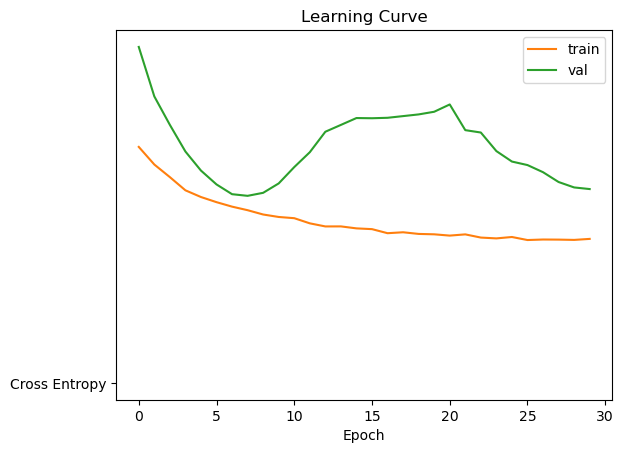

In [283]:
plt.title('Learning Curve')
plt.xlabel('Epoch')
plt.plot('Cross Entropy')
plt.plot(history_model_tuned.history['loss'],label='train')
plt.plot(history_model_tuned.history['val_loss'],label='val')
plt.legend()
plt.show()

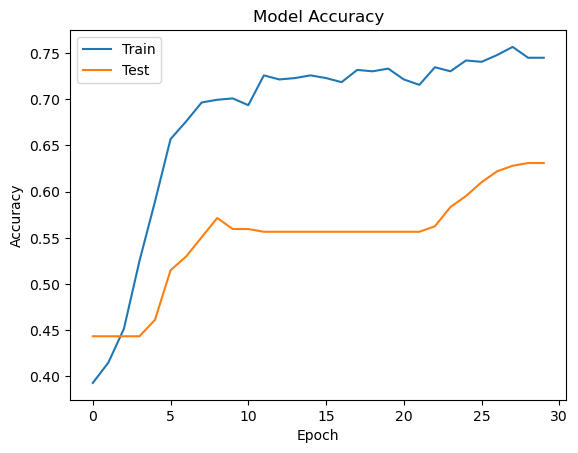

In [284]:
plt.figure()
plt.plot(history_model_tuned.history['accuracy'])
plt.plot(history_model_tuned.history['val_accuracy'])  
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train','Test'])
plt.show()

In [285]:
scores = model_tuned.evaluate(X_test, y_test)
print(f"Test Accuracy: {scores[1]*100}%")

11/11 [==============================] - 0s 2ms/step - loss: 0.6982 - accuracy: 0.6310
Test Accuracy: 63.09523582458496%


In [286]:
scores_train = model_tuned.evaluate(X_train, y_train)
print(f"Train Accuracy: {scores_train[1]*100}%")

22/22 [==============================] - 0s 1ms/step - loss: 0.6606 - accuracy: 0.6378
Train Accuracy: 63.78298997879028%
